Analysing the IROS Poster Data, for
object      : cylinder
object pose : 0,0,0
controller  : 1,2,3
with and without interaction

1. Analyse Control Data
2. Visualise Behaviour Data
3. Preprocess control & behaviour data
4. Analyse Data with MC_W, MC_MI, and MC_CW


In [1]:
using PyPlot
using DataFrames
using ProgressMeter

/Users/zahedi/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Functions & Variables

In [2]:
parent = "/Users/zahedi/projects/TU.Berlin/experiments/poster";
name(hand,suffix,controller) = "$parent/rbohand$hand$suffix/hand0_0-controller$controller-objectcylinder_0.0_0.0_0.0"
shortname(hand,suffix,controller) = "rbohand$hand$suffix/hand0_0-controller$controller-objectcylinder_0.0_0.0_0.0"

function get_xyz(filename)
    fd = open(filename)
    lines = readlines(fd)
    close(fd)
    lines = lines[2:2:end]
    s = split(strip(lines[1]), " ")
    v = collect(1:7:length(s)-1)
    v = [[i,i+1,i+2] for i in v]
    indices = v[1]
    for i = 2:length(v)
        indices = vcat(indices, v[i])
    end
    indices = indices .+ 1
    values = zeros(length(lines), length(indices))
    index = 1
    for l in lines
        s = split(strip(l), " ")
        values[index,:] = [parse(Float64,v) for v in s[indices]]
        index = index + 1
    end
    return values
end

function get_xyz(hand, suffix, controller)
    filename = "$(name(hand,suffix,controller))/raw/hand.sofastates.txt"
    return get_xyz(filename)
end

check_differences(a, b, column) = sqrt(sum((a[column] - b[column]).^2))

check_differences (generic function with 1 method)

In [3]:
function plotHand(data,line,xmin,xmax,ymin,ymax,zmin,zmax)
    f = figure()
    xlim([xmin,xmax])
    ylim([ymin,ymax])
    zlim([zmin,zmax])
    plot3D(
    [data[line,1+3],data[line,1+2*3]],
    [data[line,2+3],data[line,2+2*3]],
    [data[line,3+3],data[line,3+2*3]]
    )

    for i in collect(1:5)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 6 is fingertip 1
    
    xlim([xmin,xmax])
    ylim([ymin,ymax])
    zlim([zmin,zmax])
    plot3D(
    [data[line,1+3],data[line,1+7*3]],
    [data[line,2+3],data[line,2+7*3]],
    [data[line,3+3],data[line,3+7*3]]
    )

    for i in collect(7:10)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 11 is fingertip 2

    plot3D(
    [data[line,1+3],data[line,1+12*3]],
    [data[line,2+3],data[line,2+12*3]],
    [data[line,3+3],data[line,3+12*3]]
    )

    for i in collect(12:15)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 16 is fingertip 3

    plot3D(
    [data[line,1+3],data[line,1+17*3]],
    [data[line,2+3],data[line,2+17*3]],
    [data[line,3+3],data[line,3+17*3]]
    )

    for i in collect(17:20)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 21 is fingertip 4

    plot3D(
    [data[line,1+3],data[line,1+22*3]],
    [data[line,2+3],data[line,2+22*3]],
    [data[line,3+3],data[line,3+22*3]]
    )

    for i in collect(22:30)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    
    
    savefig("/tmp/plot_$line.png")
#    close(f)
end

function plotHandRotated(data,line,xmin,xmax,ymin,ymax,zmin,zmax, e, a)
    f = figure()
    ax = Axes3D(f)
    ax[:view_init](elev=e, azim=a)
    
    xlim([xmin,xmax])
    ylim([ymin,ymax])
    zlim([zmin,zmax])
    plot3D(
    [data[line,1+3],data[line,1+2*3]],
    [data[line,2+3],data[line,2+2*3]],
    [data[line,3+3],data[line,3+2*3]]
    )

    for i in collect(1:5)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 6 is fingertip 1
    
    xlim([xmin,xmax])
    ylim([ymin,ymax])
    zlim([zmin,zmax])
    plot3D(
    [data[line,1+3],data[line,1+7*3]],
    [data[line,2+3],data[line,2+7*3]],
    [data[line,3+3],data[line,3+7*3]]
    )

    for i in collect(7:10)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 11 is fingertip 2

    plot3D(
    [data[line,1+3],data[line,1+12*3]],
    [data[line,2+3],data[line,2+12*3]],
    [data[line,3+3],data[line,3+12*3]]
    )

    for i in collect(12:15)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 16 is fingertip 3

    plot3D(
    [data[line,1+3],data[line,1+17*3]],
    [data[line,2+3],data[line,2+17*3]],
    [data[line,3+3],data[line,3+17*3]]
    )

    for i in collect(17:20)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    # -> 21 is fingertip 4

    plot3D(
    [data[line,1+3],data[line,1+22*3]],
    [data[line,2+3],data[line,2+22*3]],
    [data[line,3+3],data[line,3+22*3]]
    )

    for i in collect(22:30)
        plot3D(
        [data[line,1+i*3],data[line,1+(i+1)*3]],
        [data[line,2+i*3],data[line,2+(i+1)*3]],
        [data[line,3+i*3],data[line,3+(i+1)*3]])
    end
    
    
    savefig("/tmp/plot_$line.png")
#    close(f)
end

# data = get_xyz(2,"-prescriptive",0)
# xmin = minimum([minimum(data[:,i]) for i in collect(1:3:size(data)[2])])
# xmax = maximum([maximum(data[:,i]) for i in collect(1:3:size(data)[2])])

# ymin = minimum([minimum(data[:,i]) for i in collect(2:3:size(data)[2])])
# ymax = maximum([maximum(data[:,i]) for i in collect(2:3:size(data)[2])])

# zmin = minimum([minimum(data[:,i]) for i in collect(3:3:size(data)[2])])
# zmax = maximum([maximum(data[:,i]) for i in collect(3:3:size(data)[2])])

#plotHandRotated(data,10,xmin,xmax,ymin,ymax,zmin,zmax, 0, 0)
#plotHandRotated(data,10,xmin,xmax,ymin,ymax,zmin,zmax, -40, 90)

plotHandRotated (generic function with 1 method)

/Users/zahedi/Library/Python/2.7/lib/python/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
ffmpeg version 3.1.4 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 8.0.0 (clang-800.0.38)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.1.4 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libxvid --disable-lzma --enable-vda
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.101 / 57.  0.101
  libavfilter    

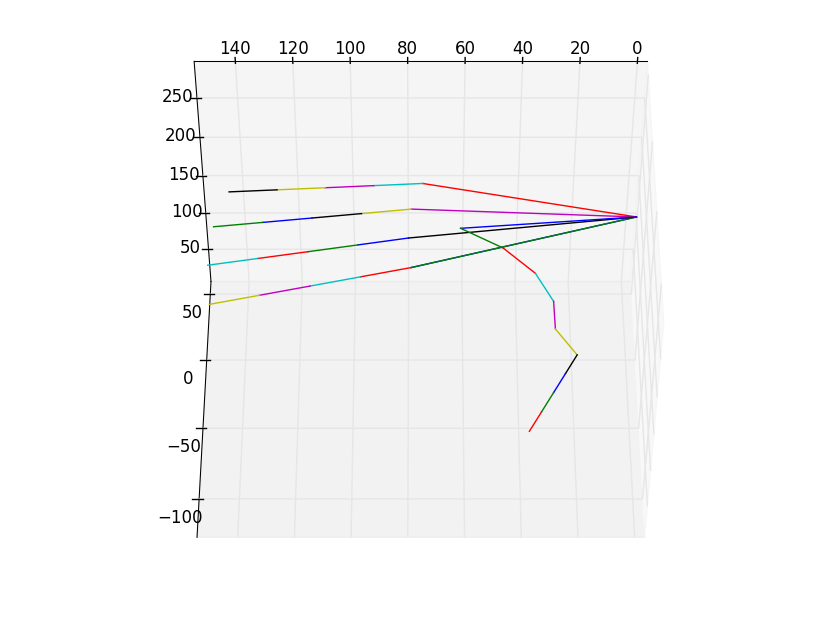

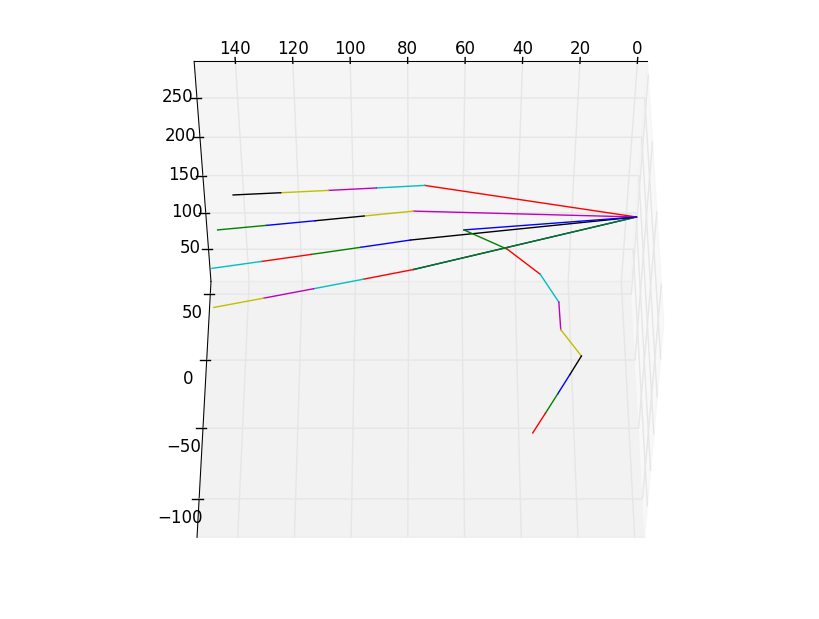

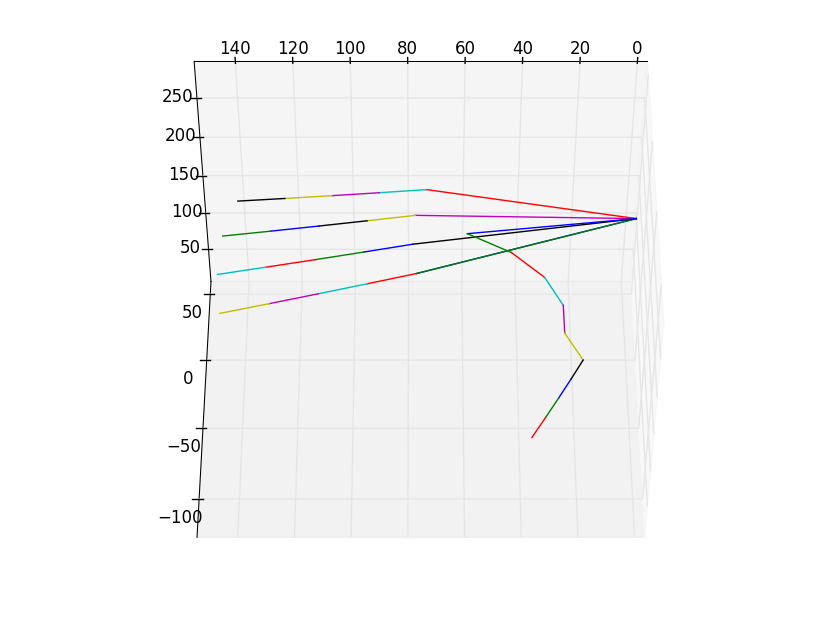

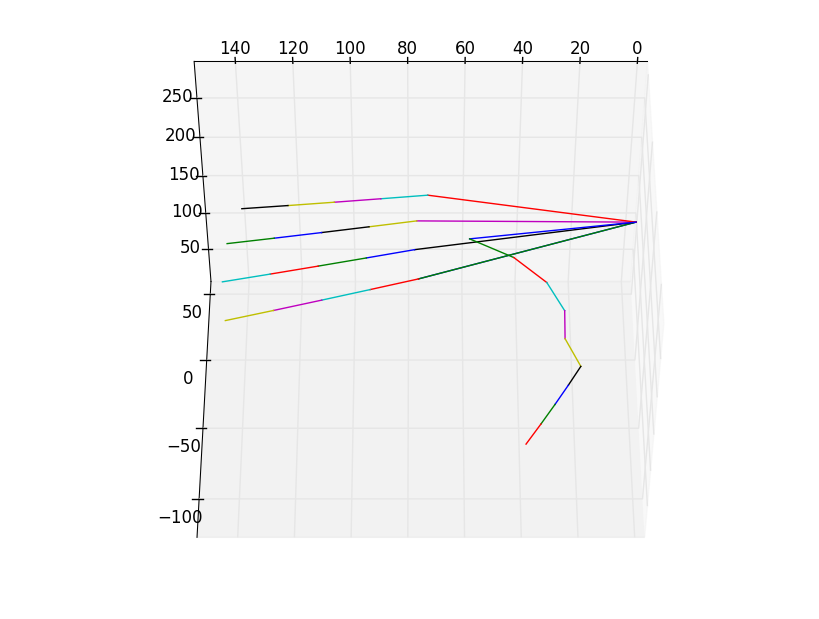

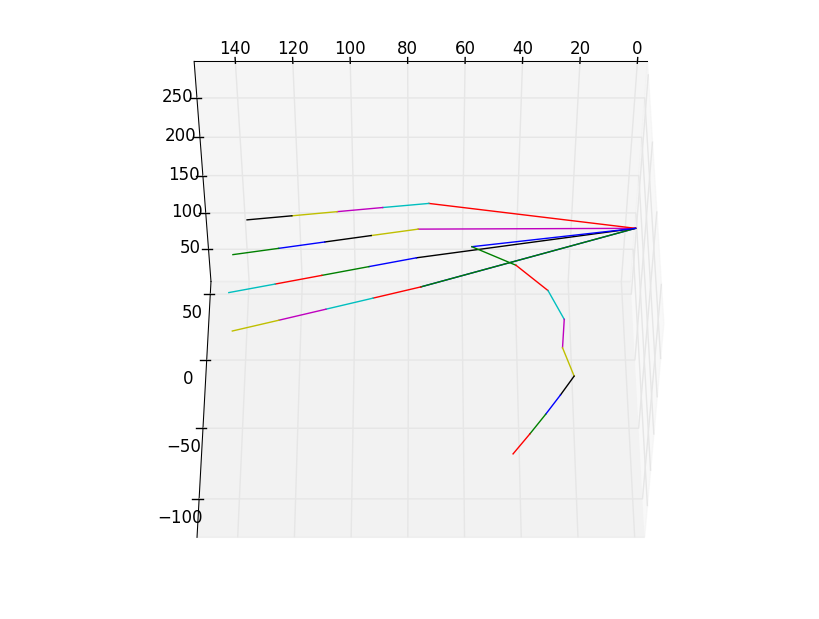

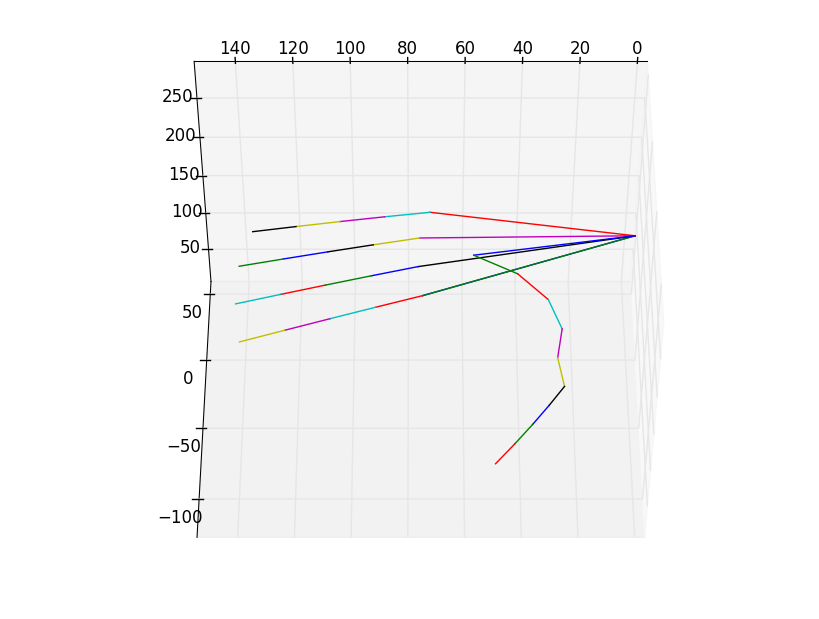

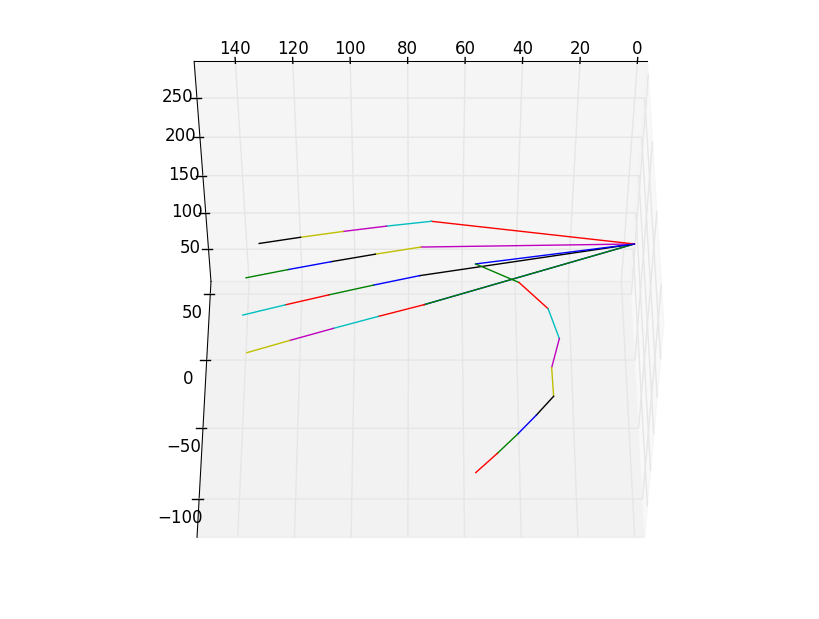

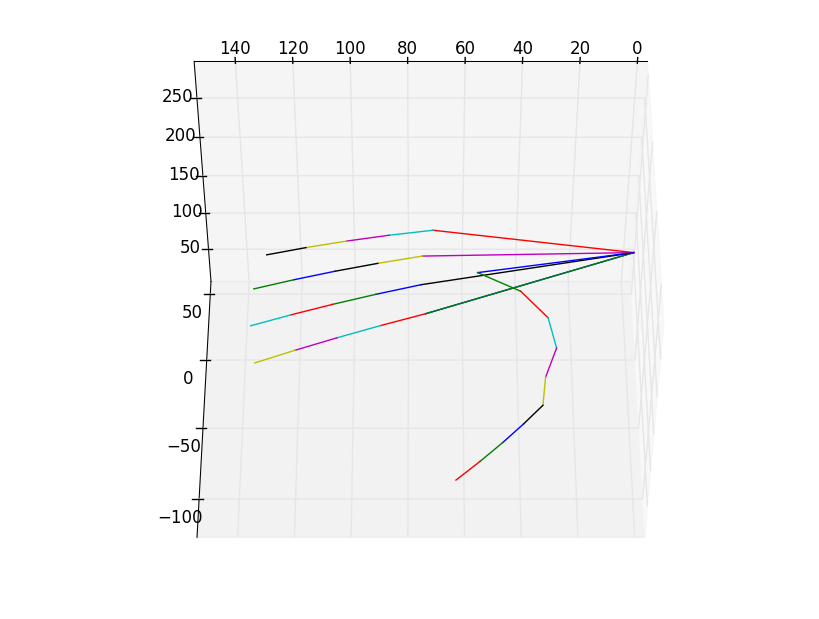

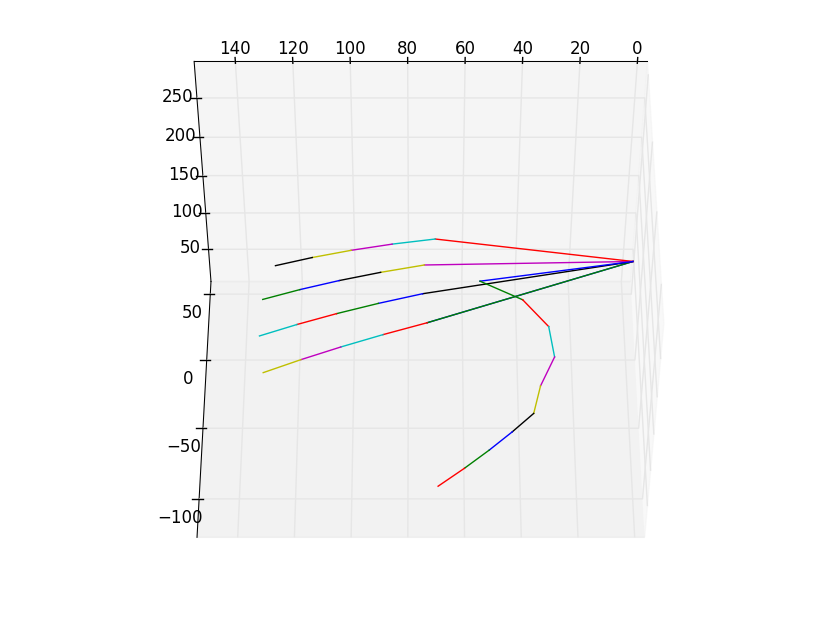

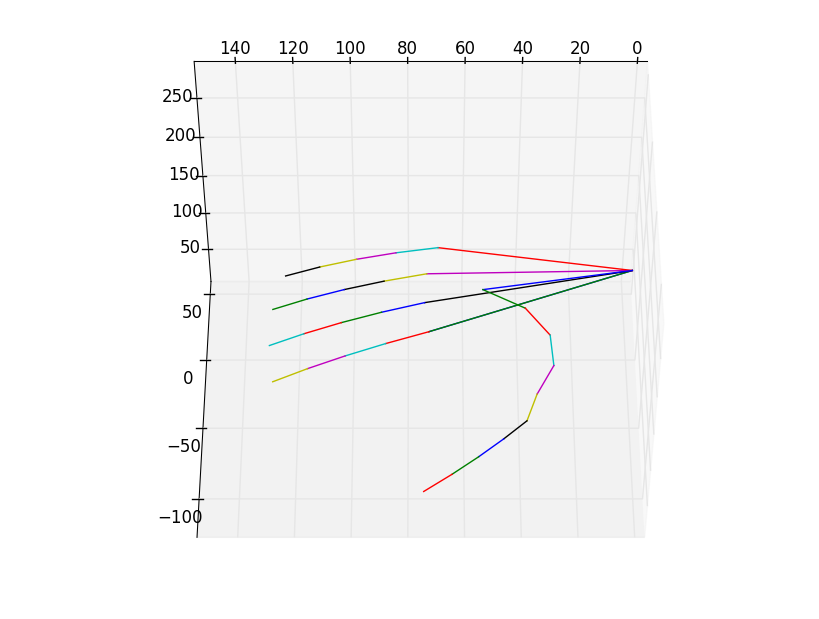

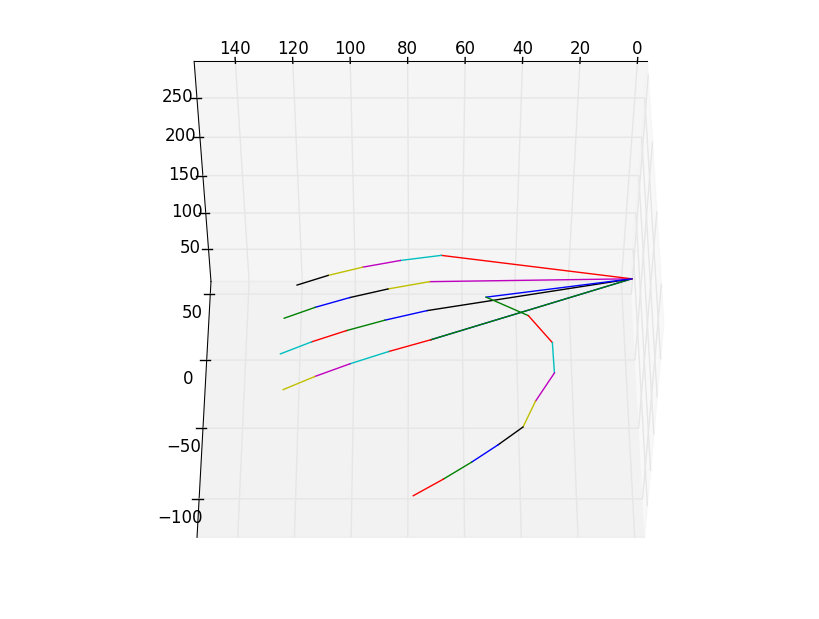

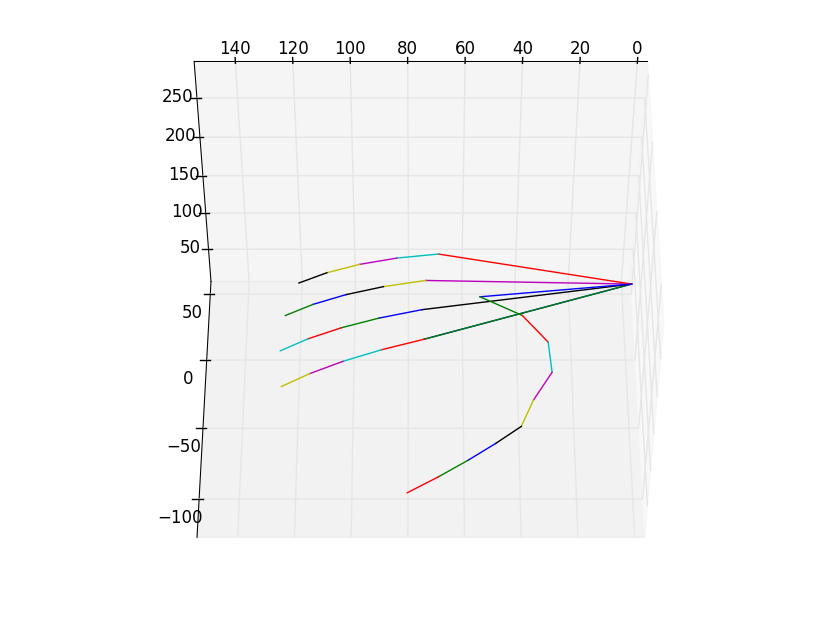

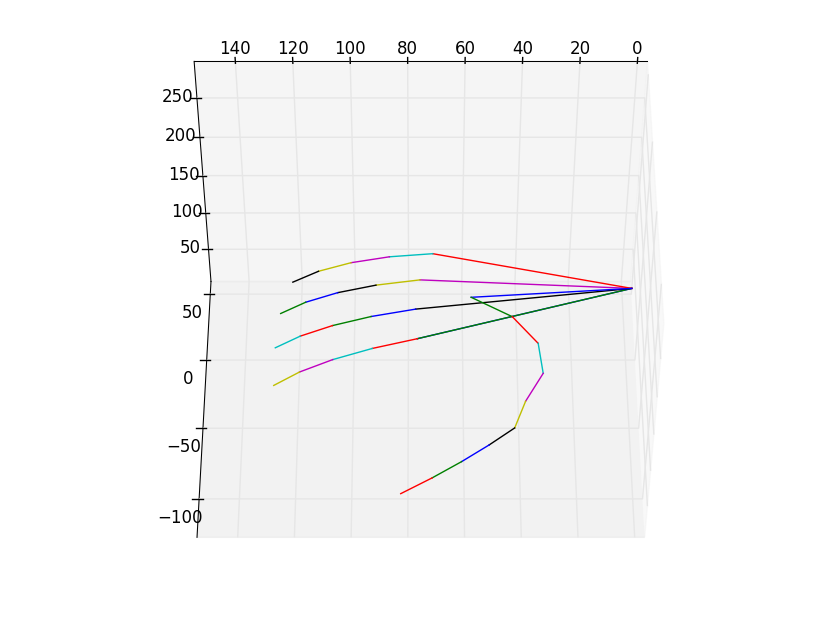

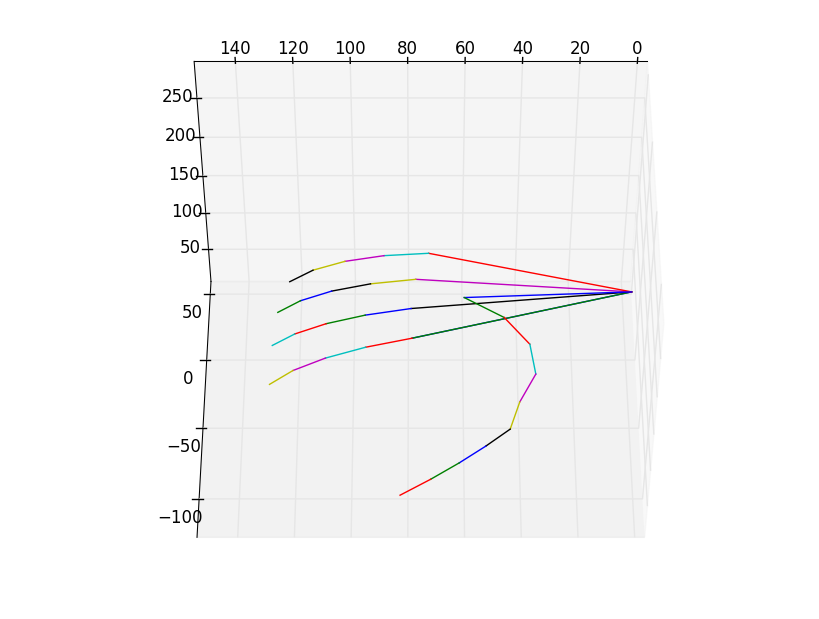

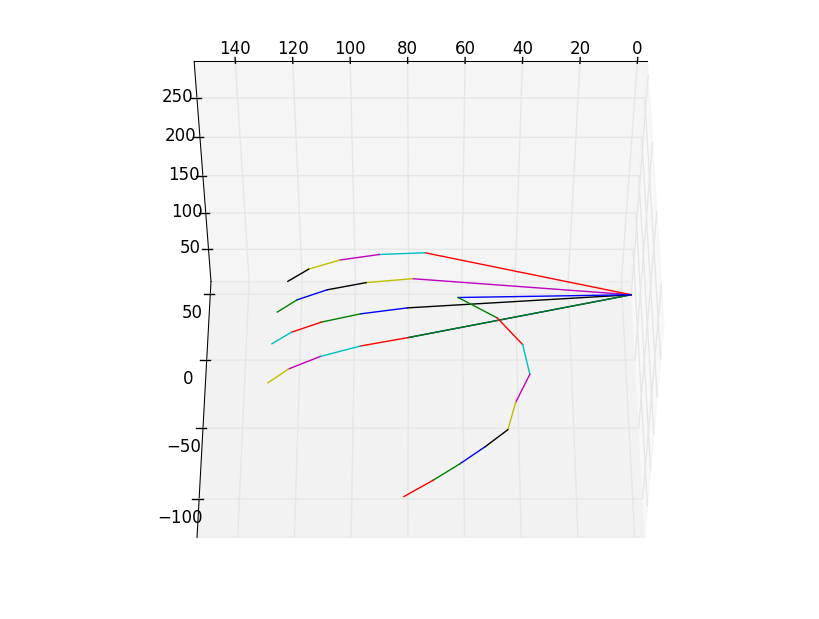

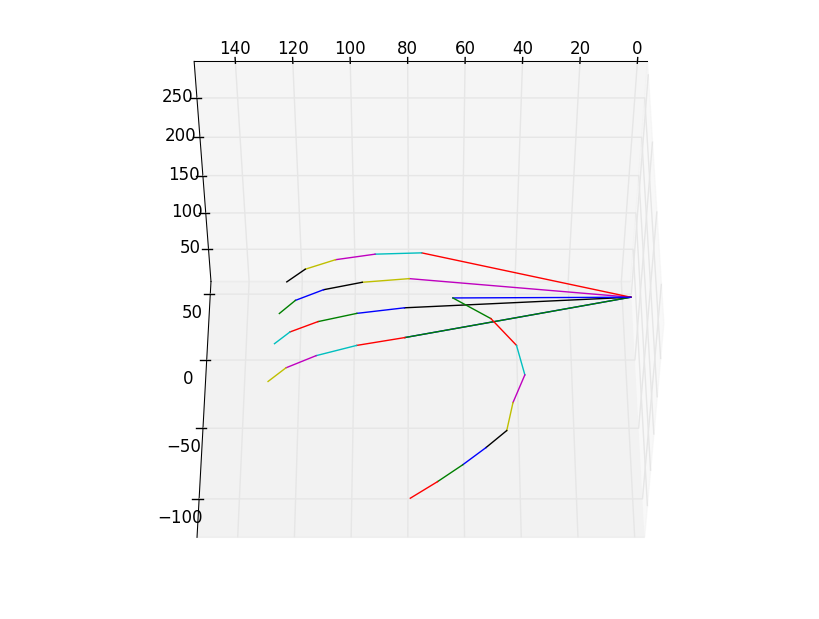

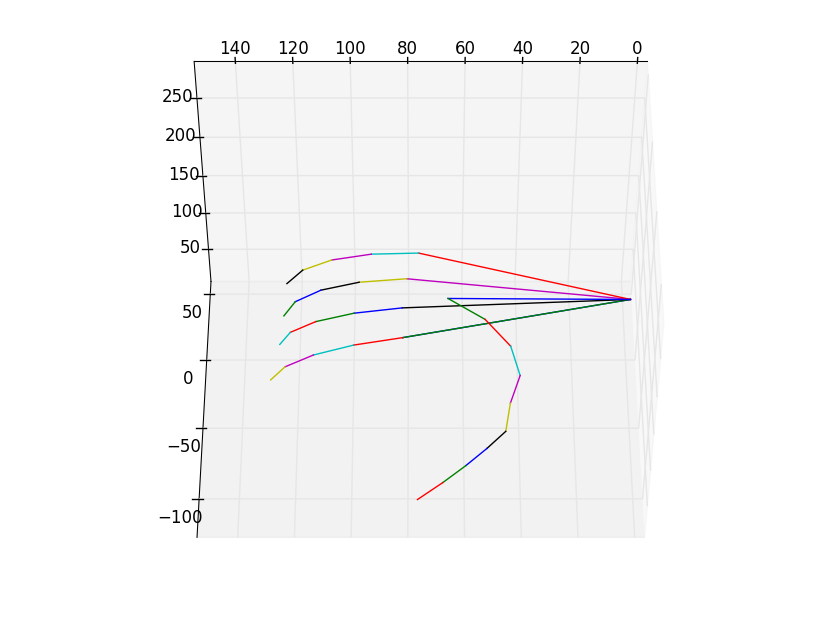

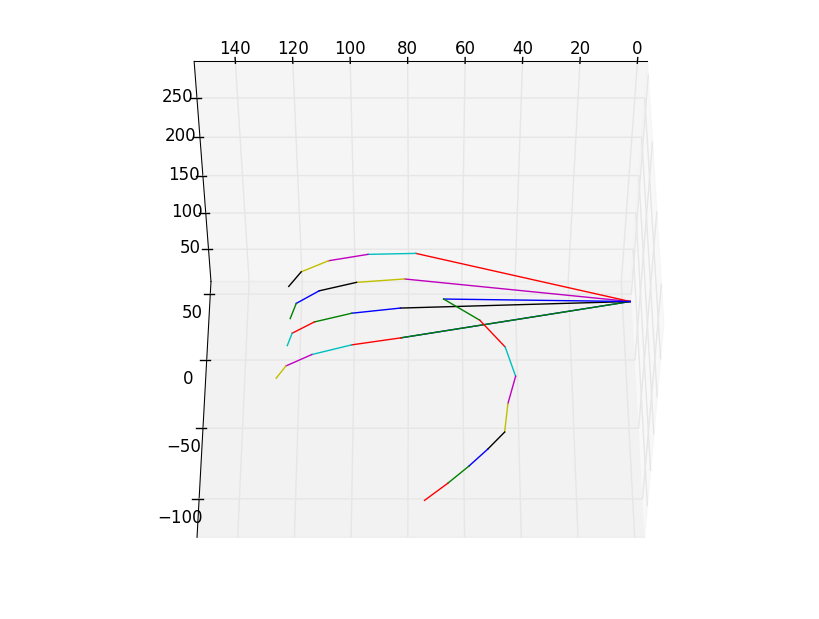

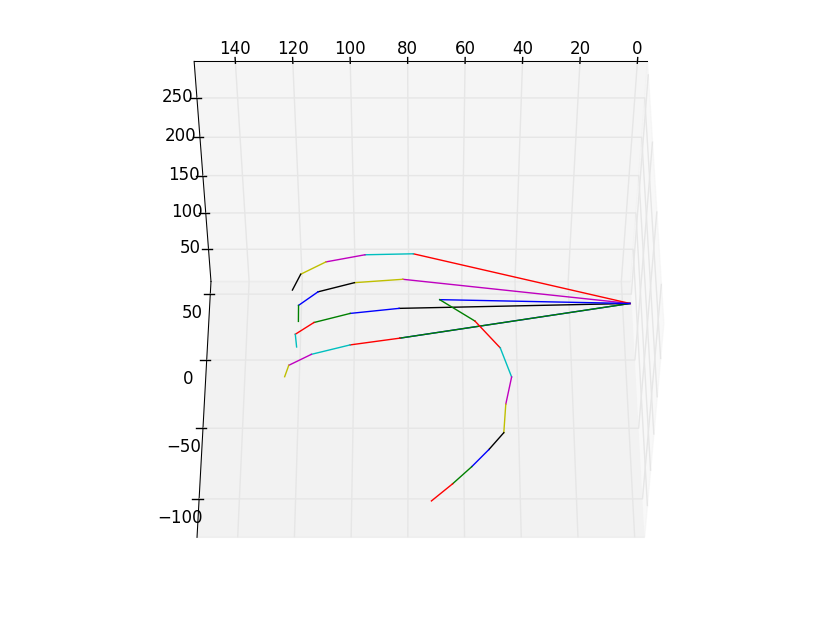

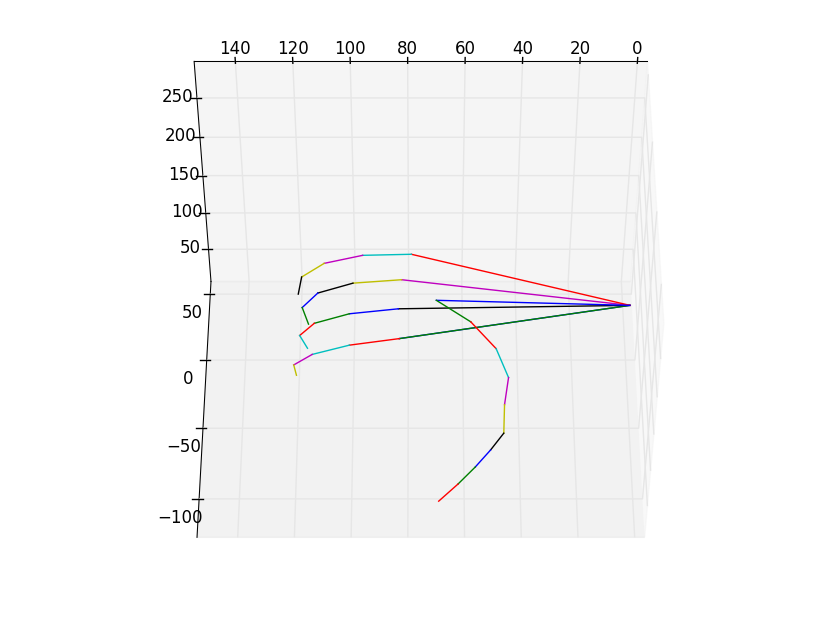

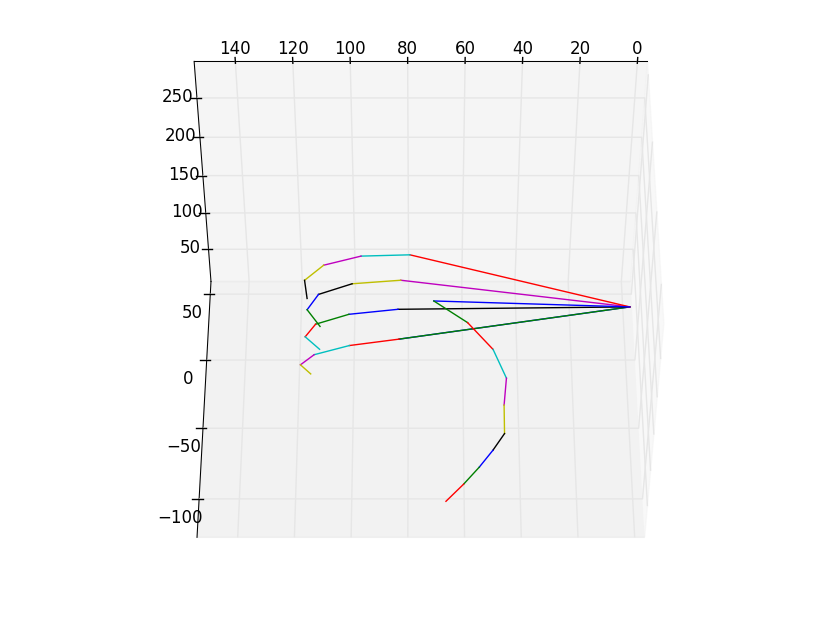

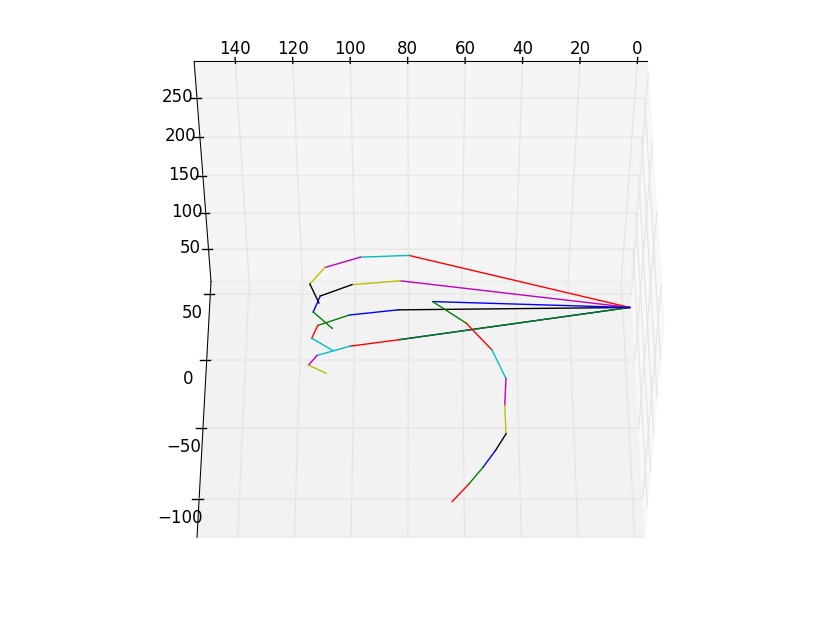

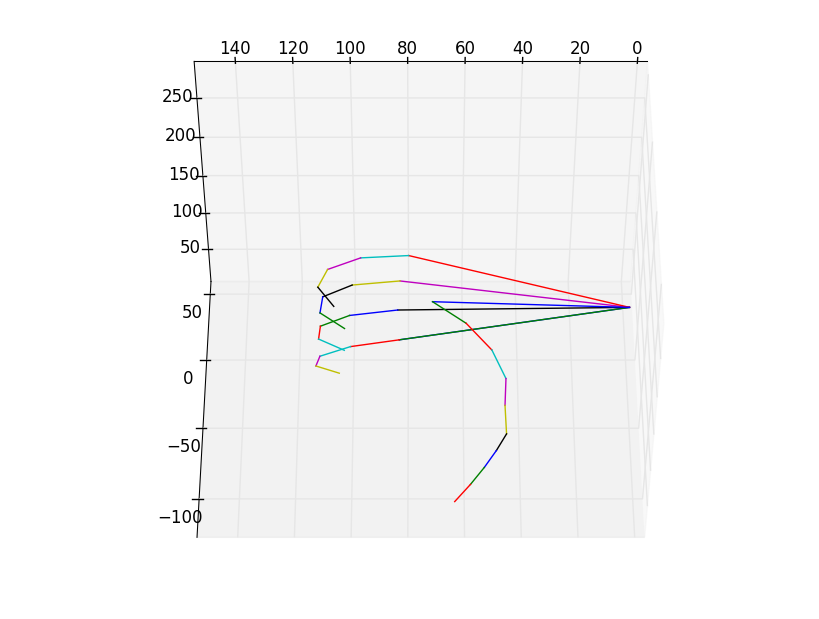

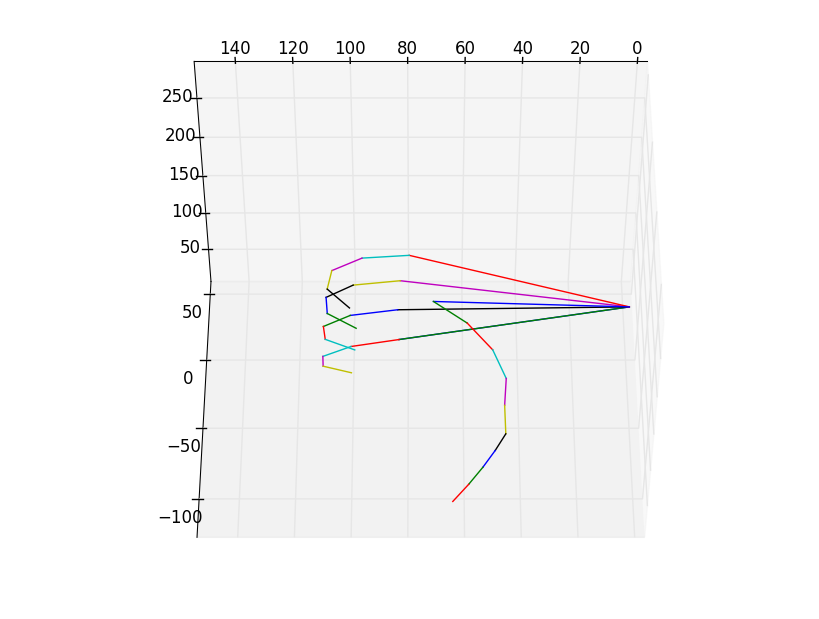

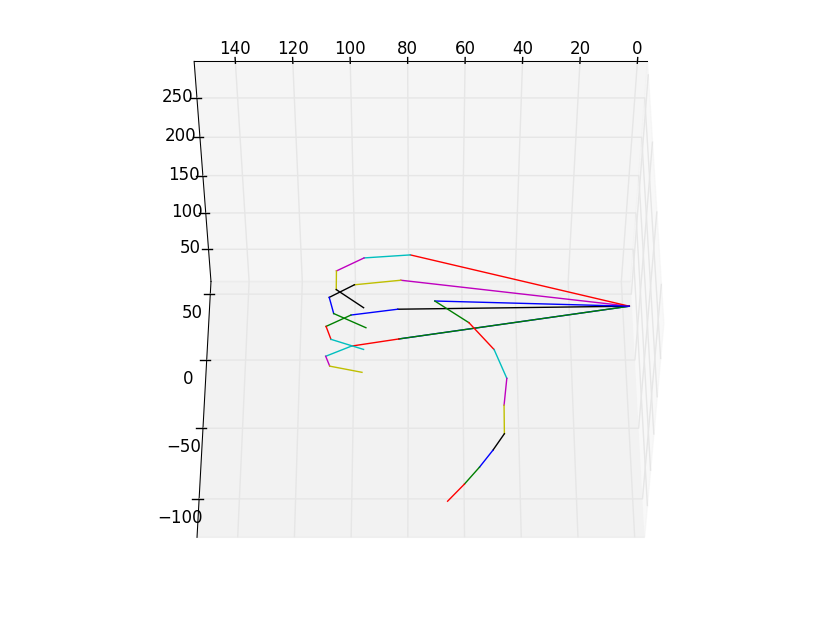

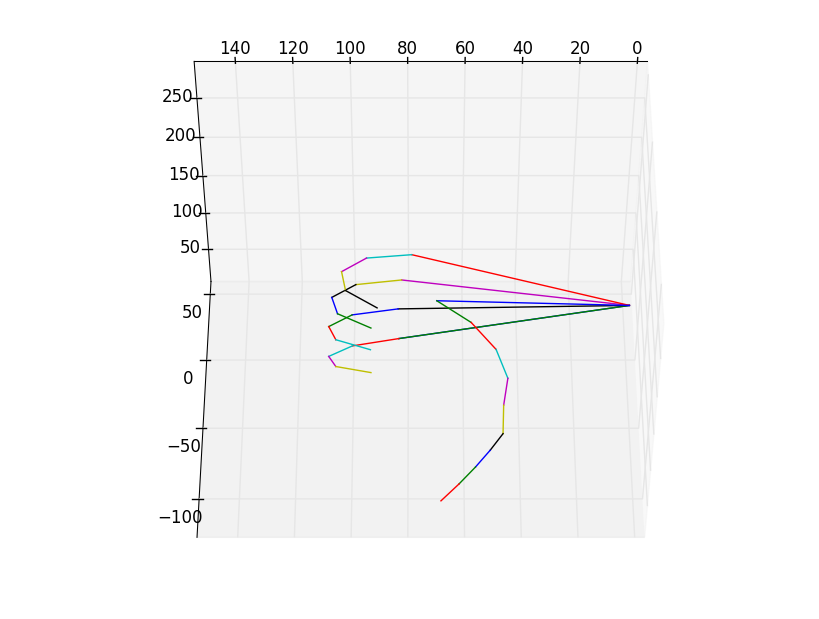

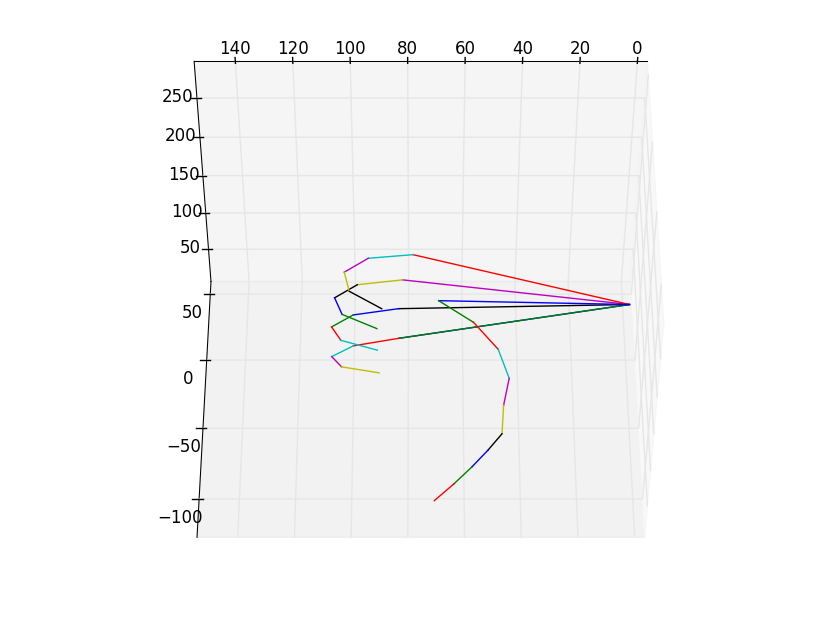

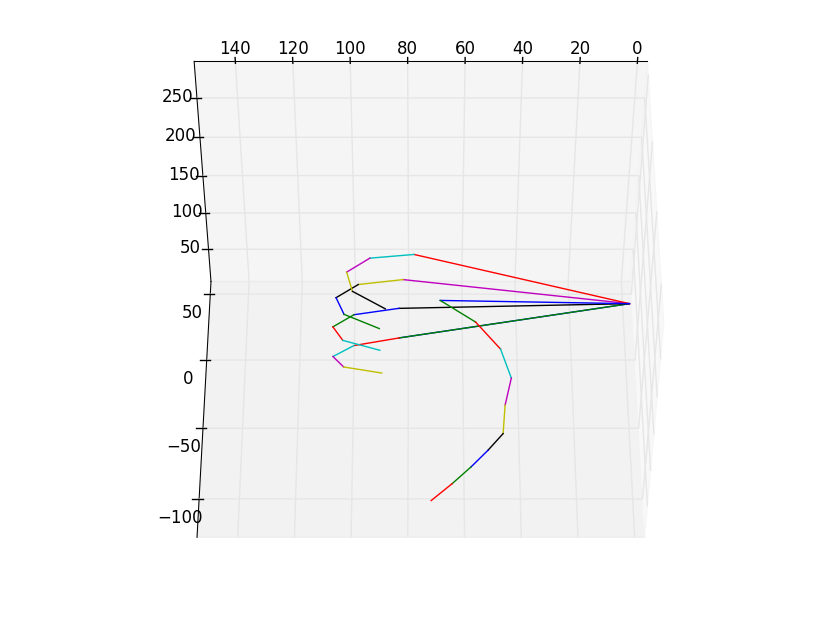

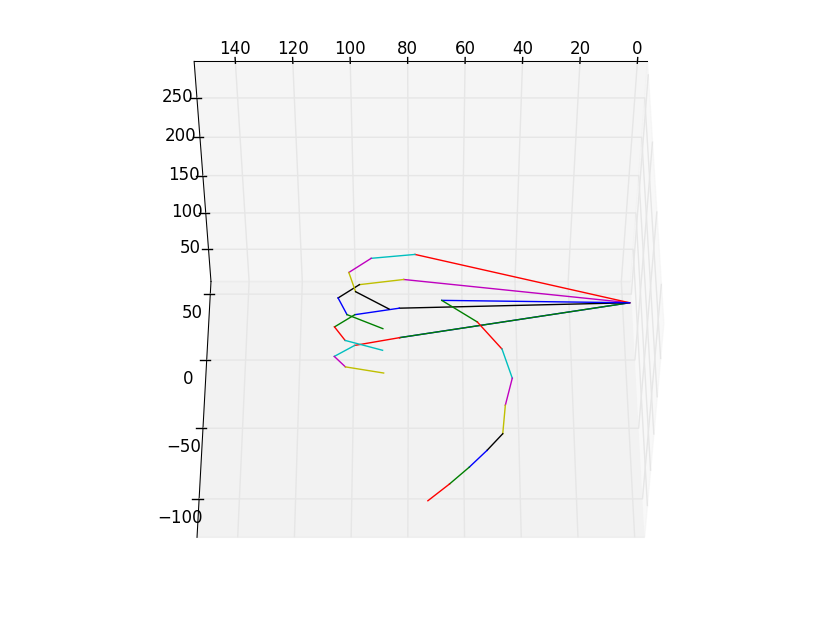

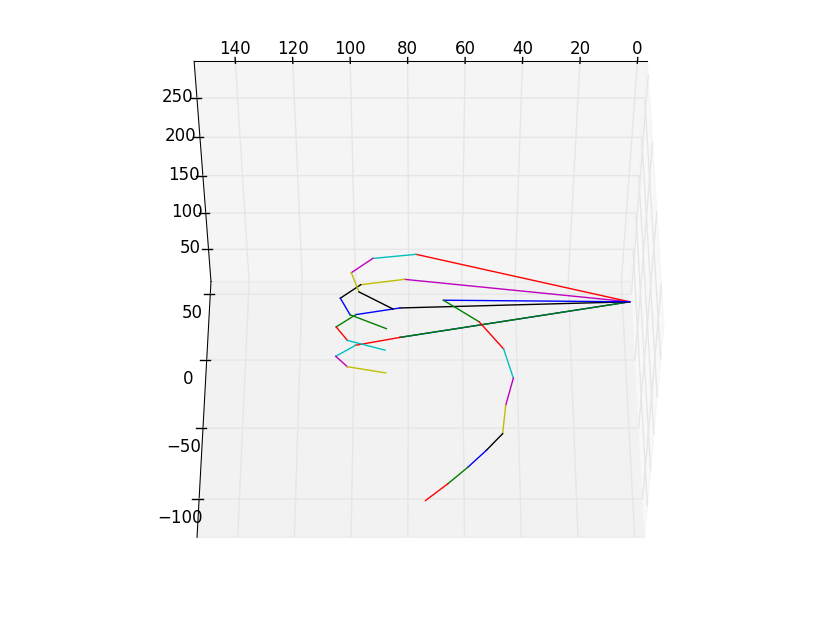

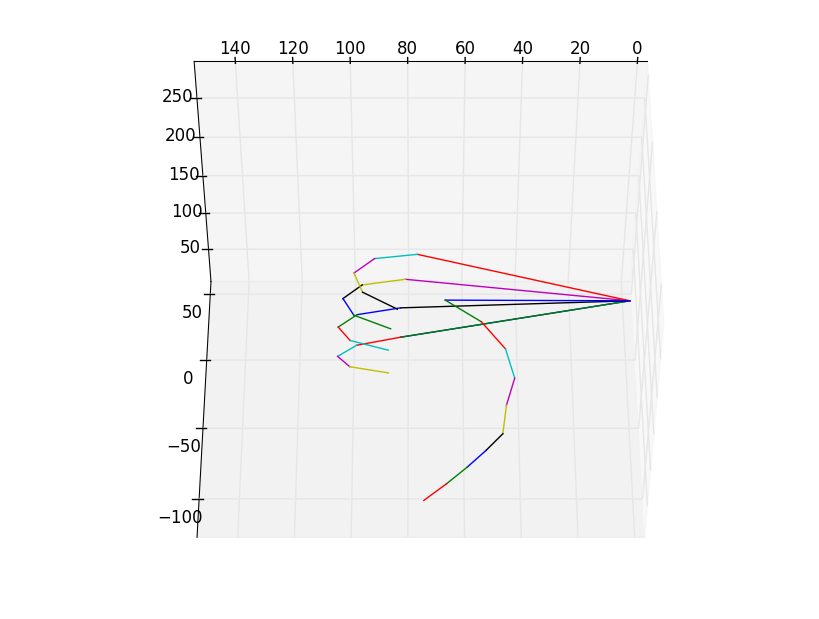

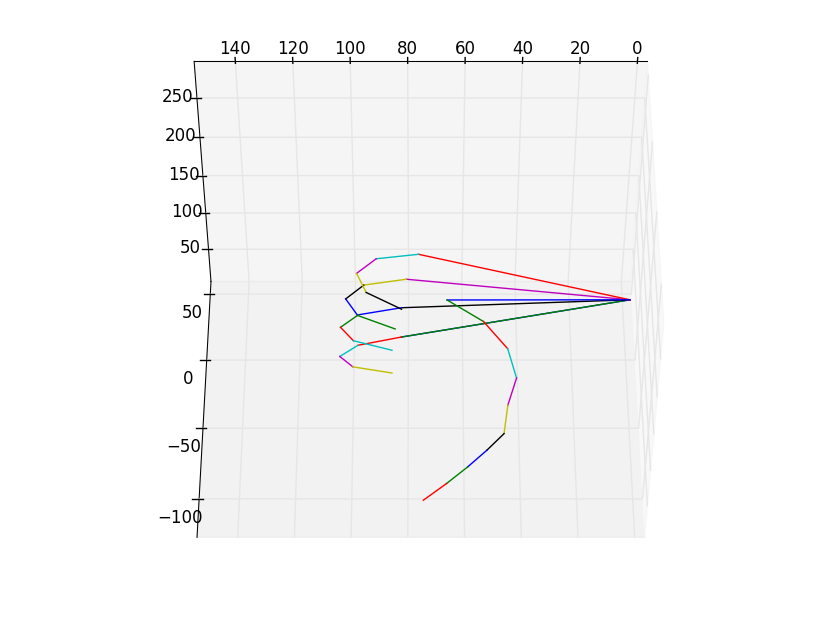

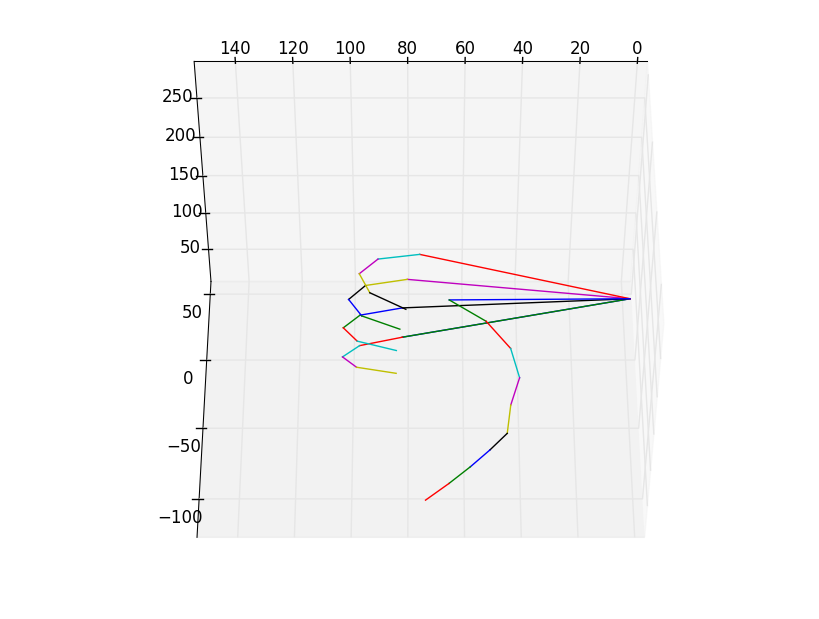

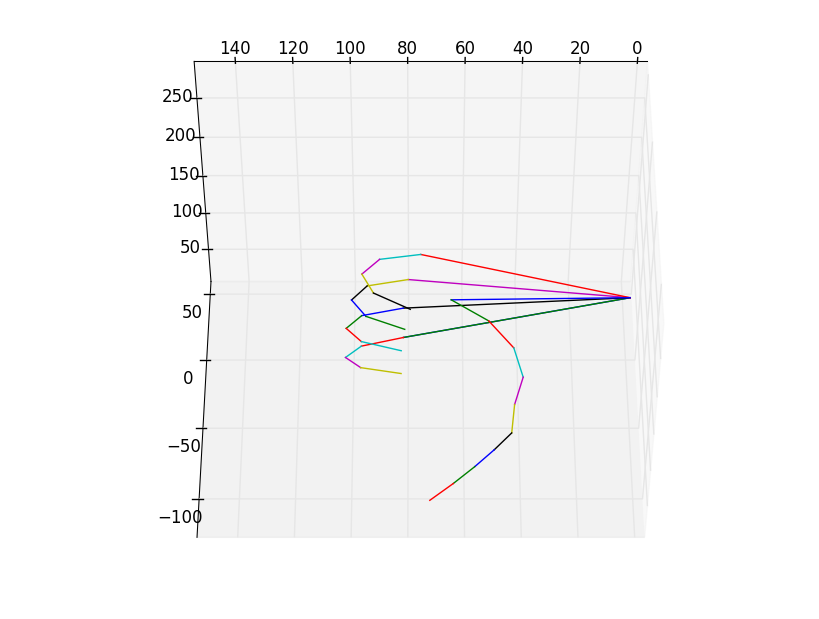

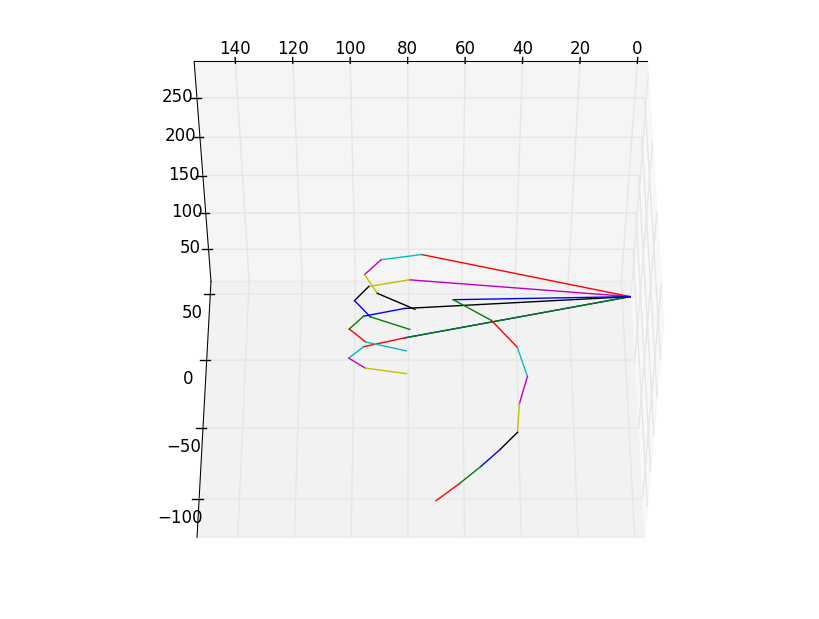

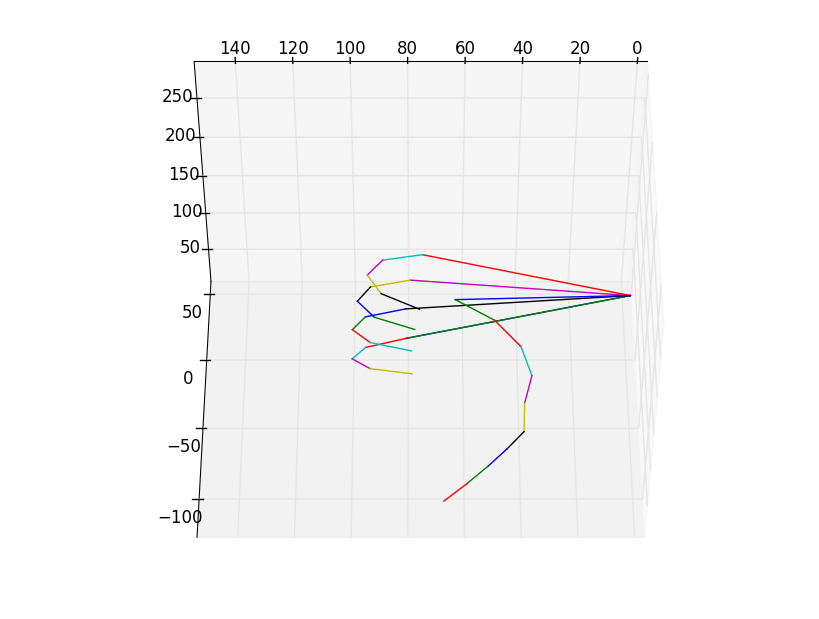

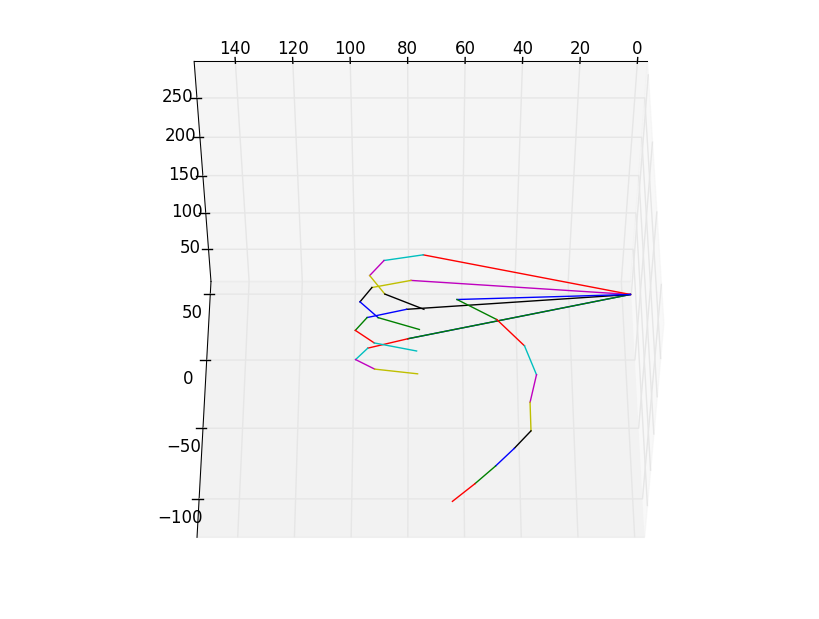

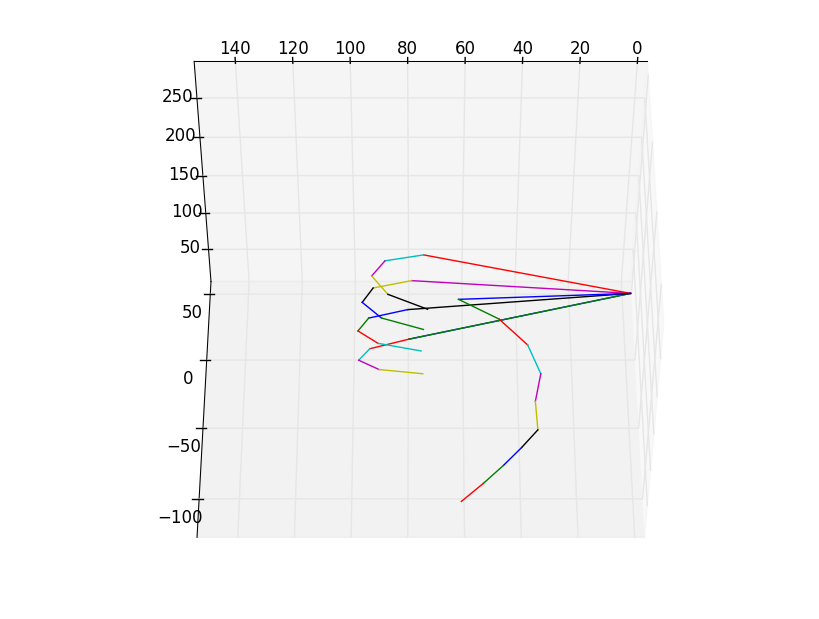

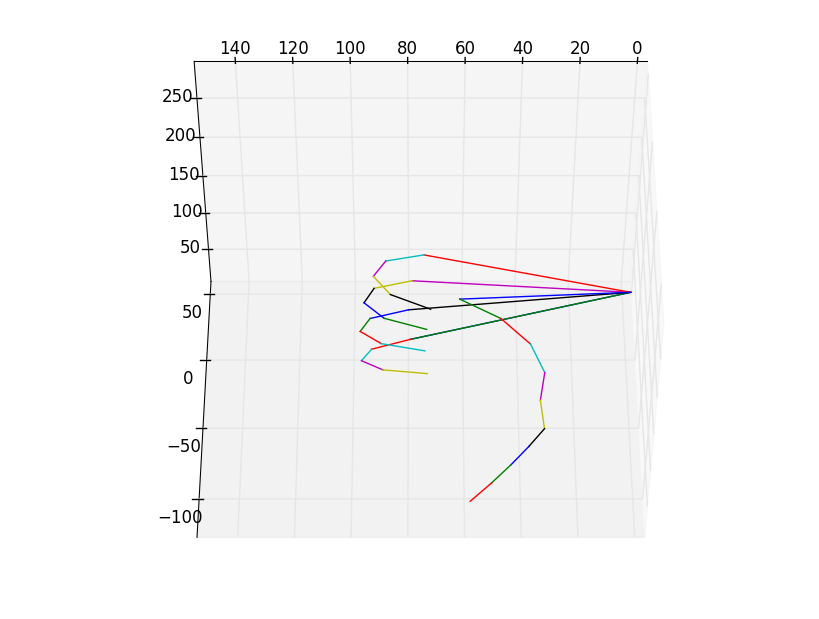

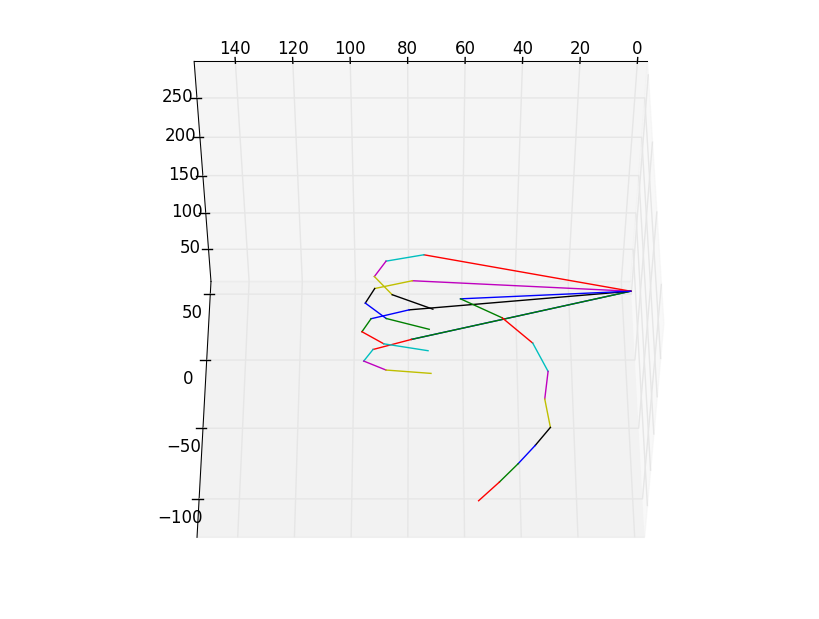

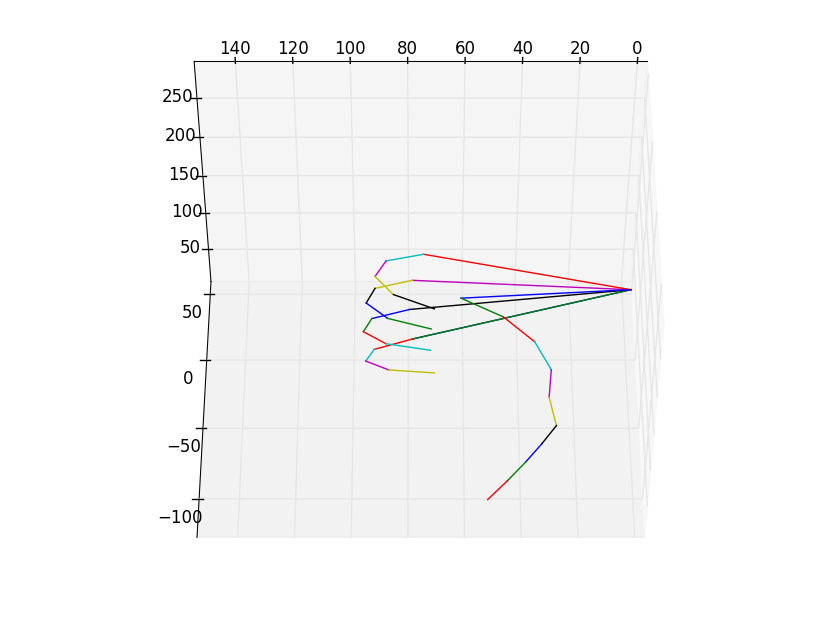

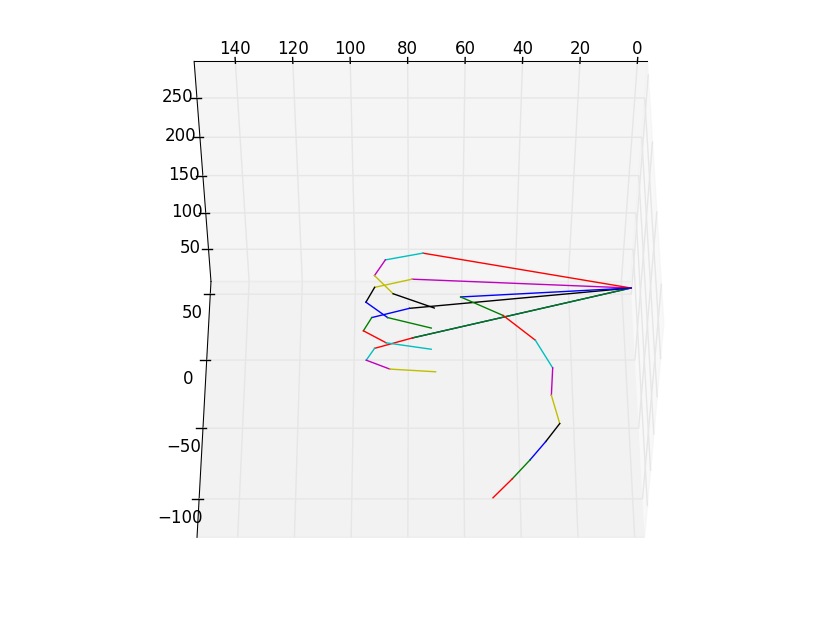

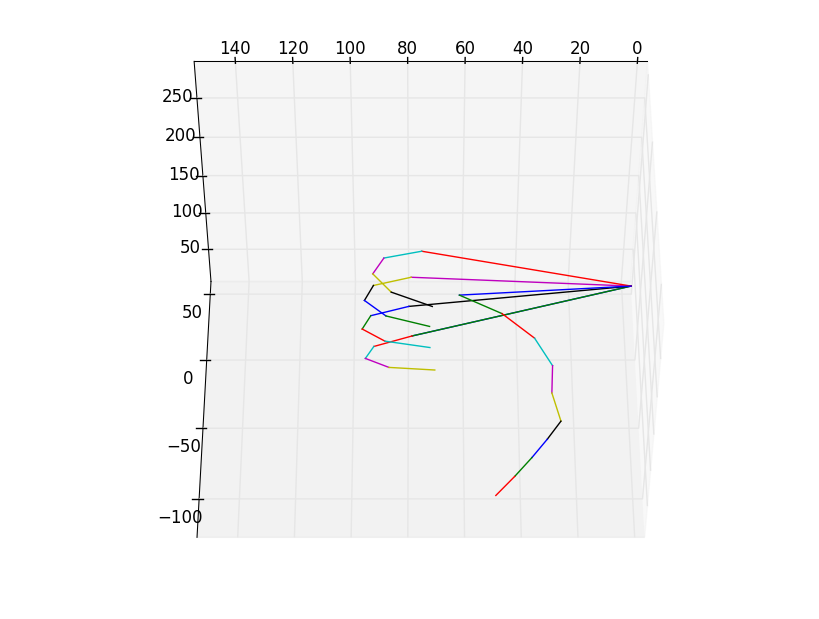

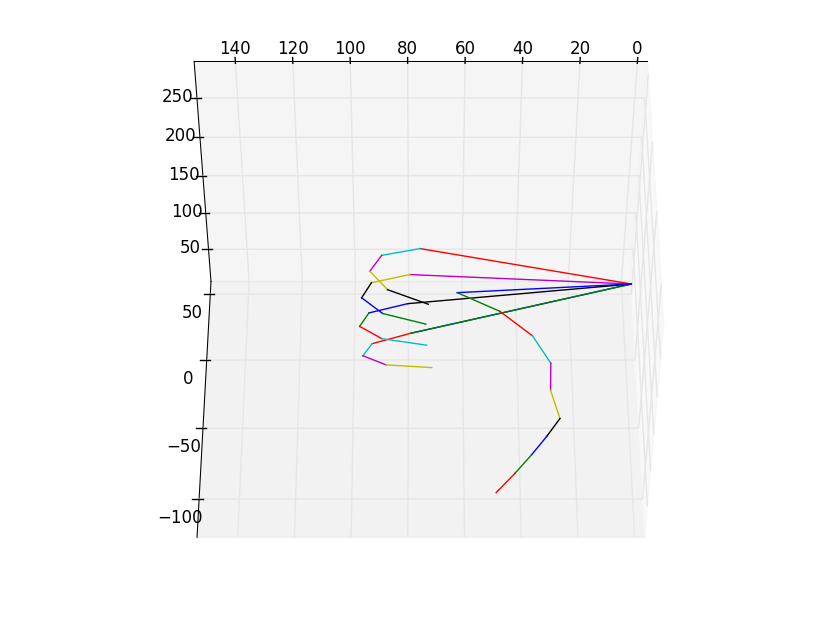

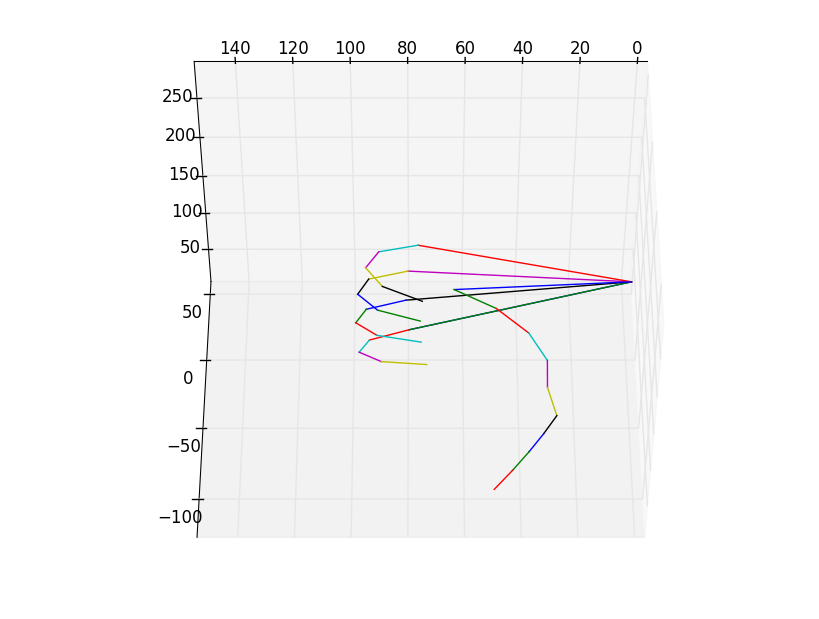

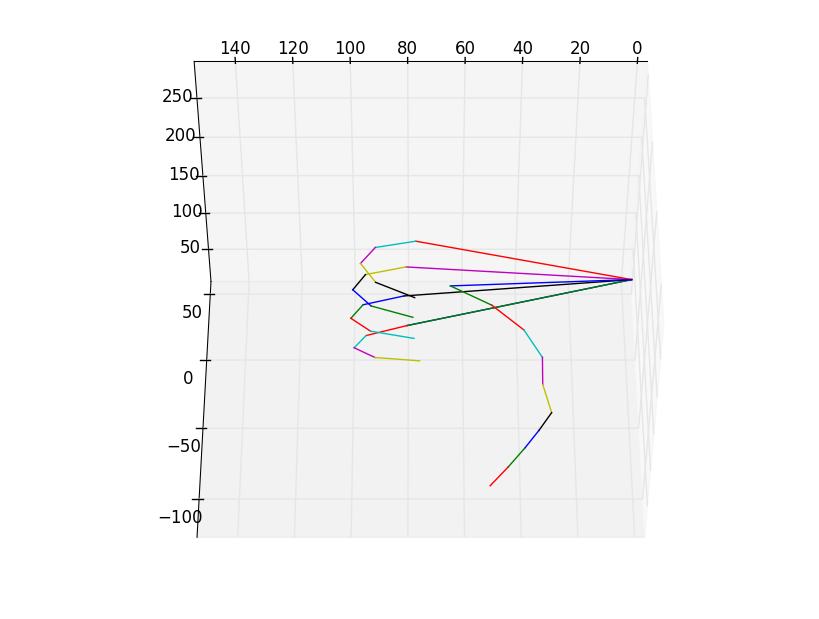

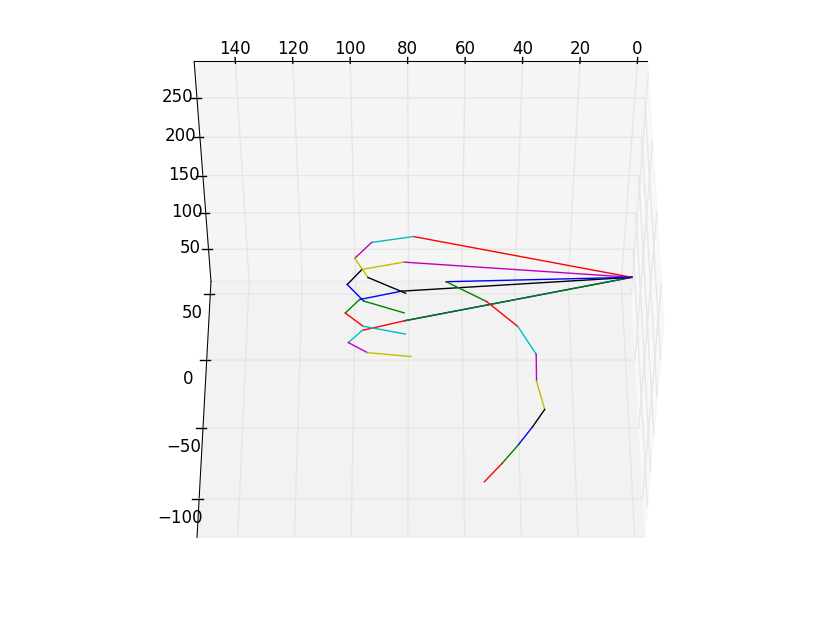

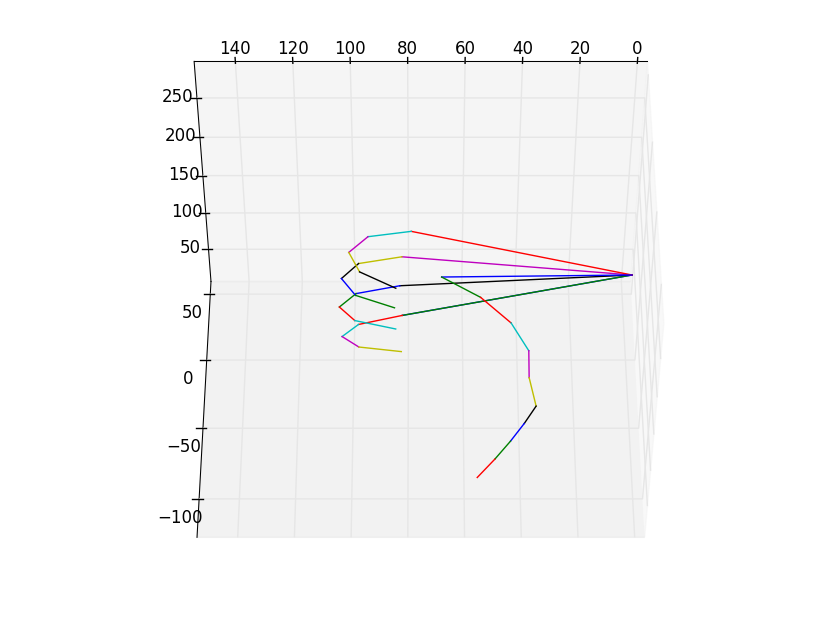

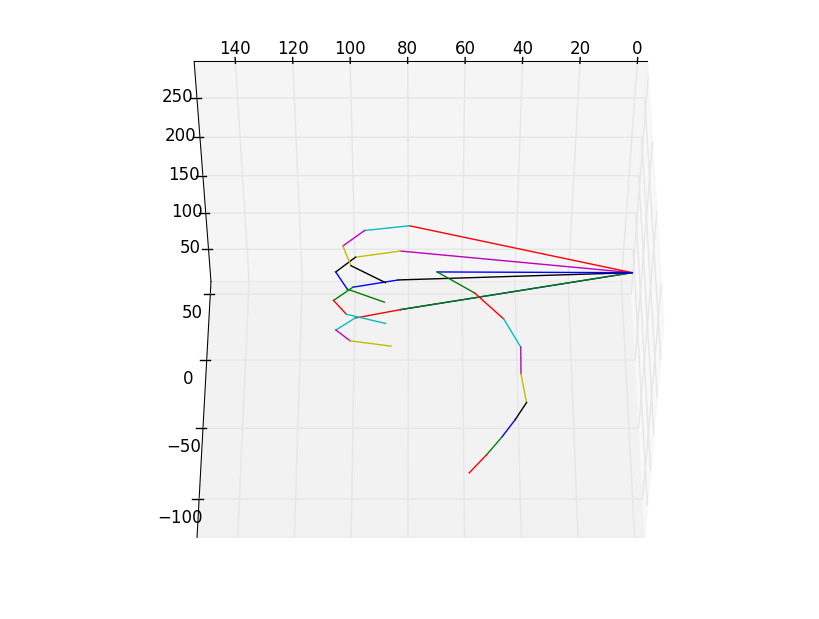

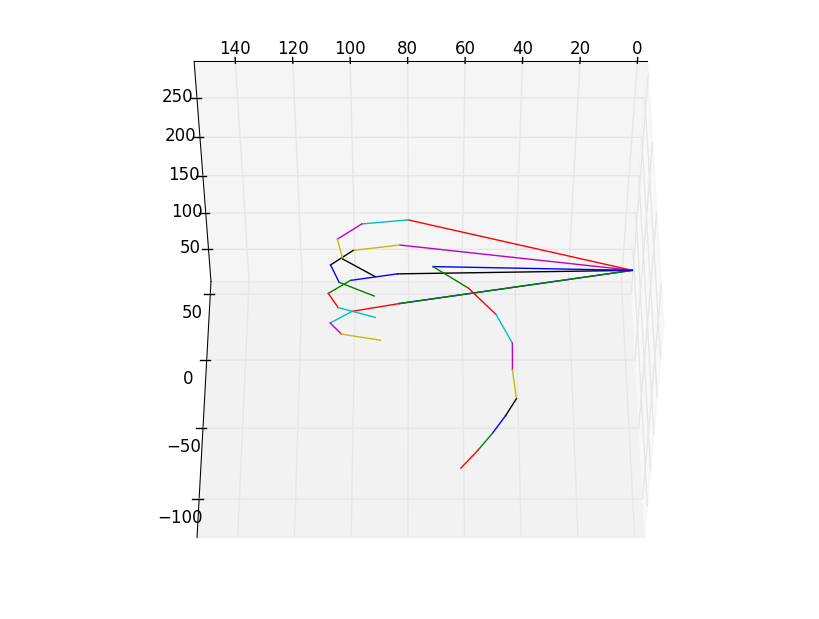

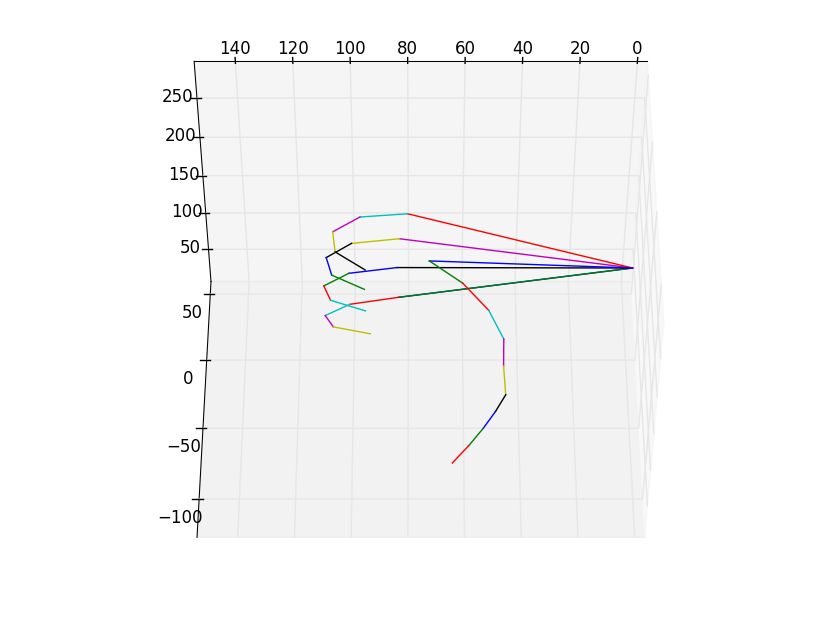

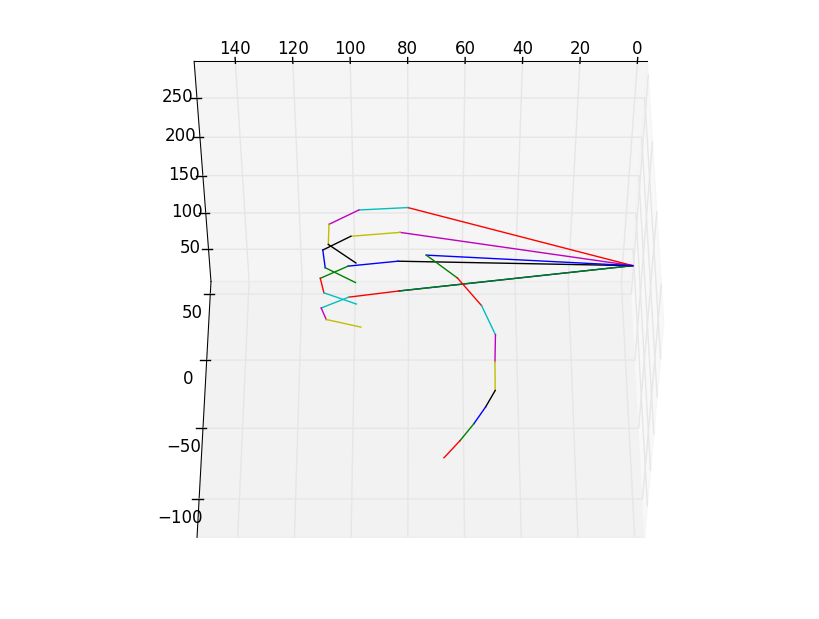

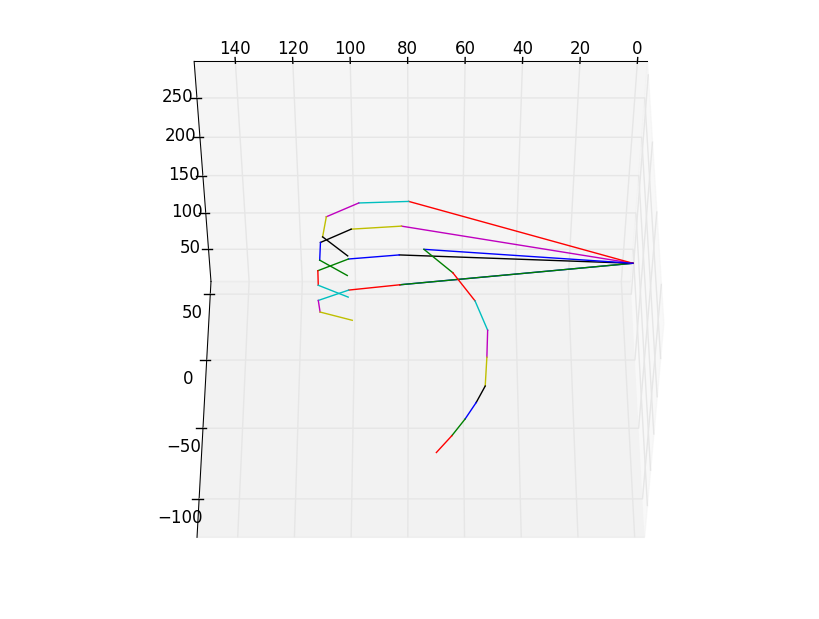

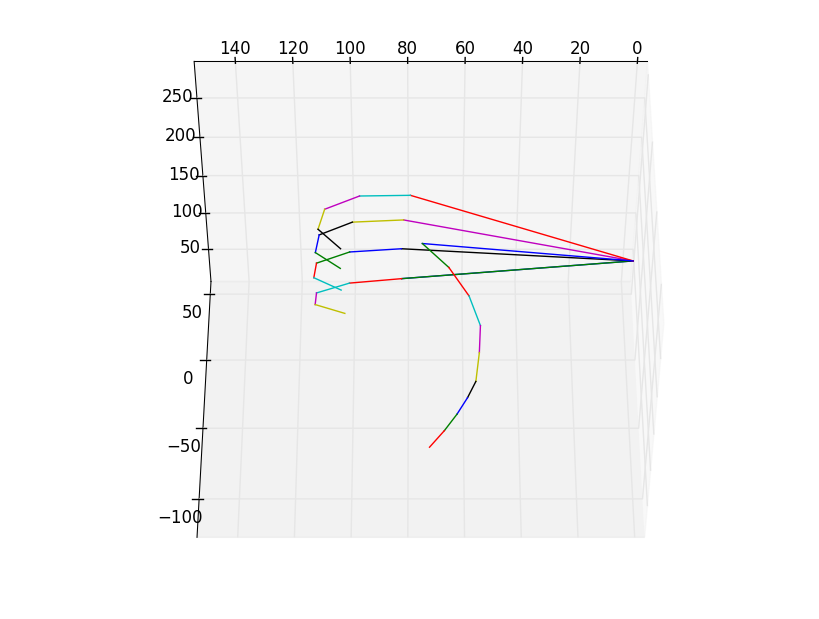

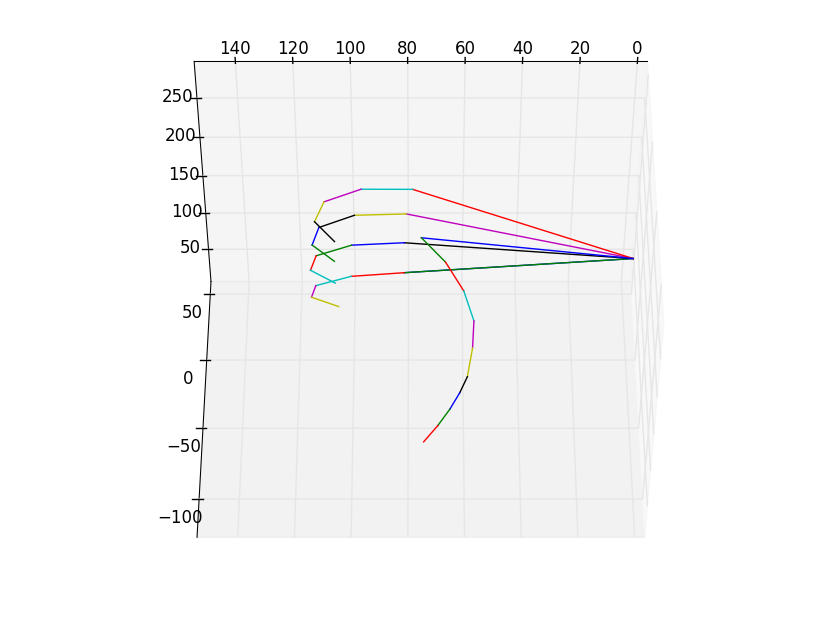

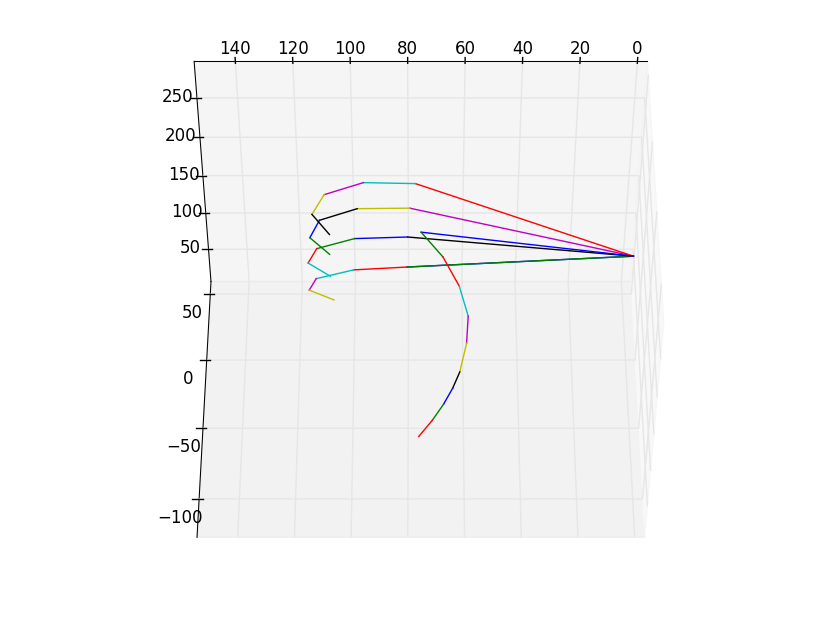

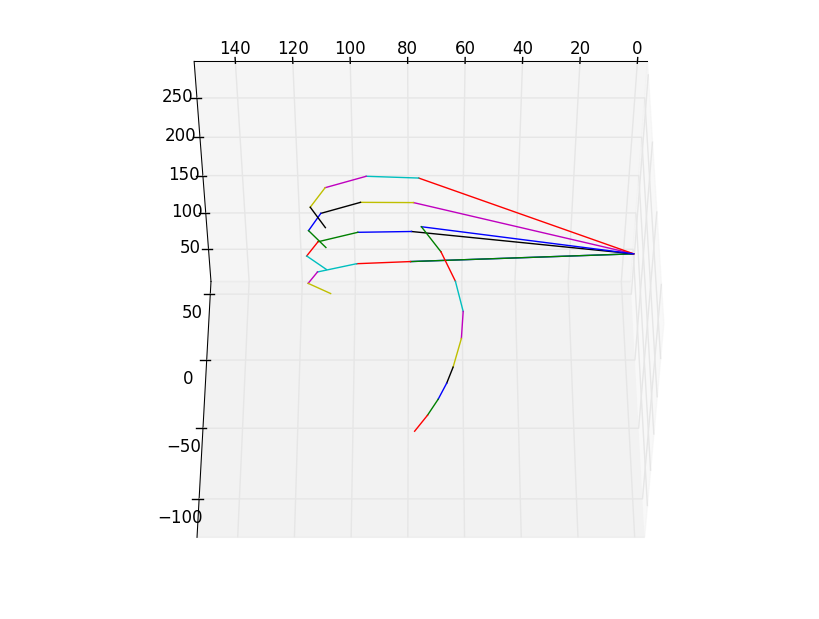

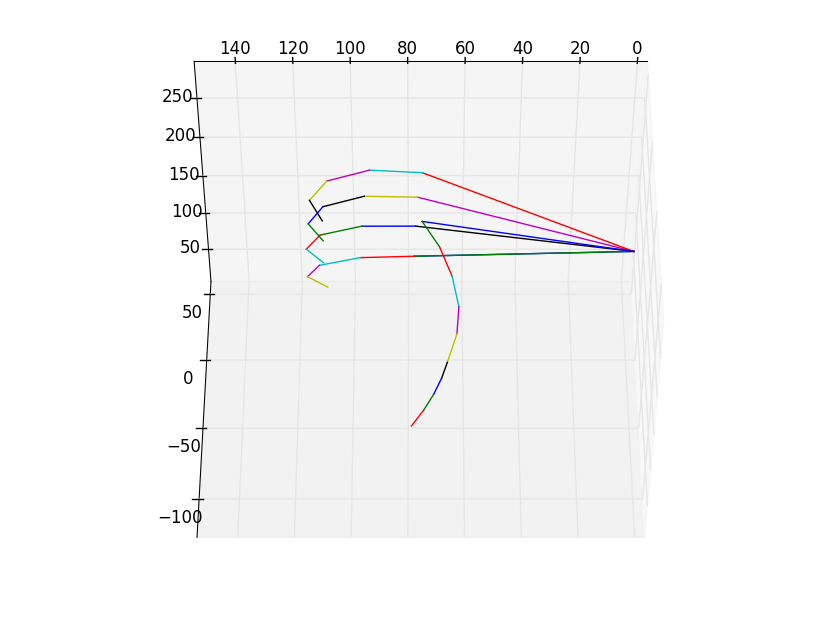

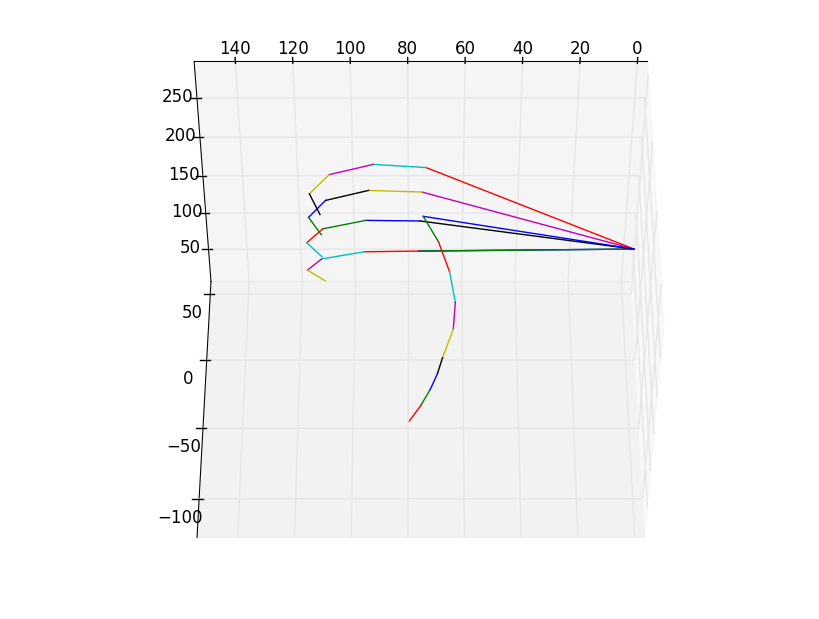

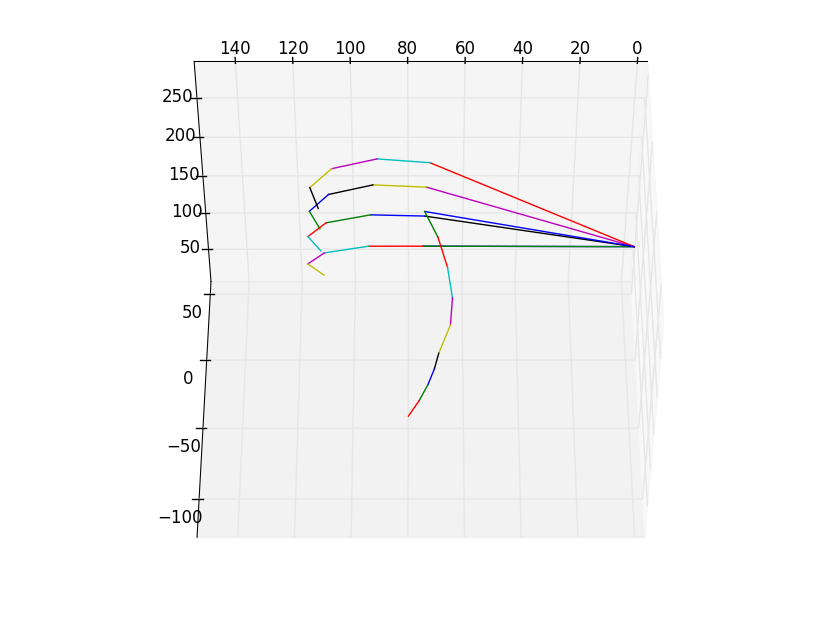

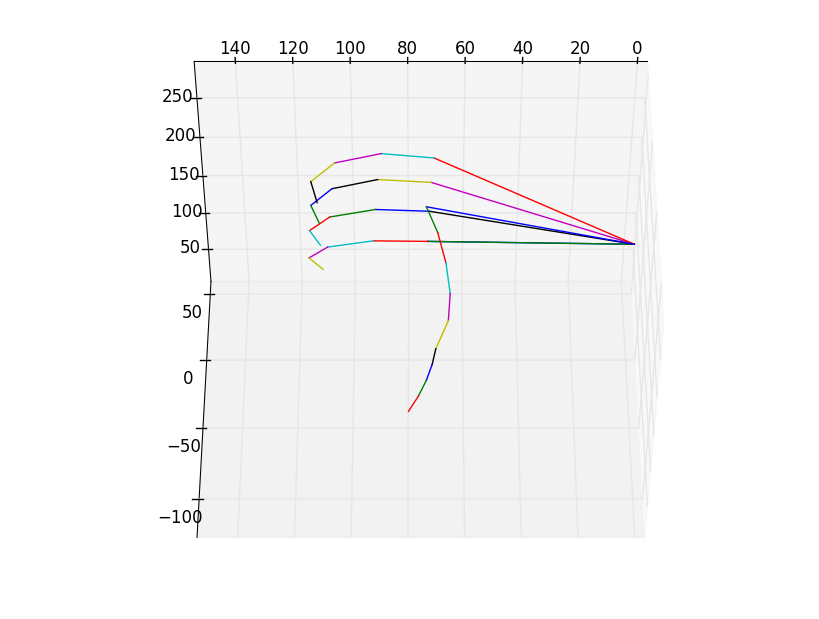

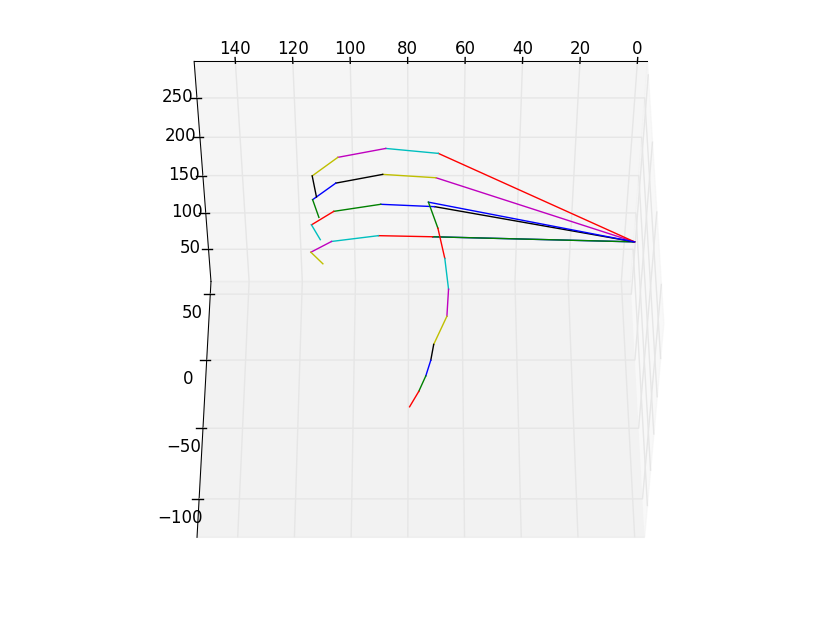

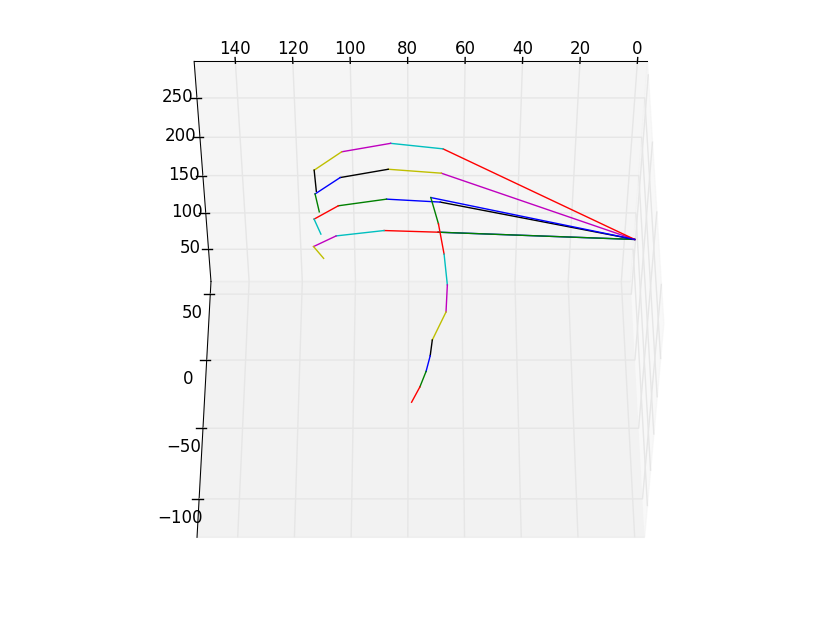

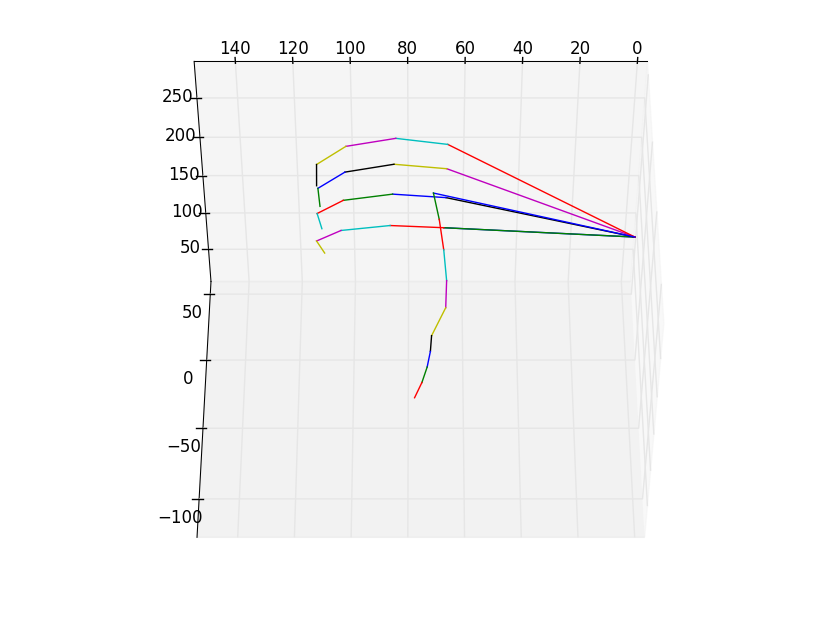

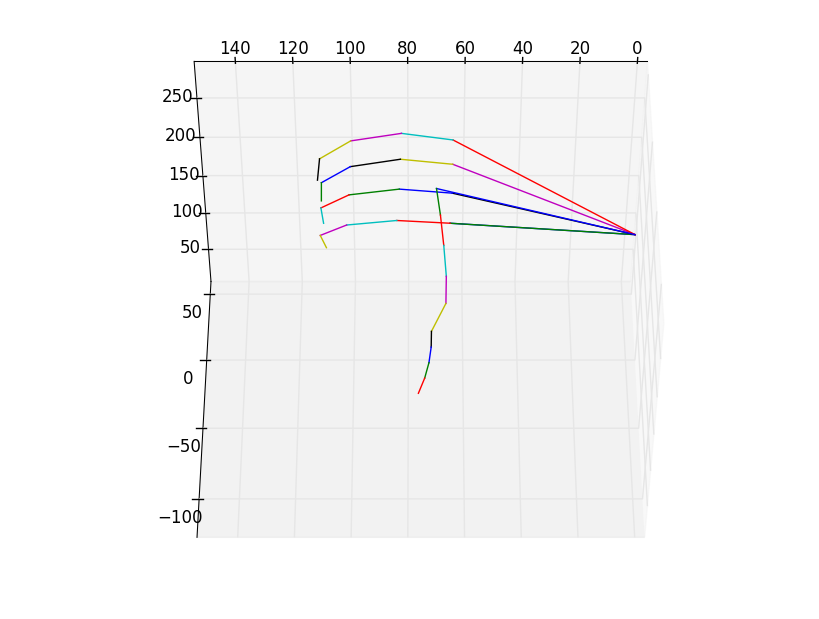

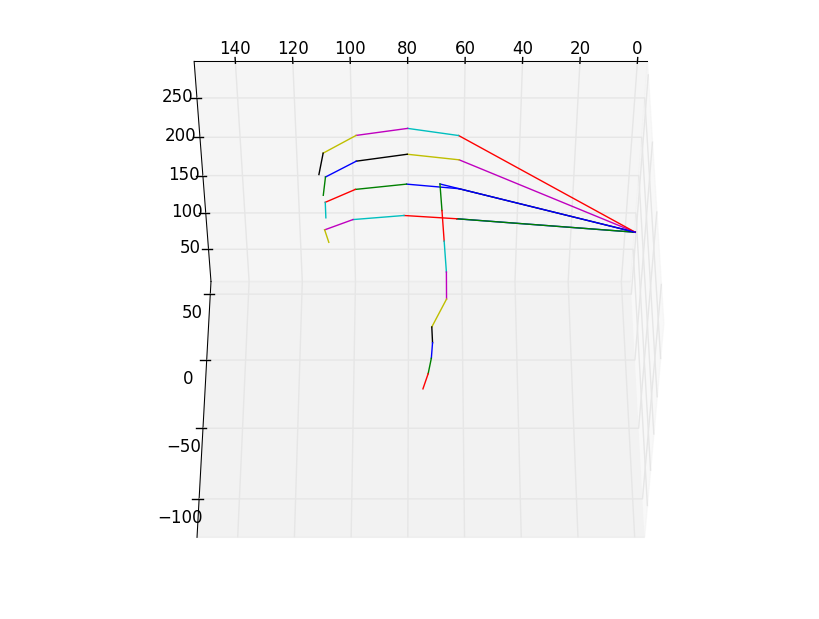

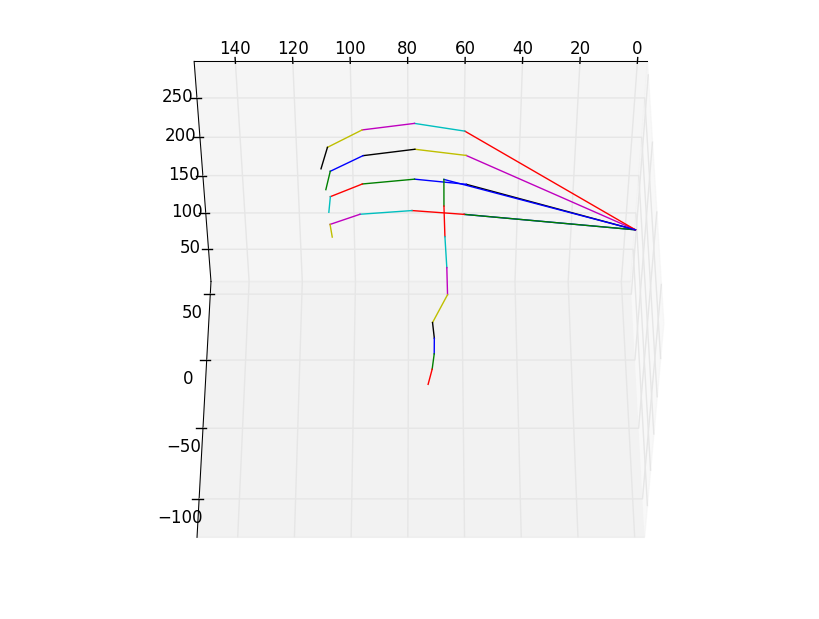

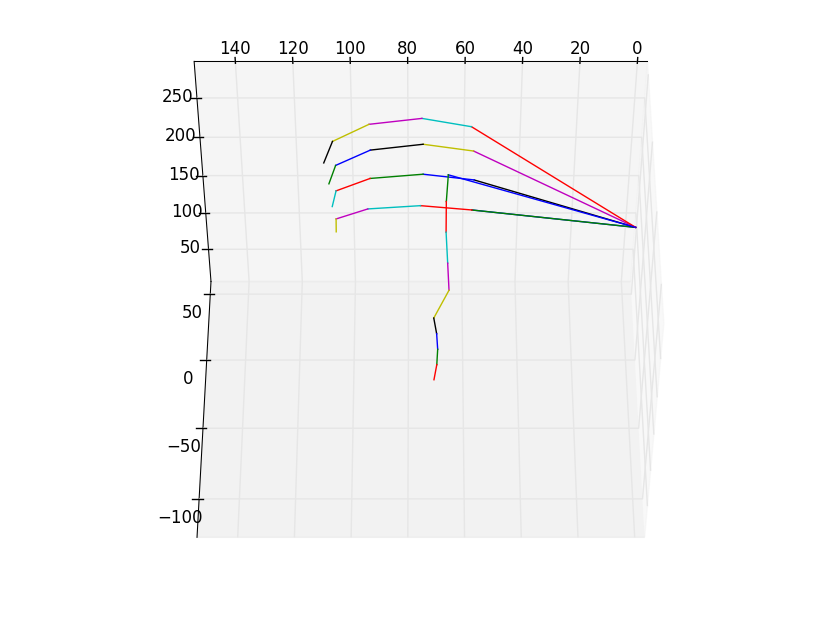

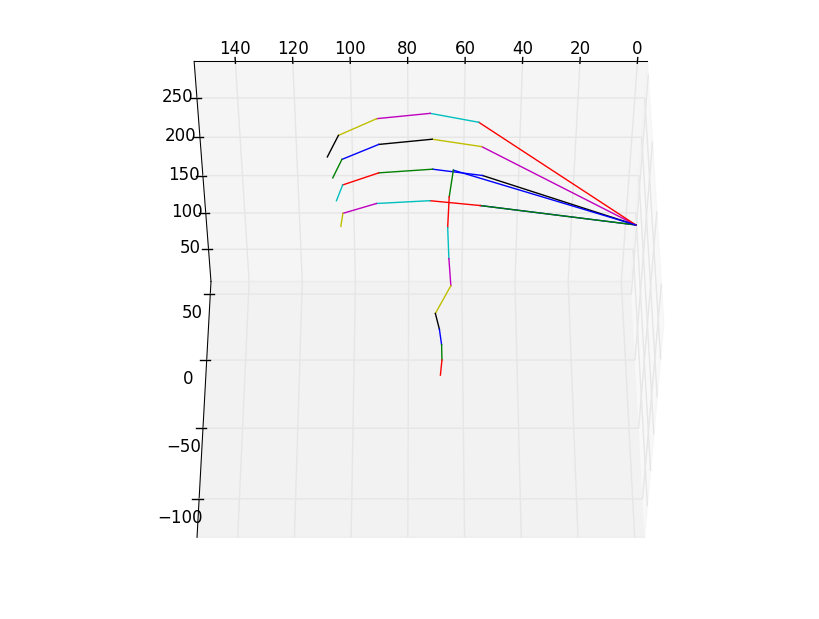

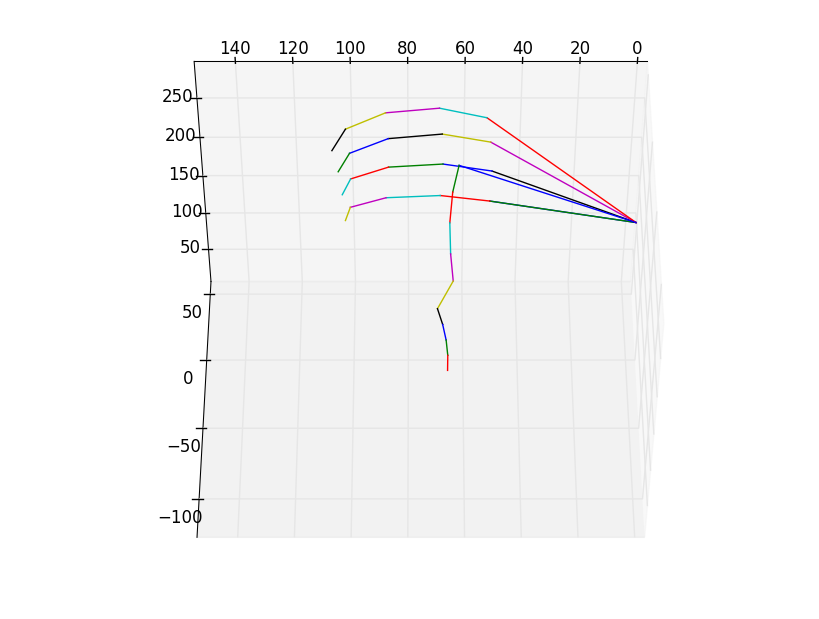

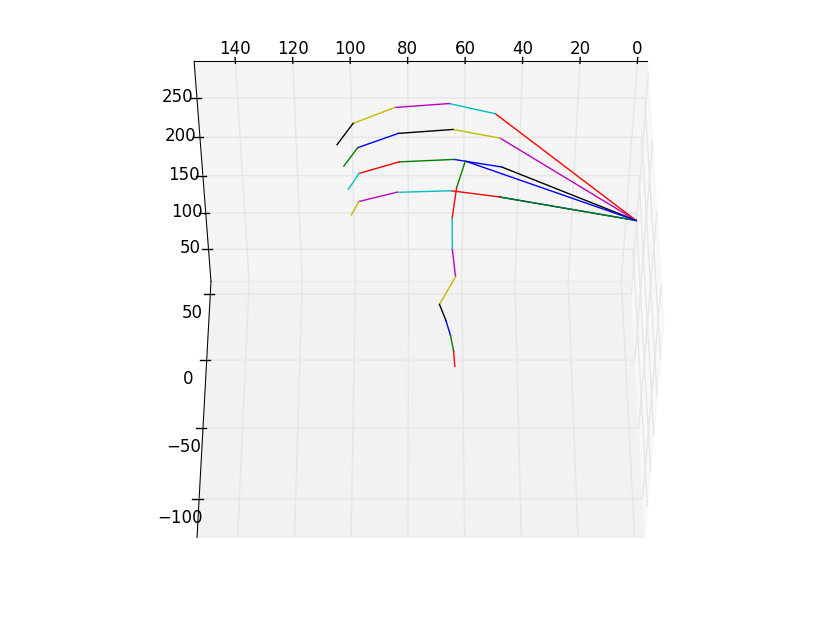

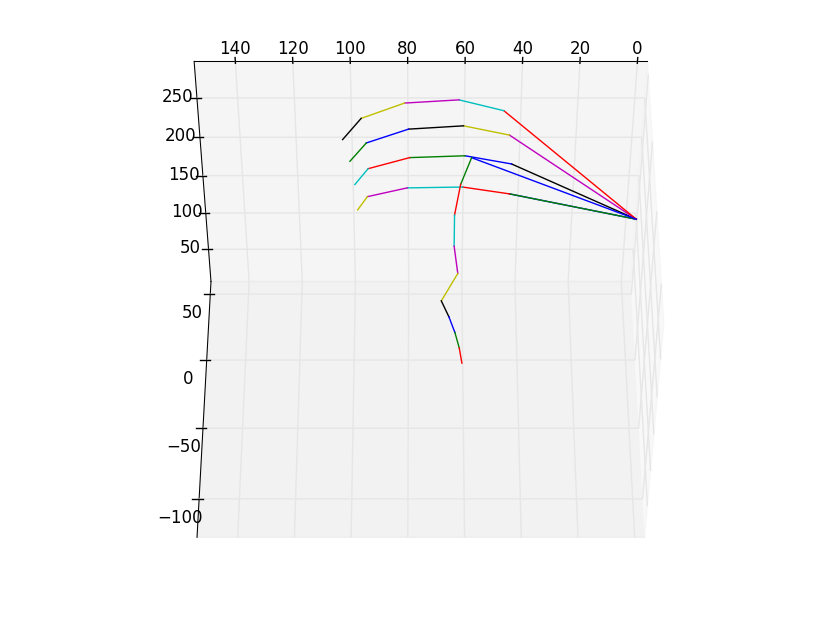

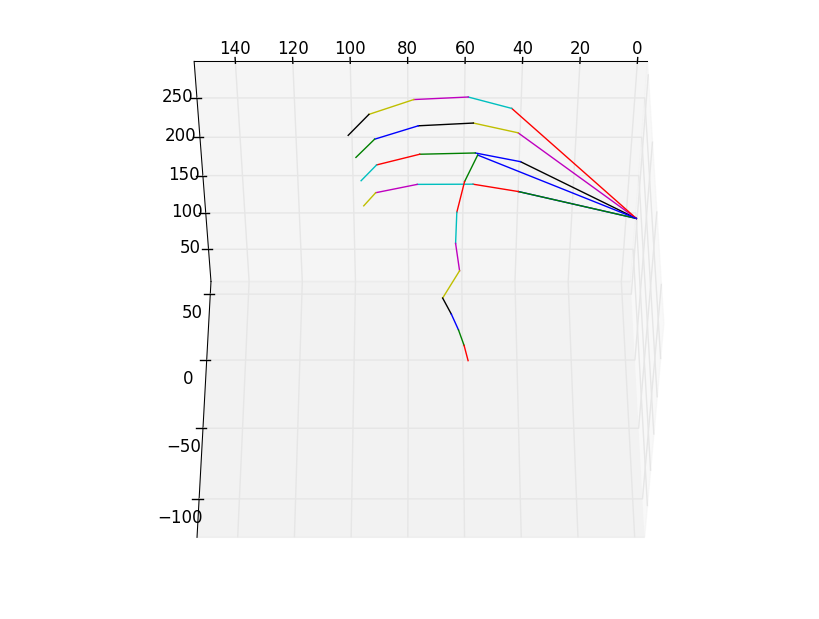

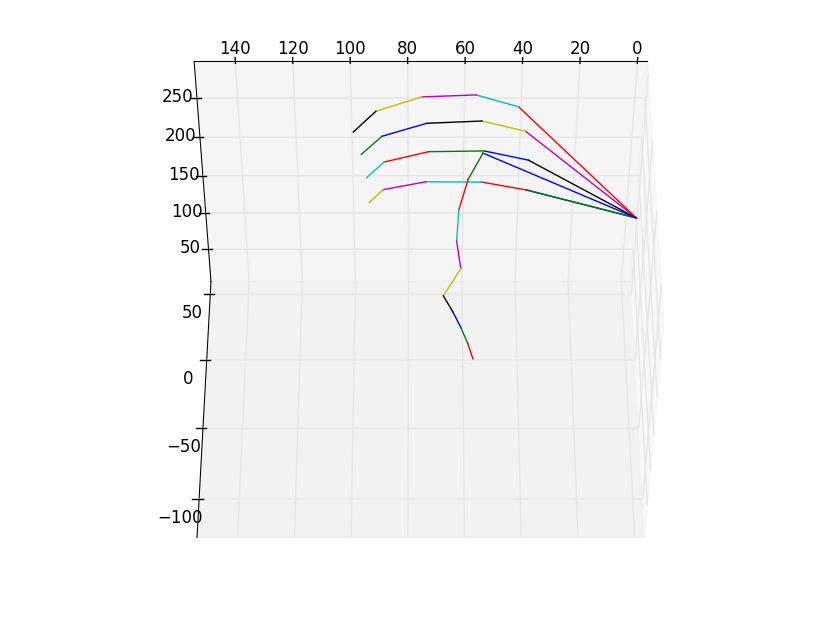

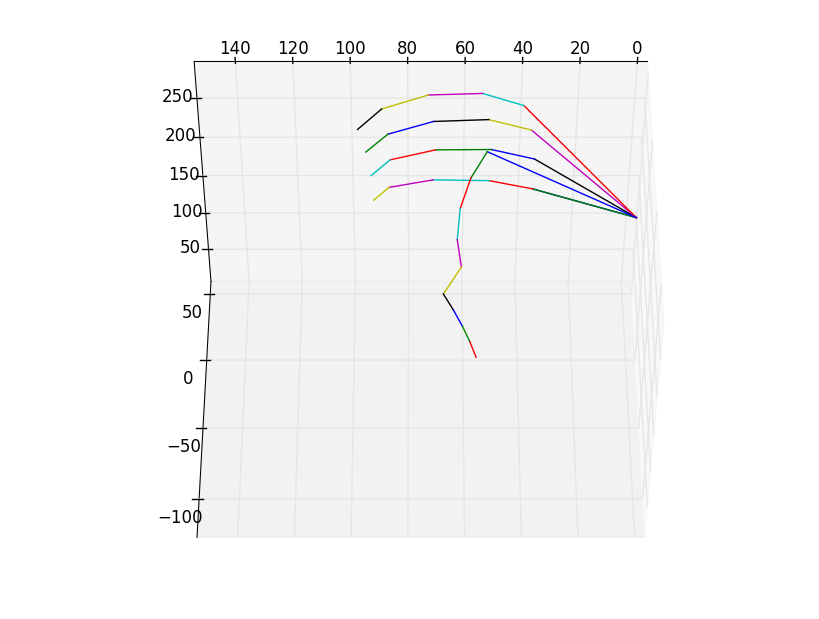

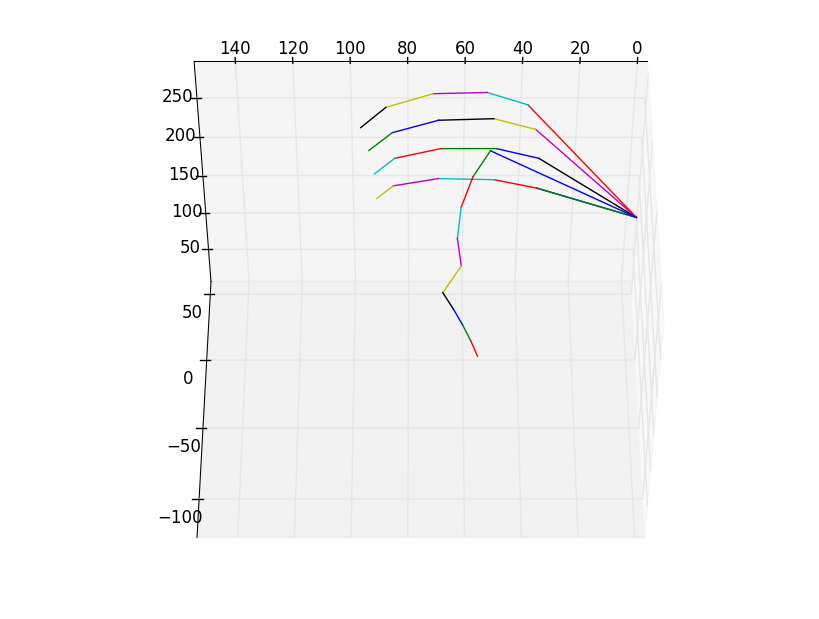

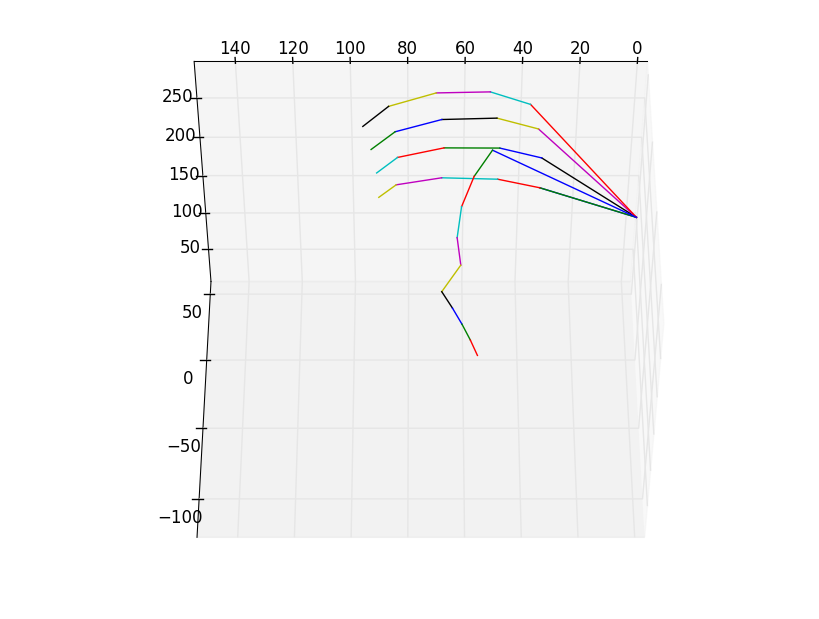

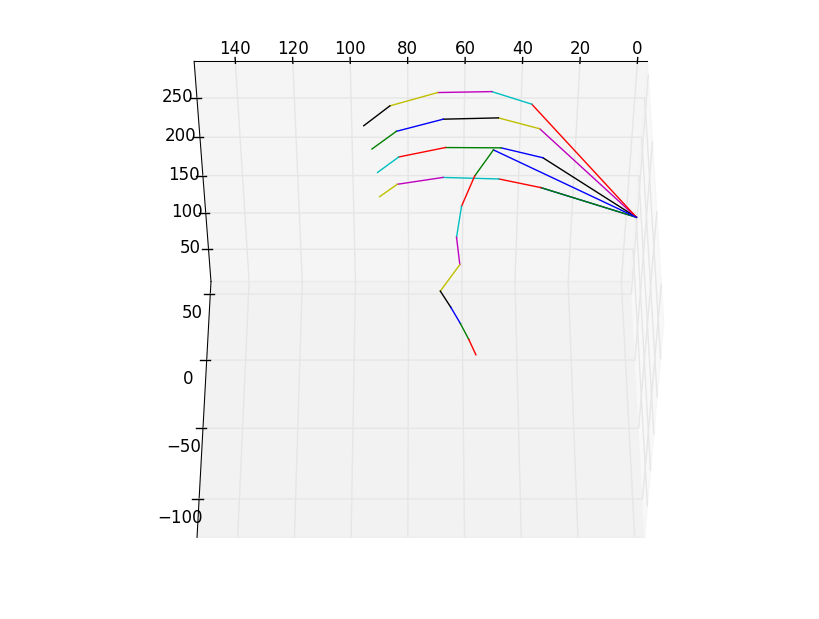

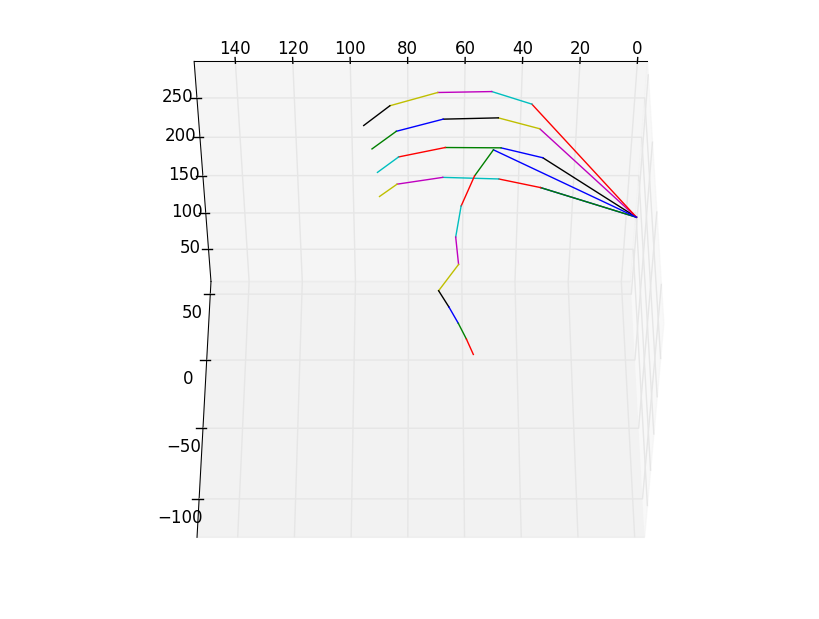

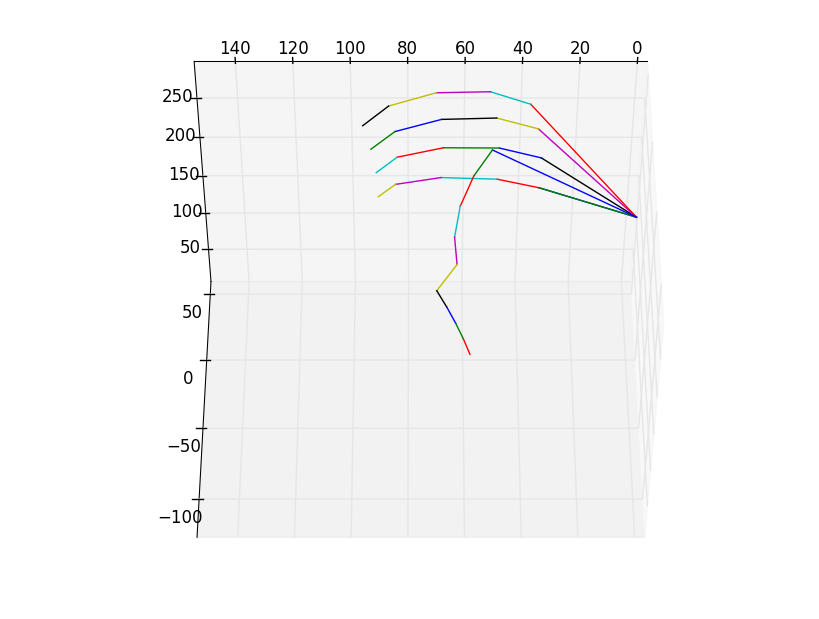

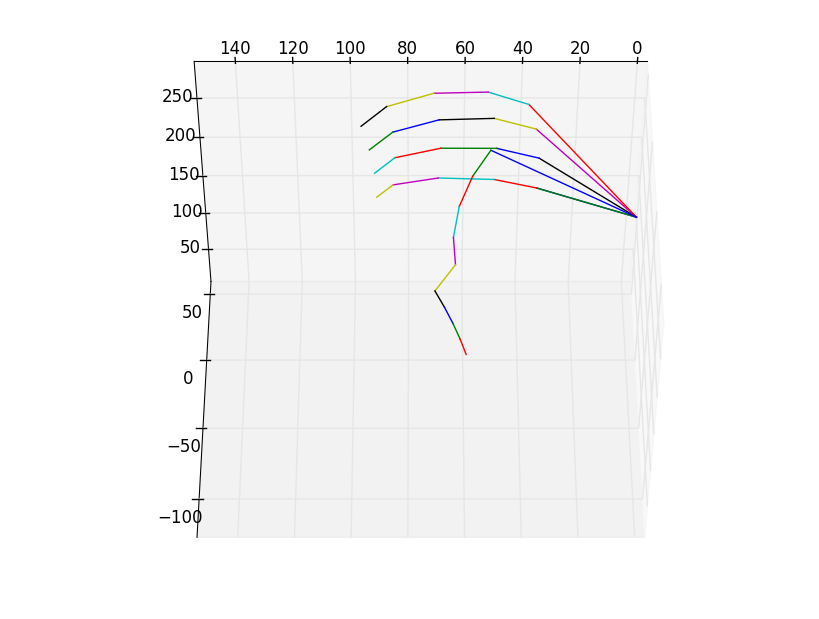

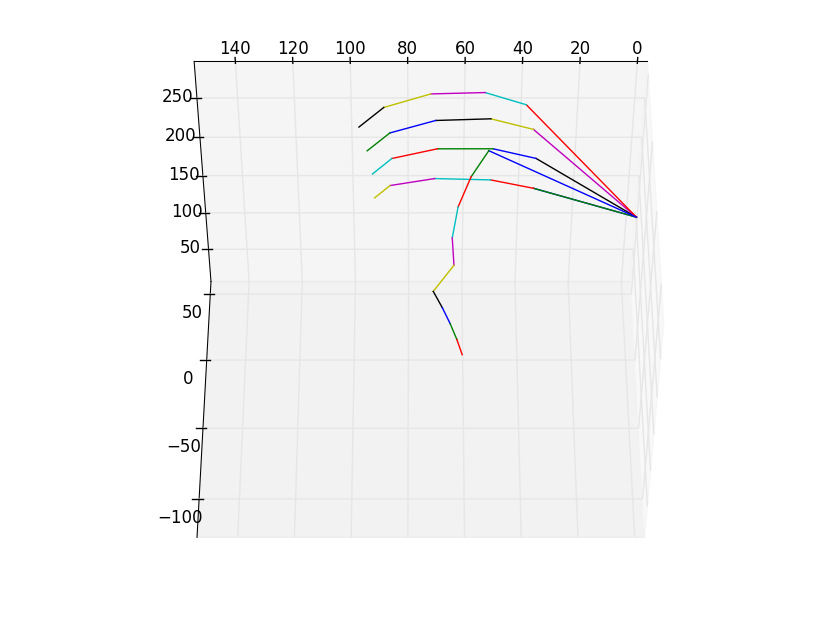

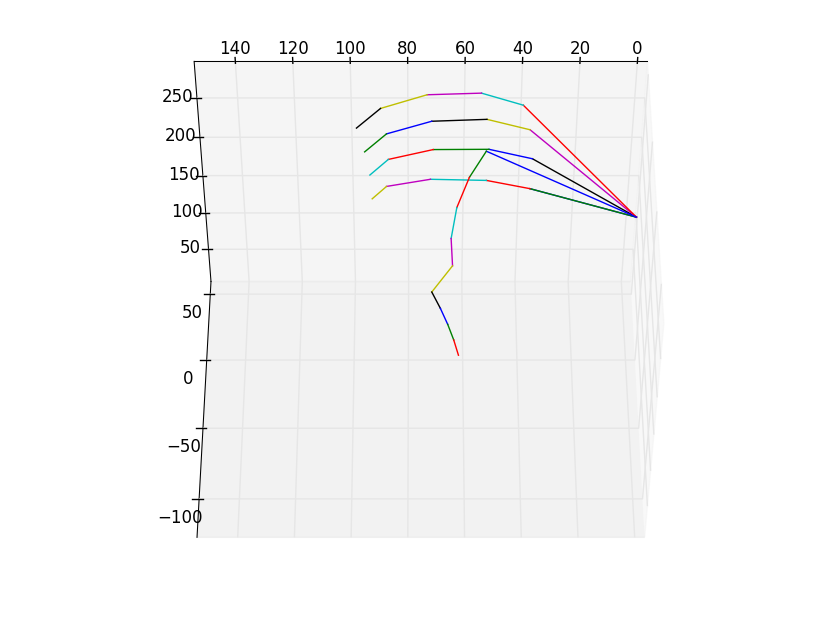

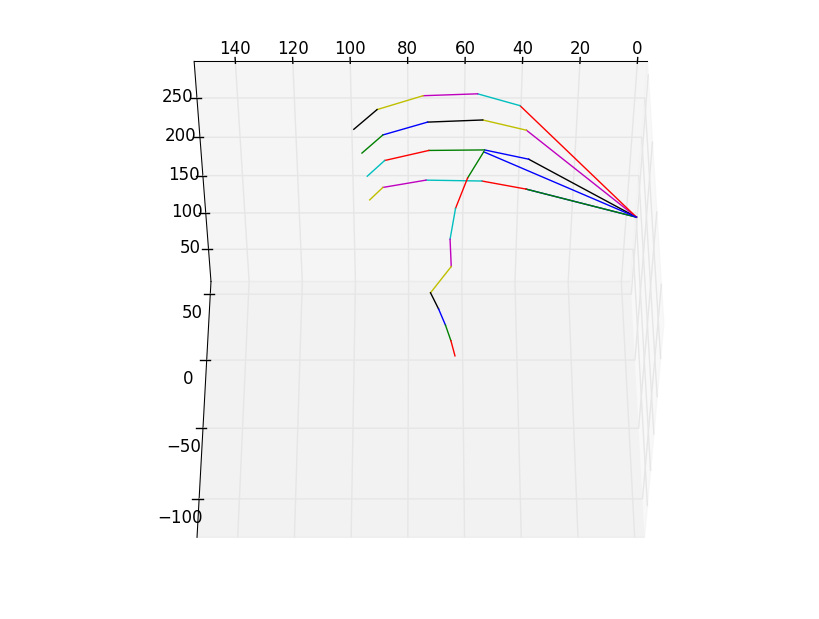

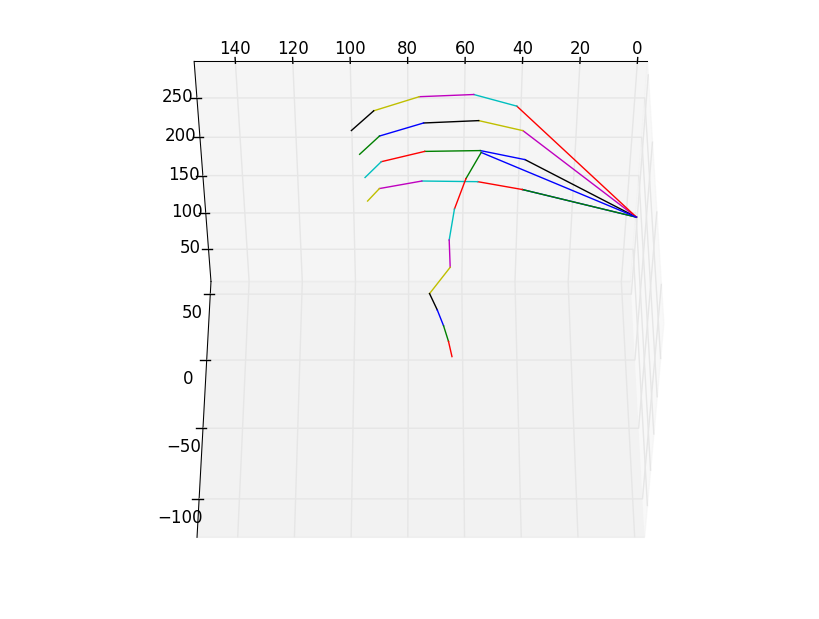

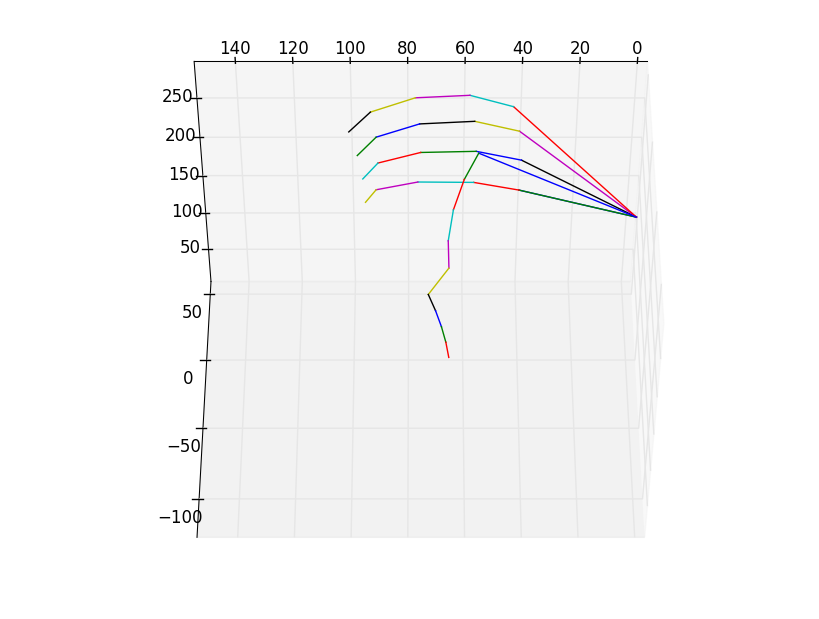

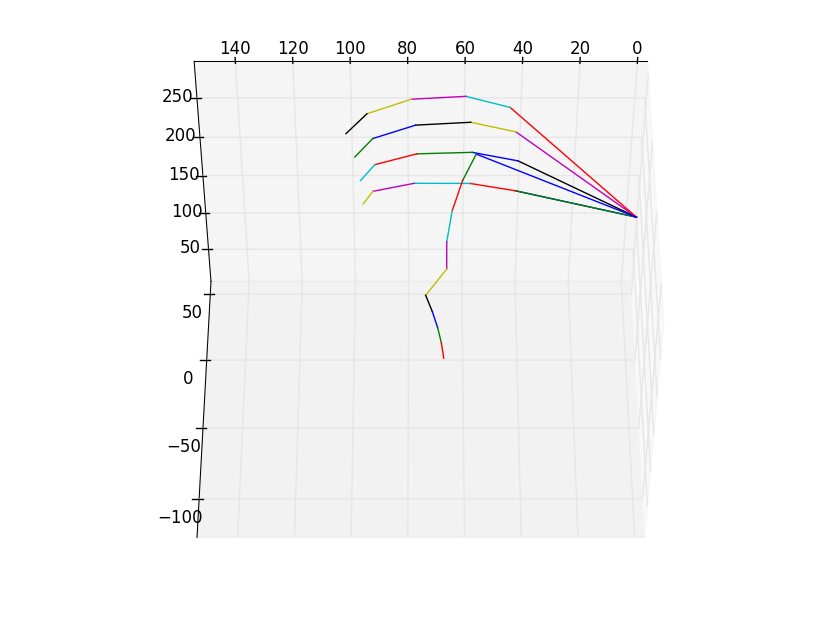

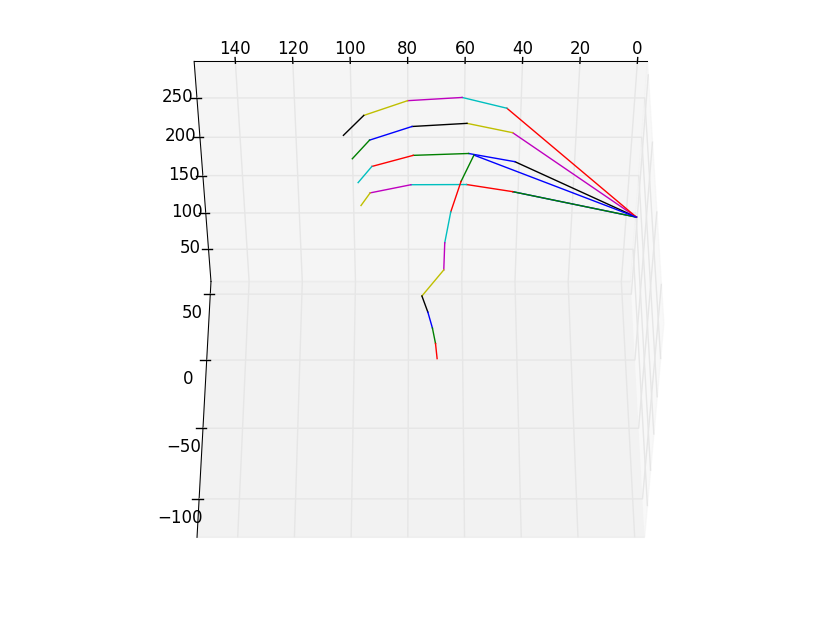

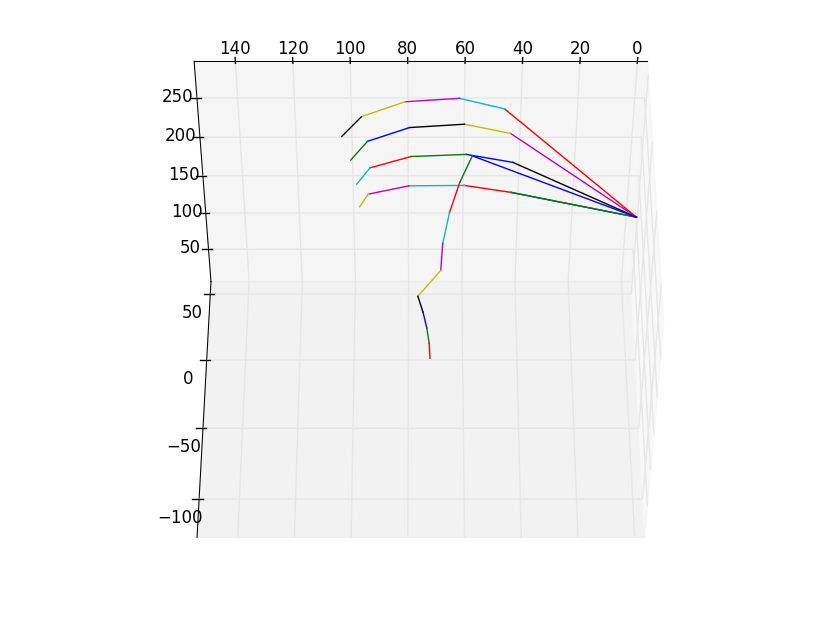

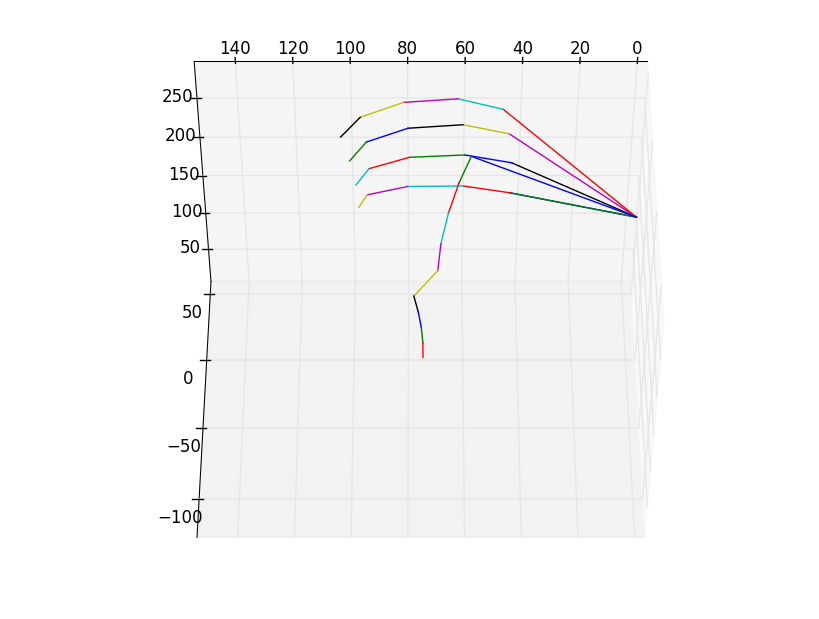

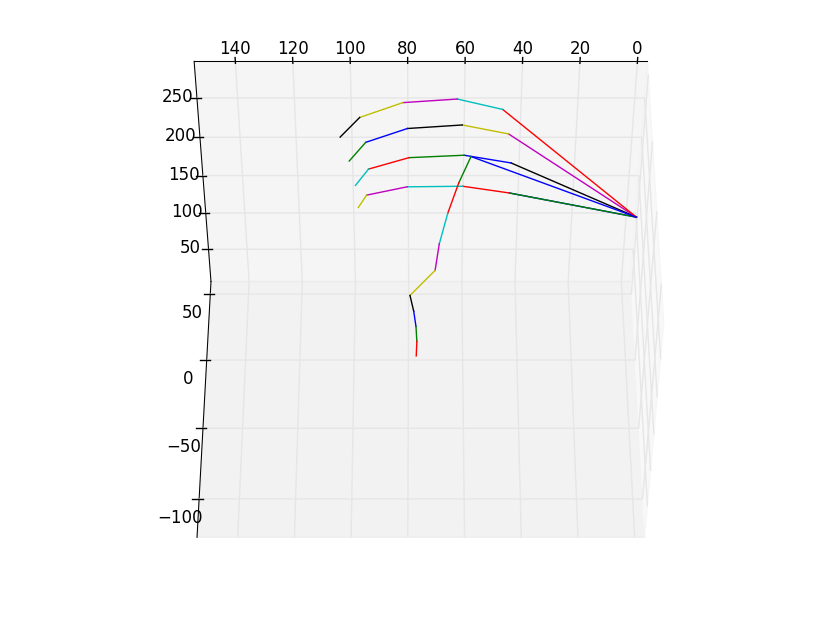

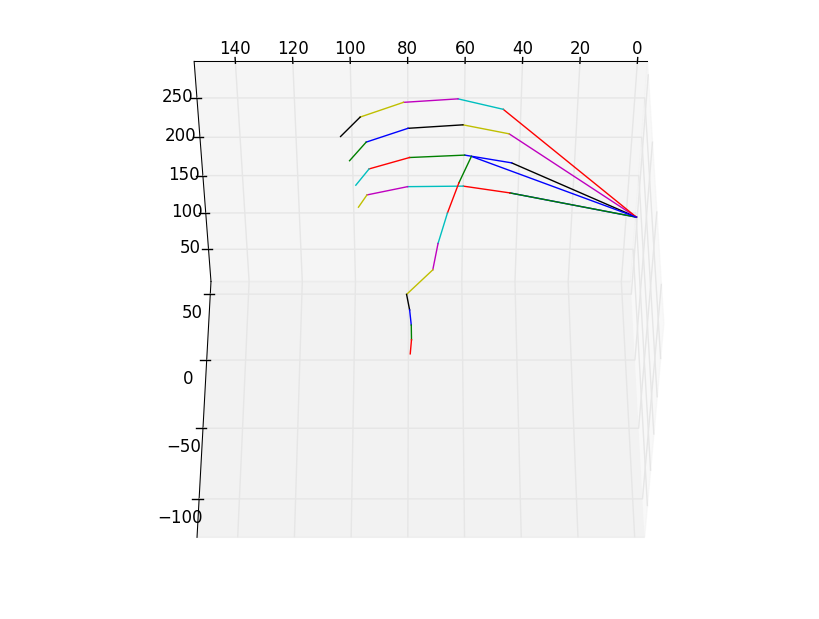

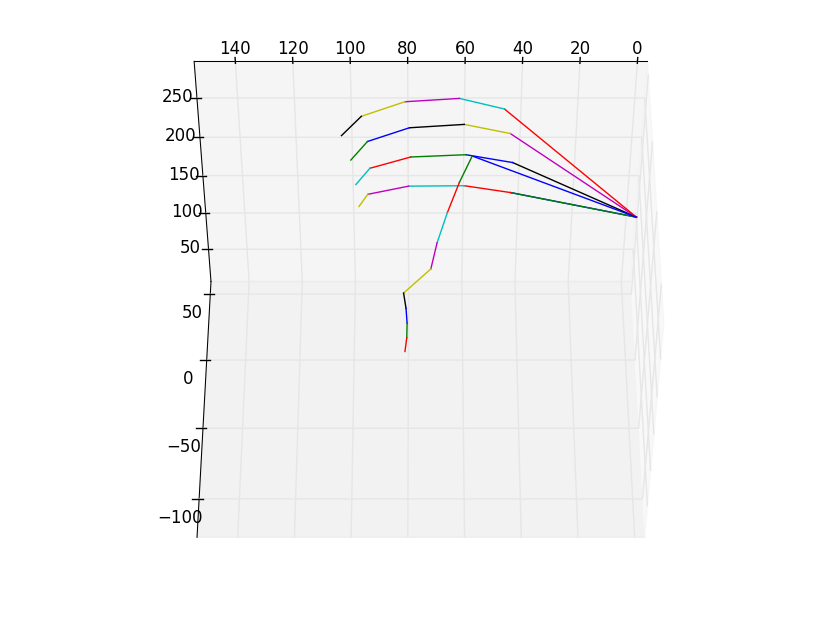

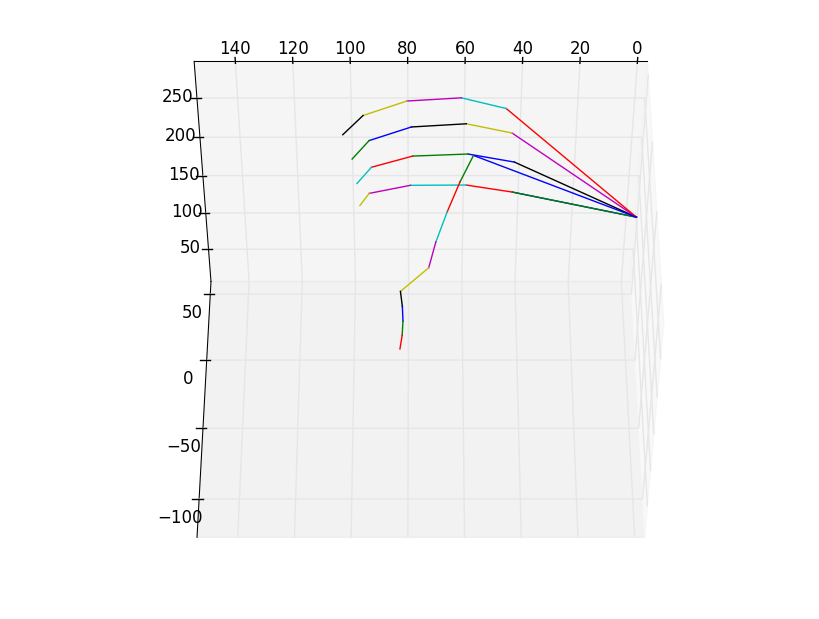

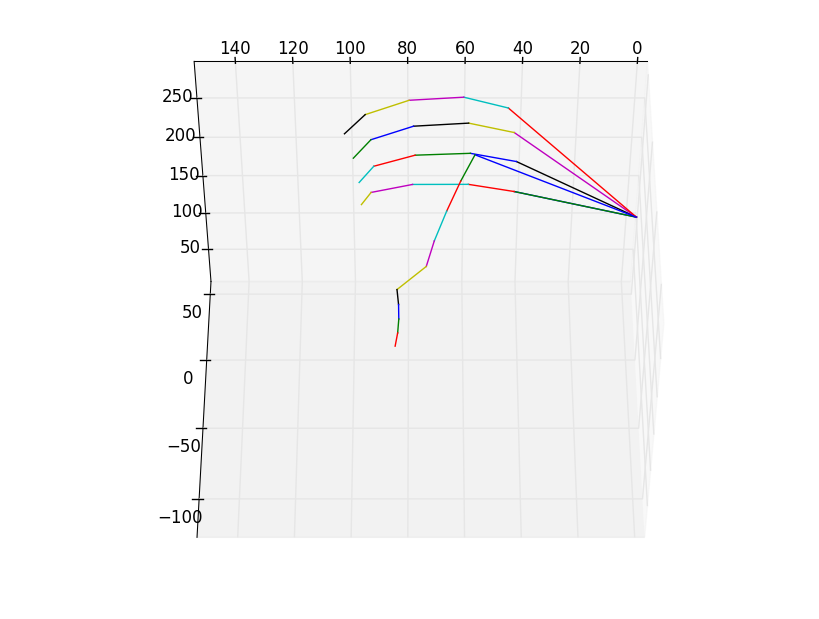

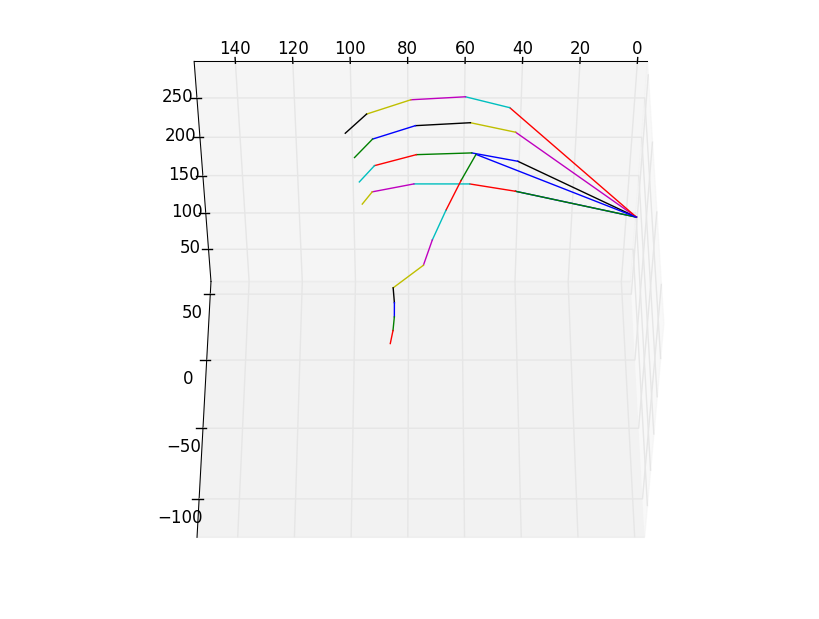

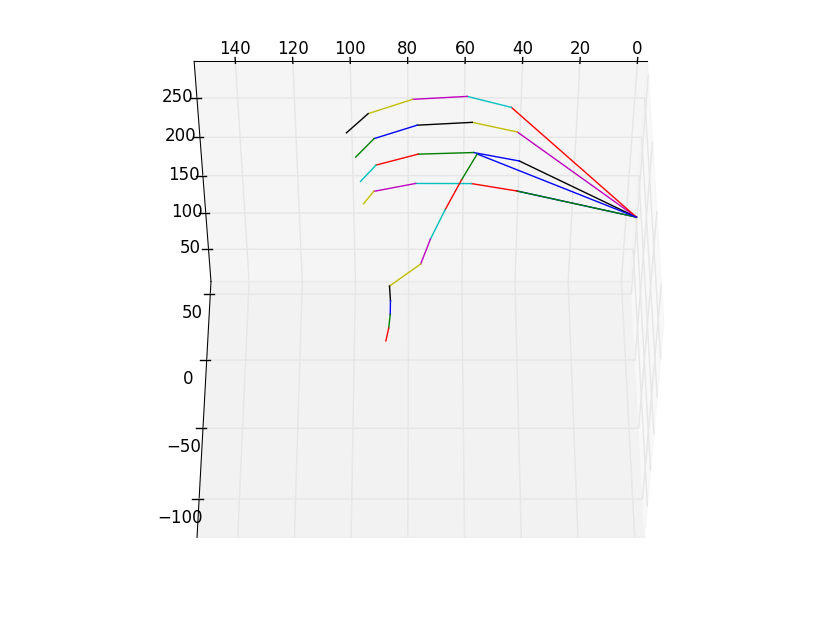

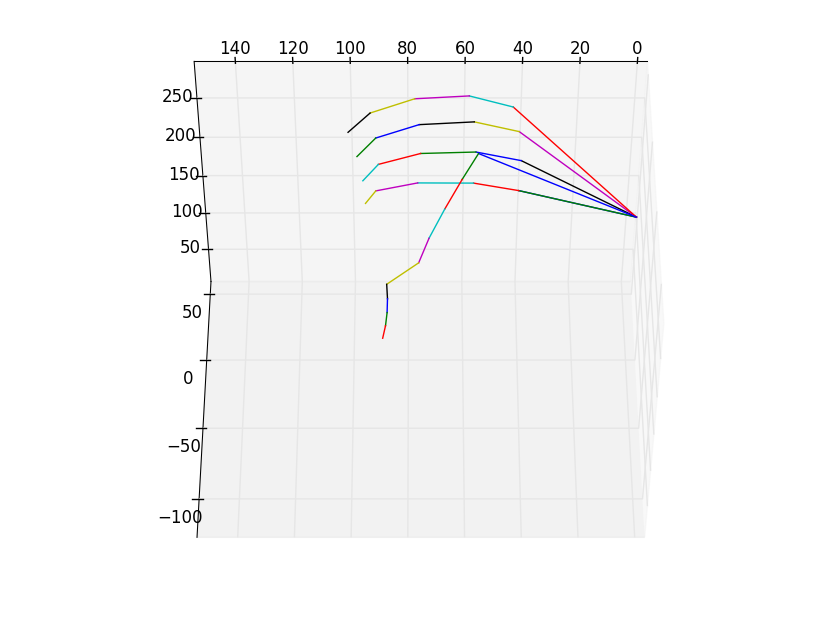

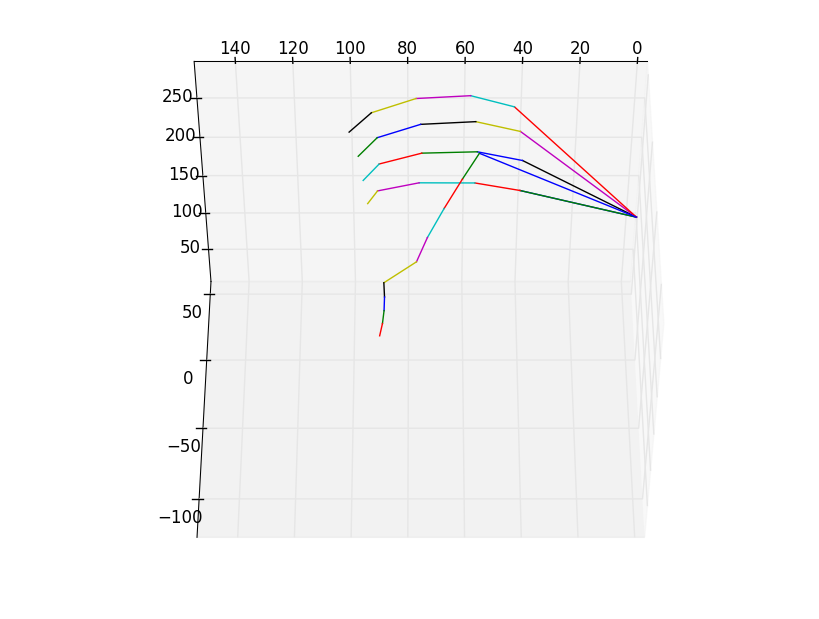

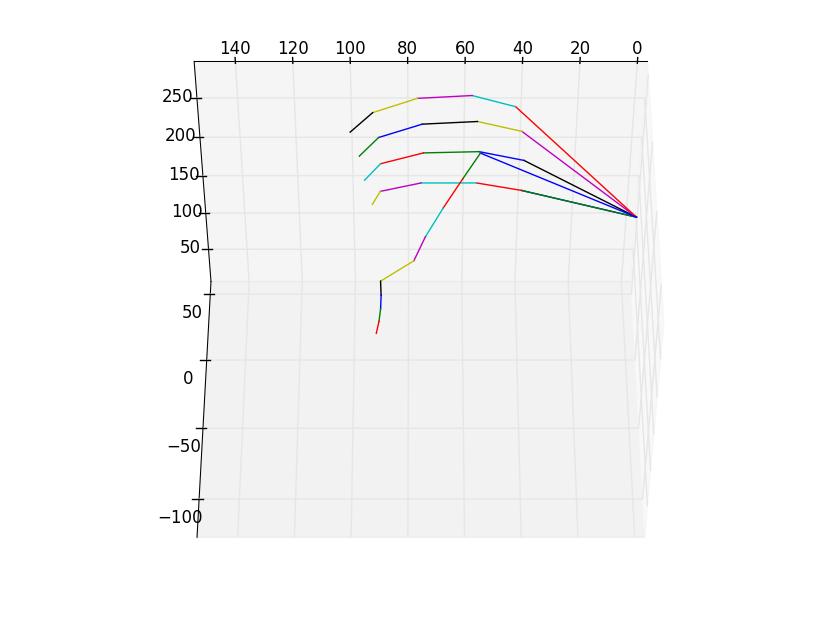

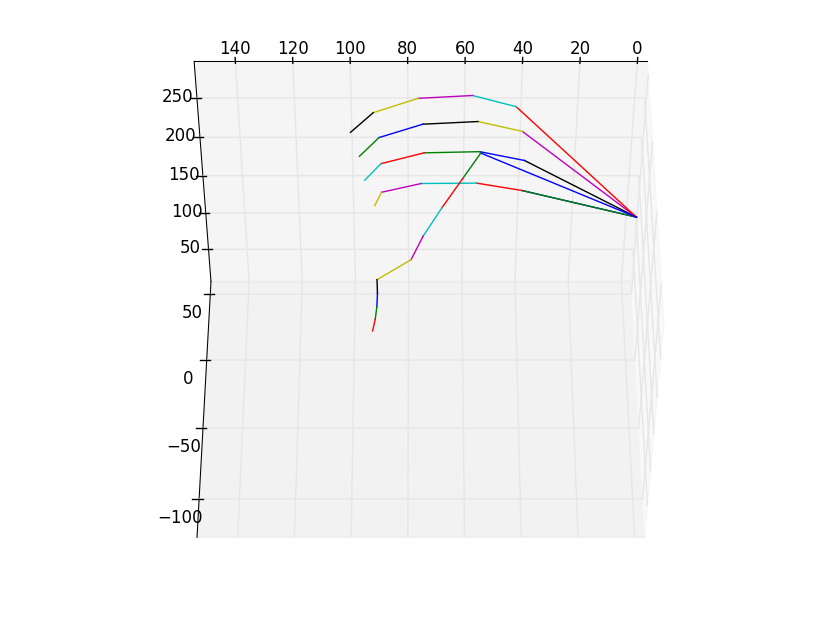

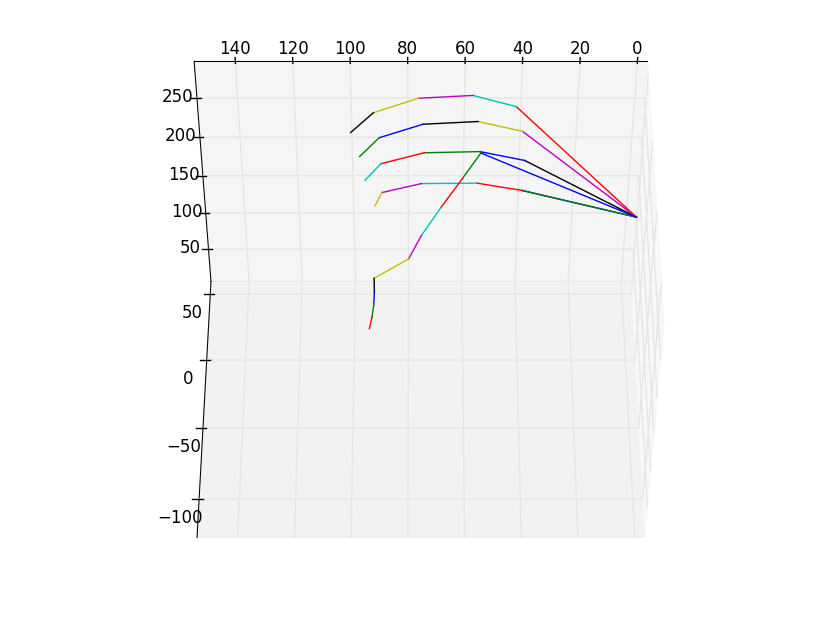

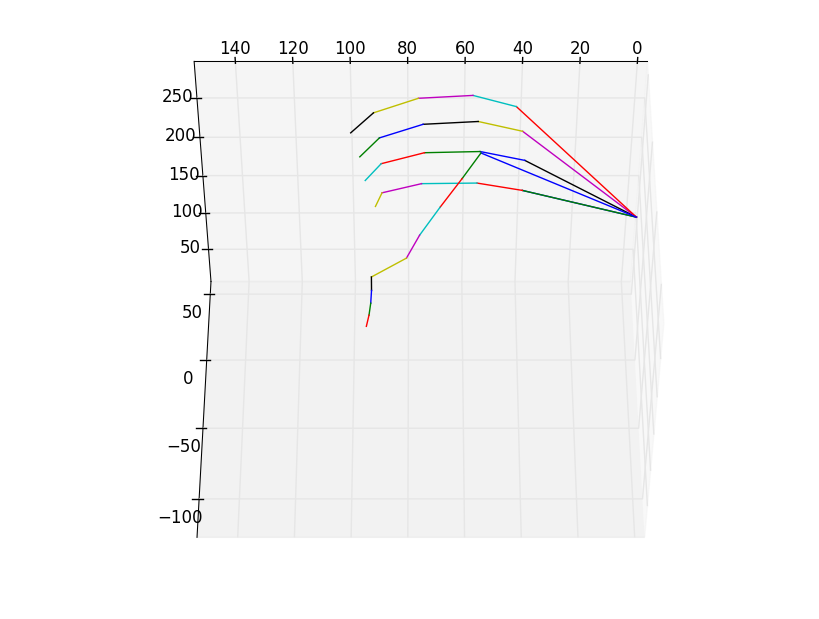

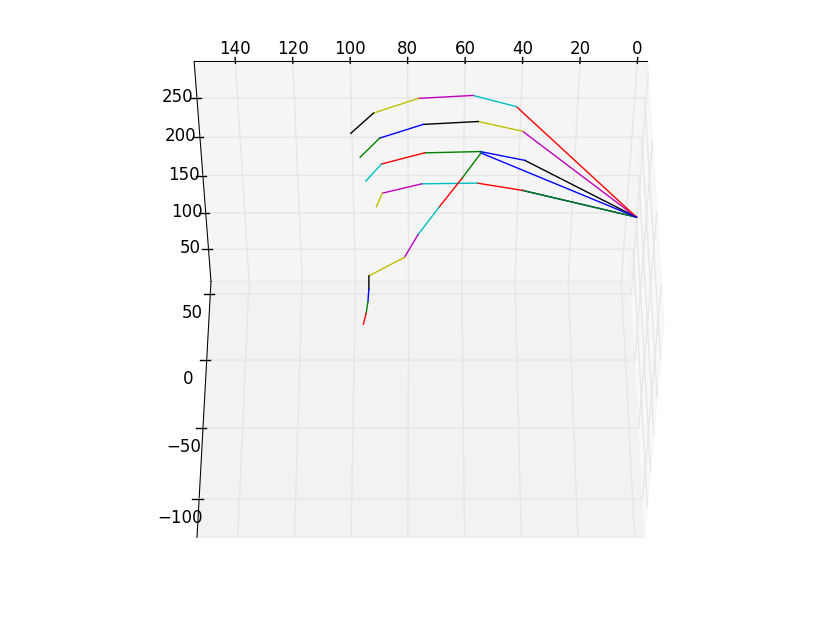

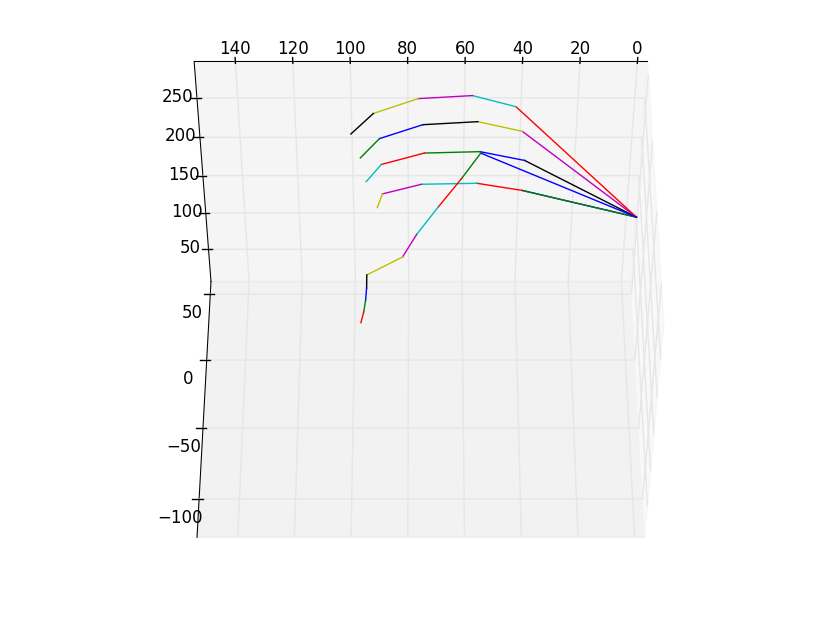

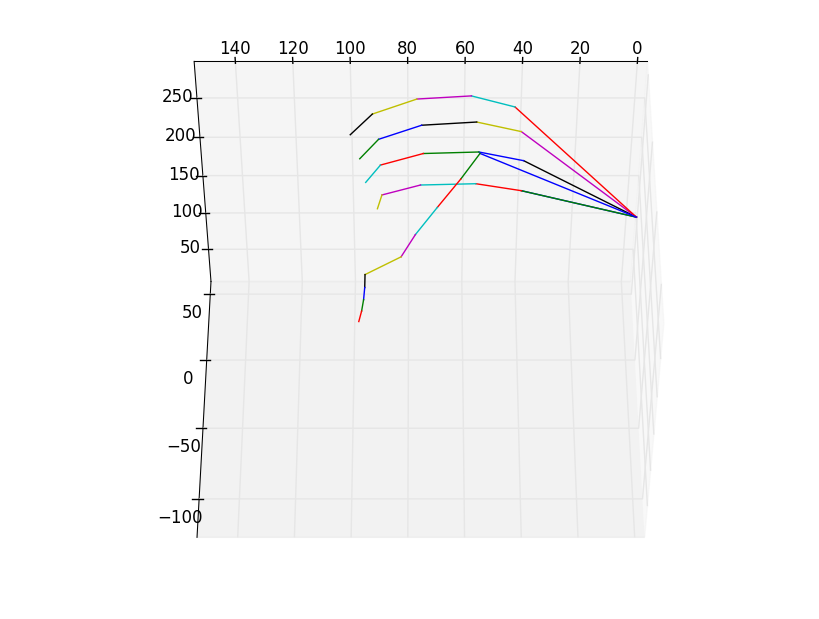

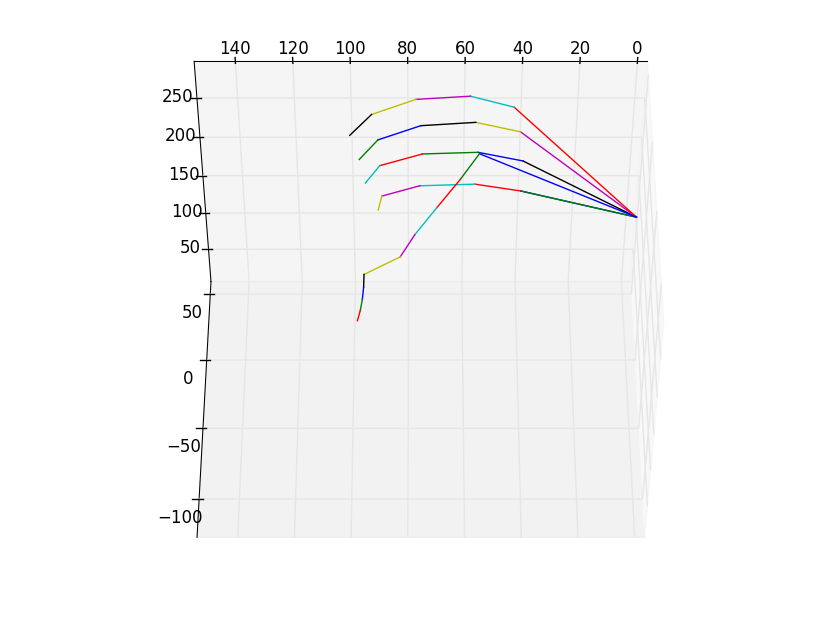

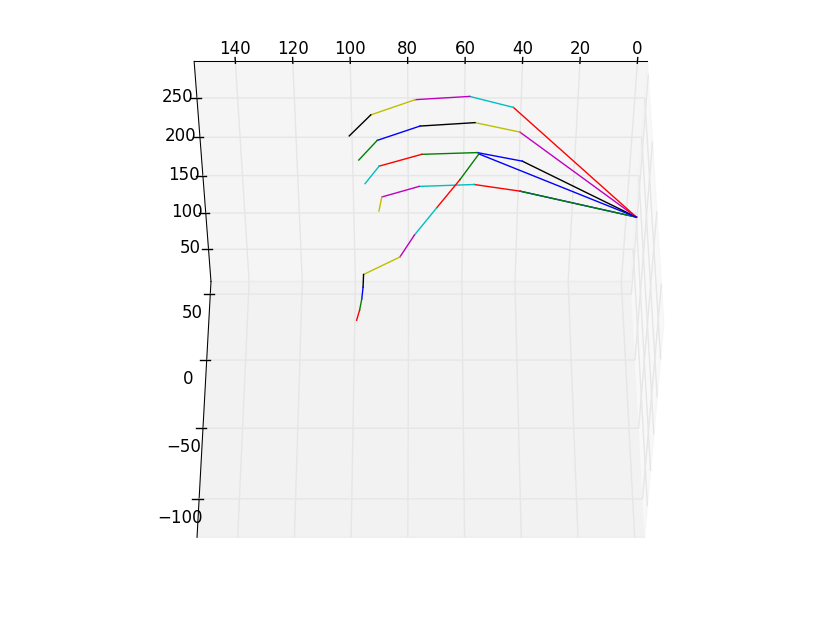

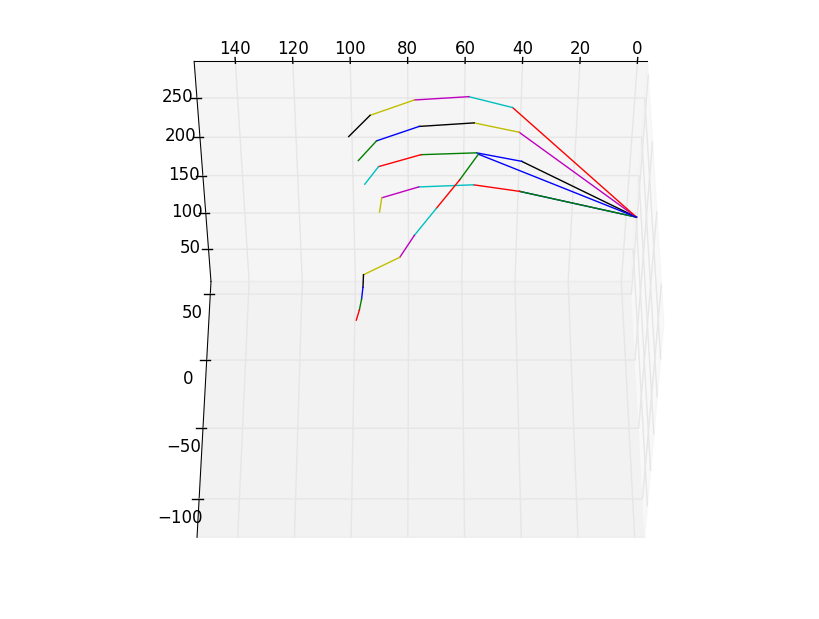

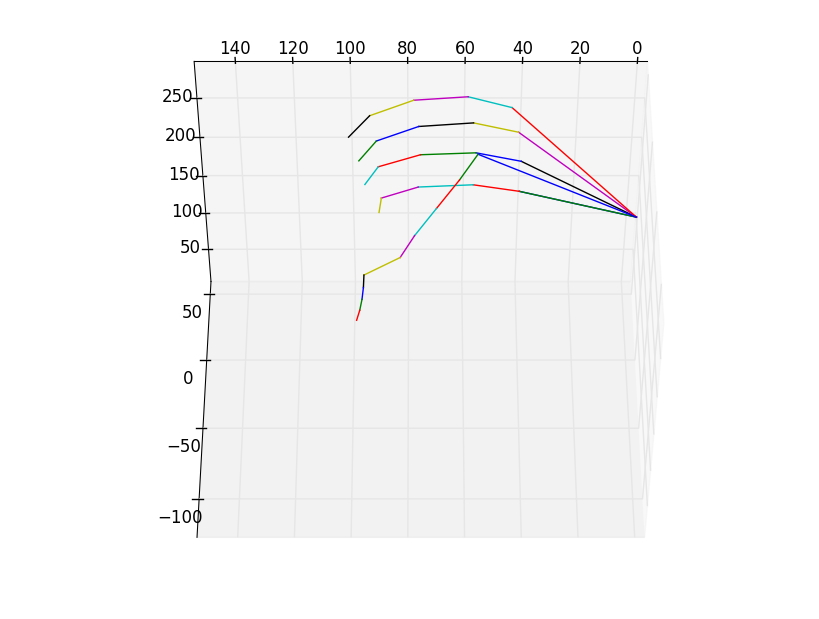

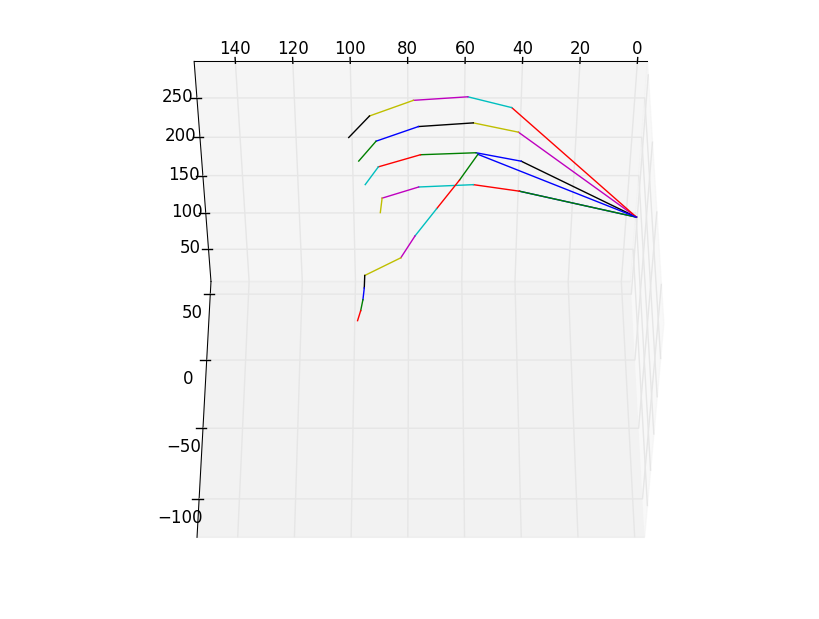

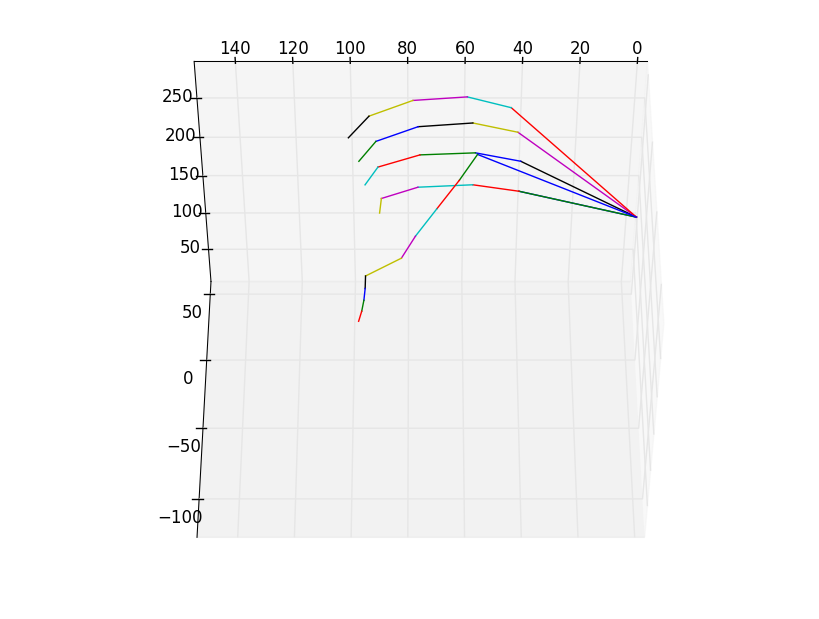

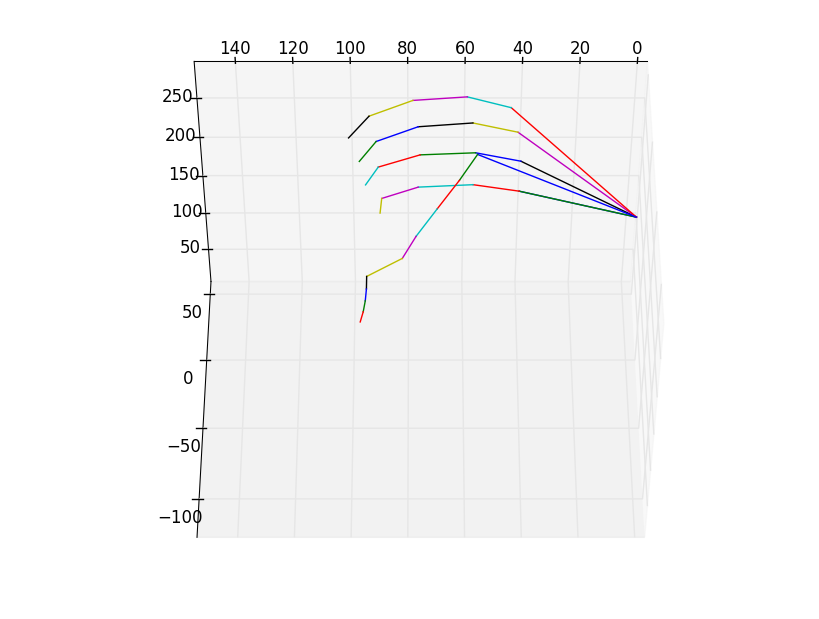

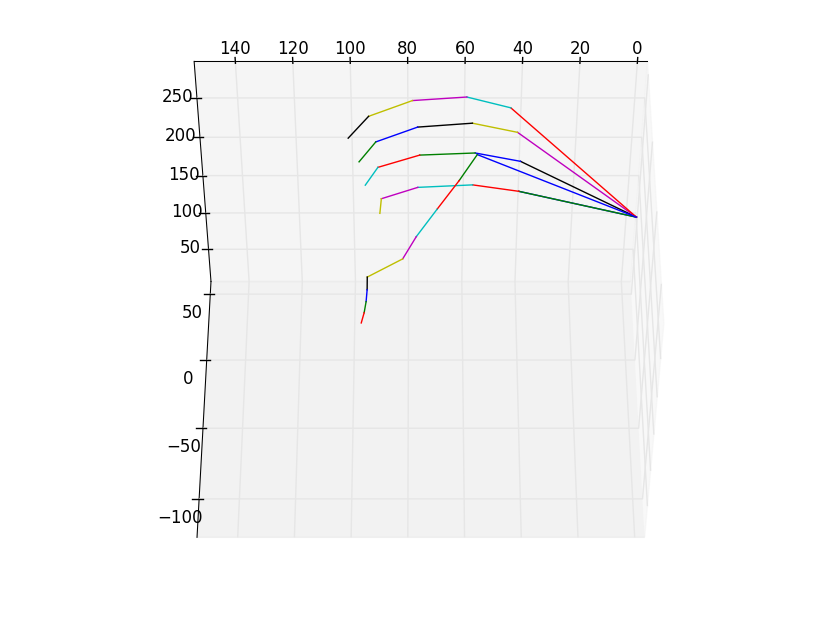

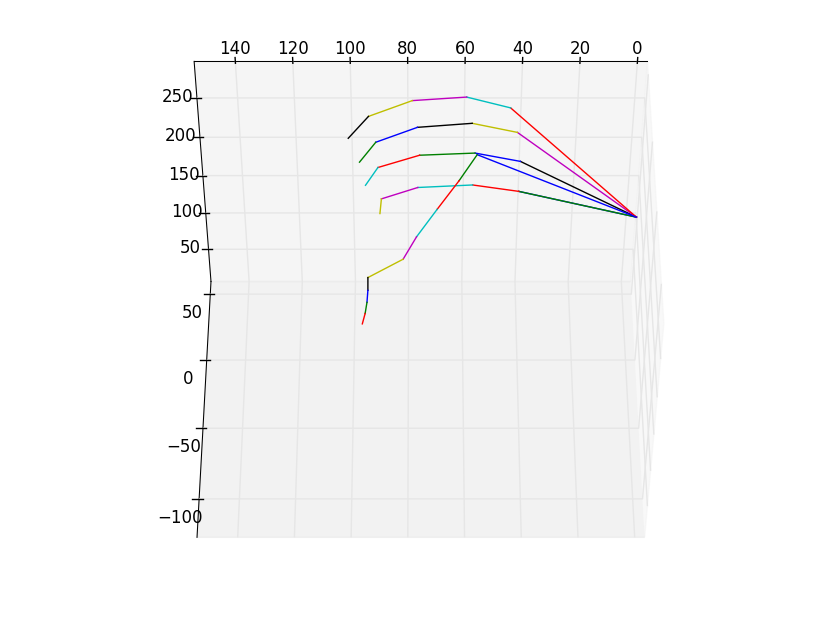

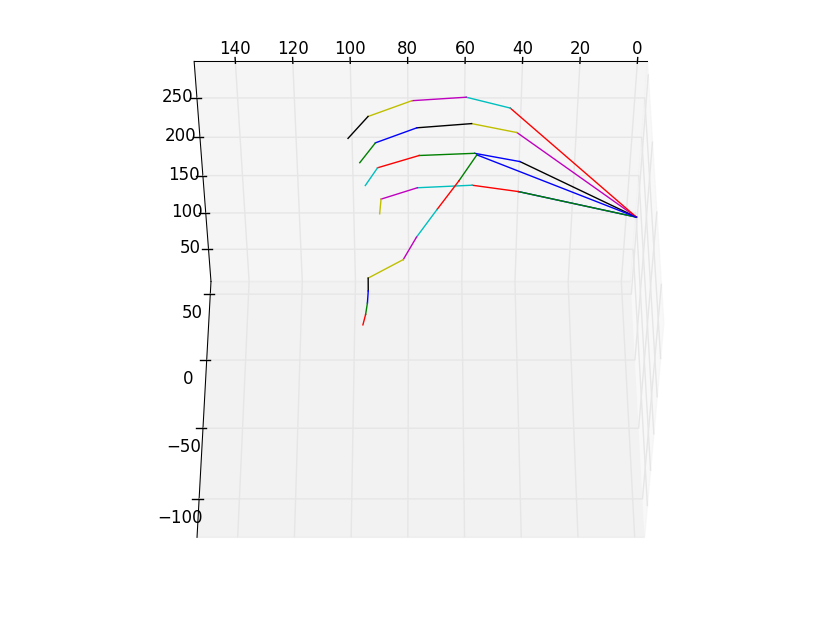

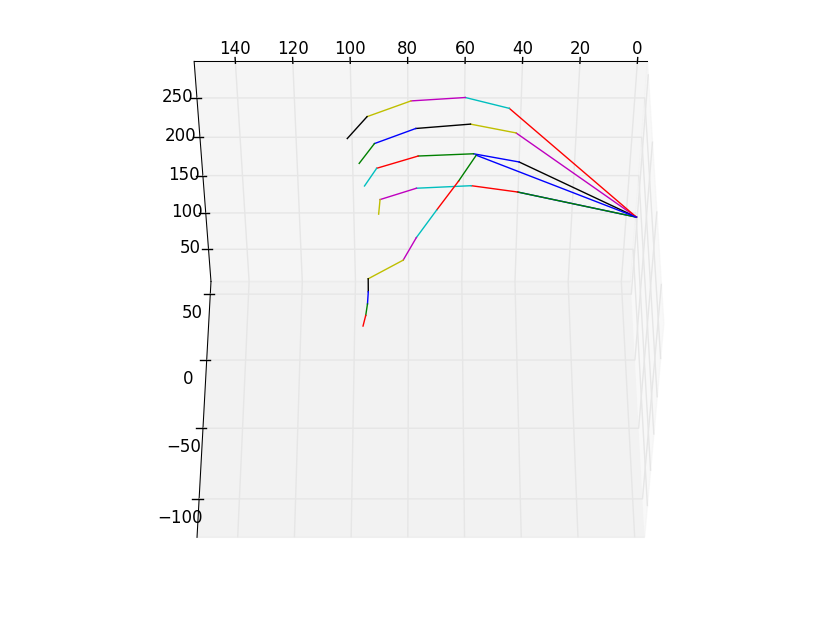

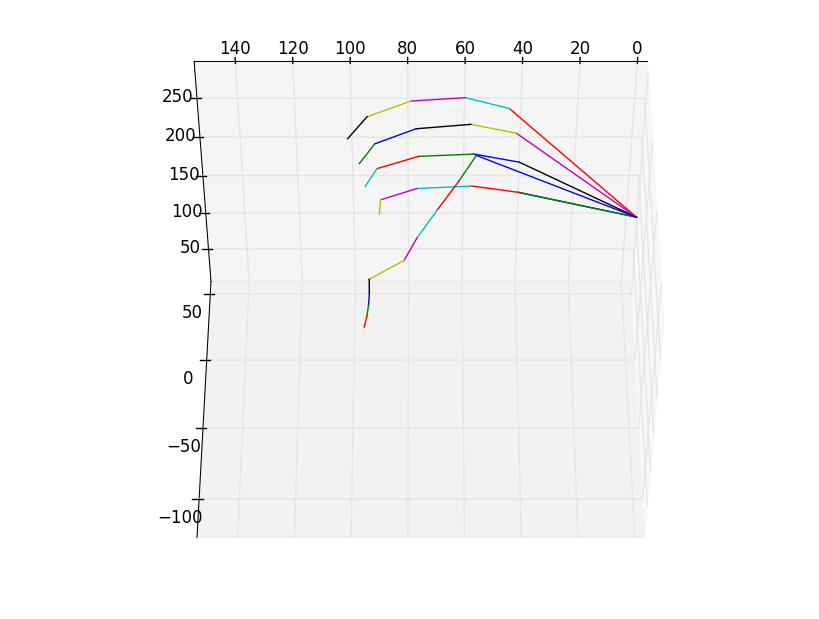

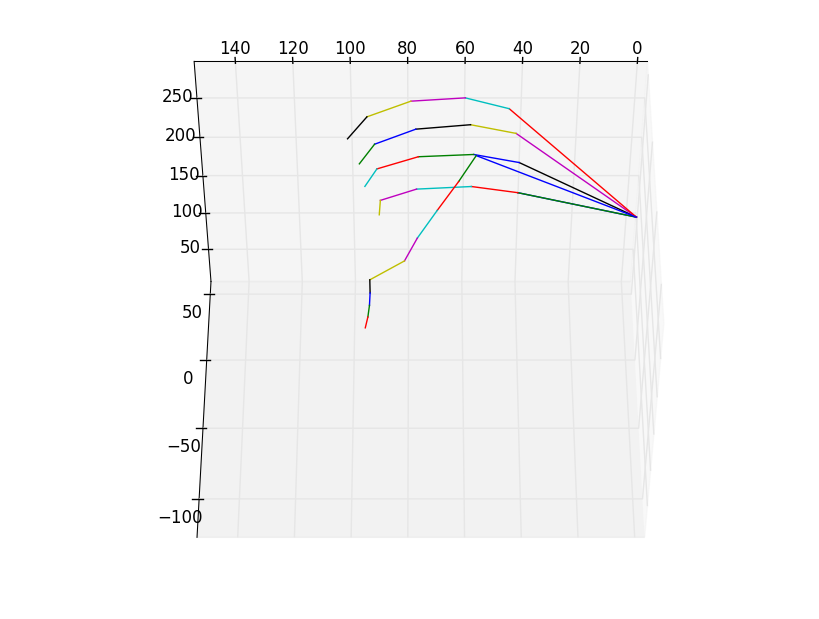

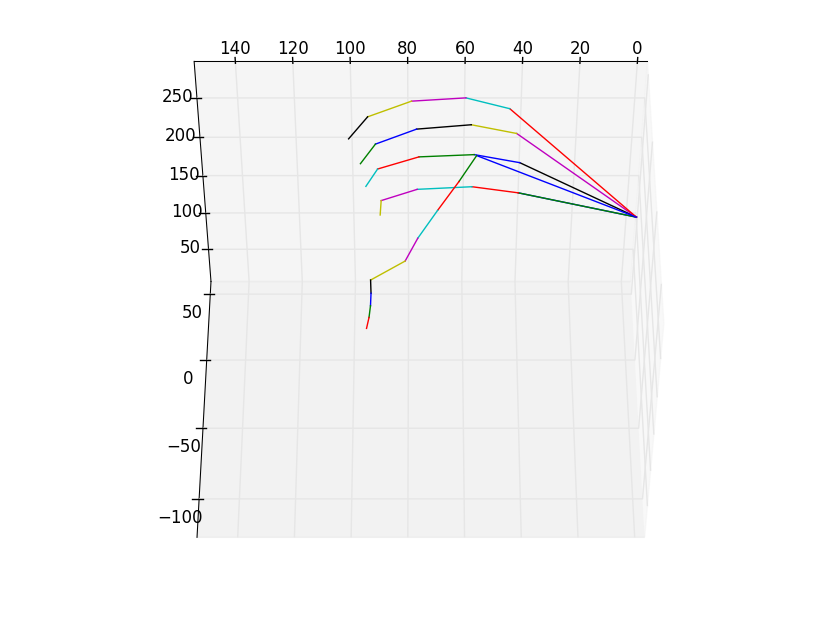

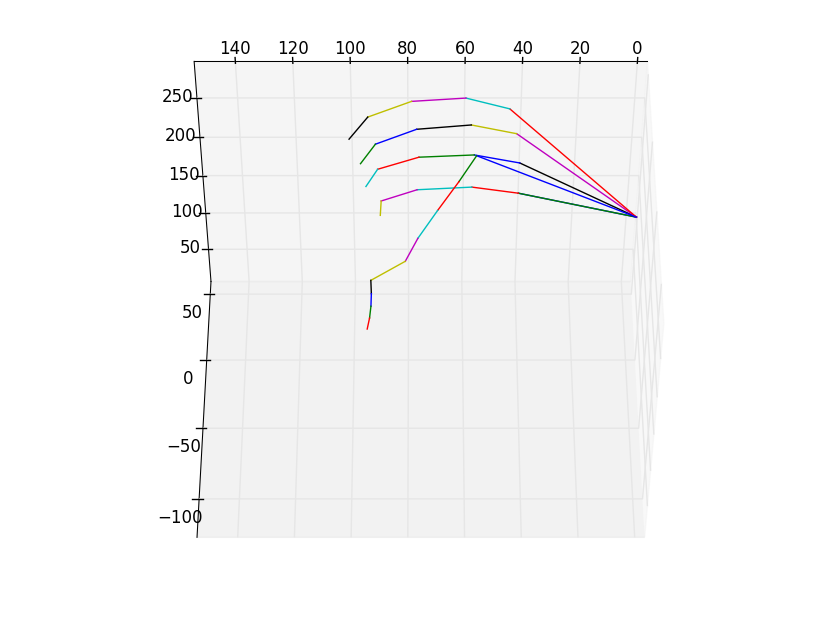

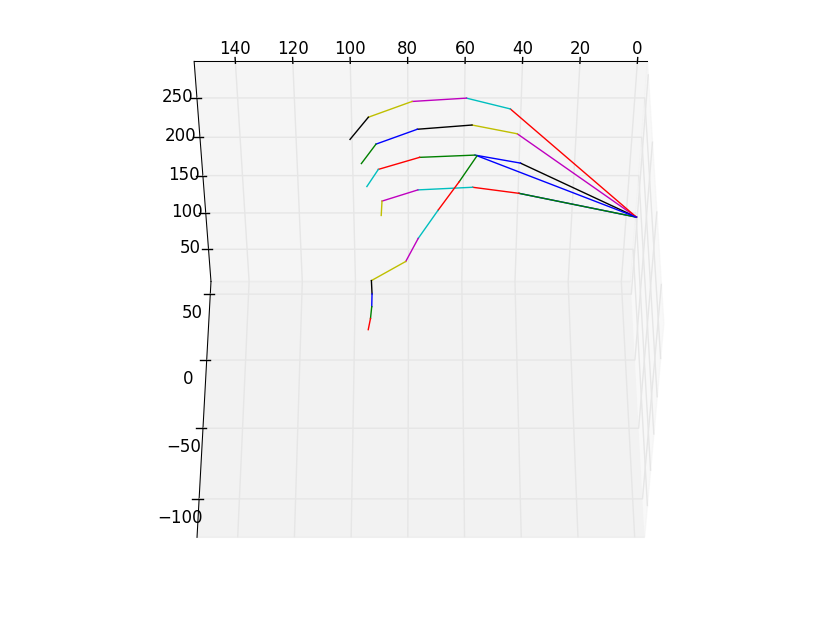

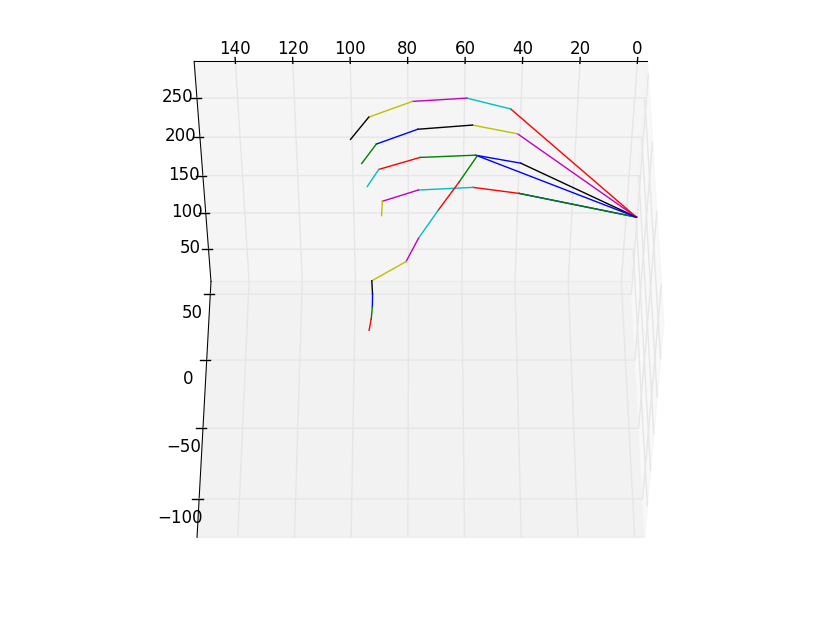

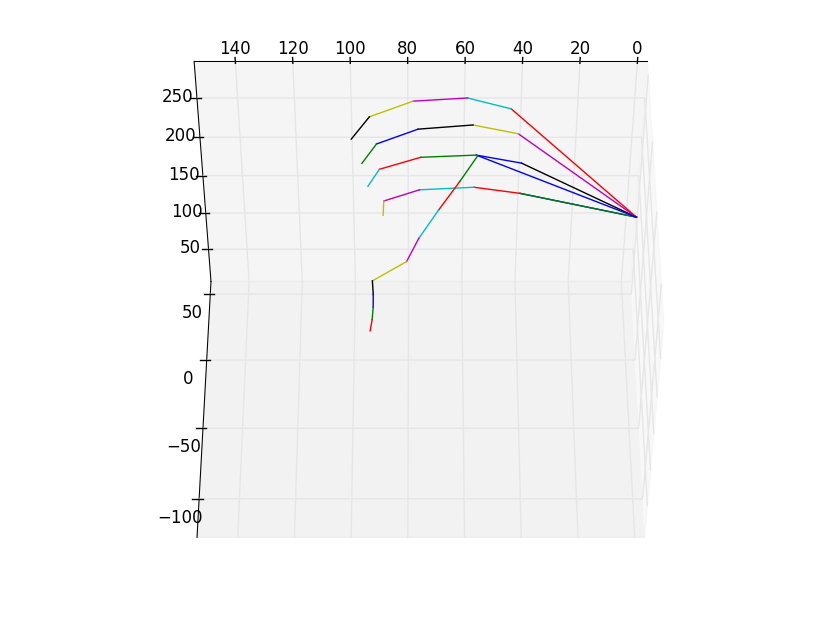

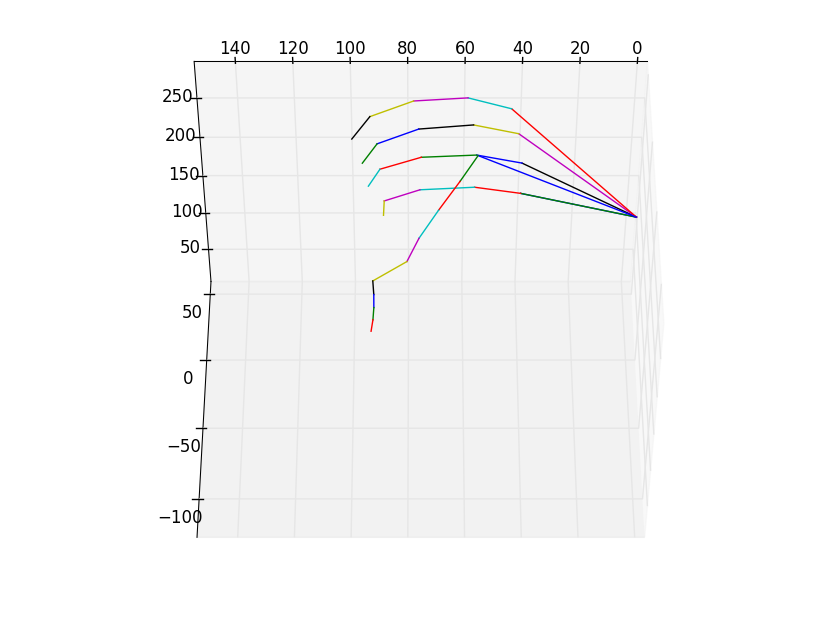

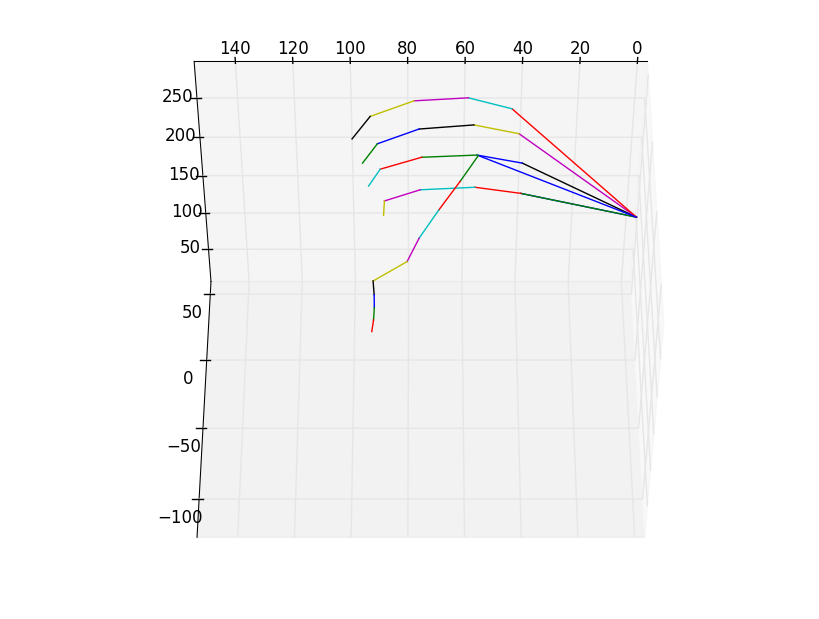

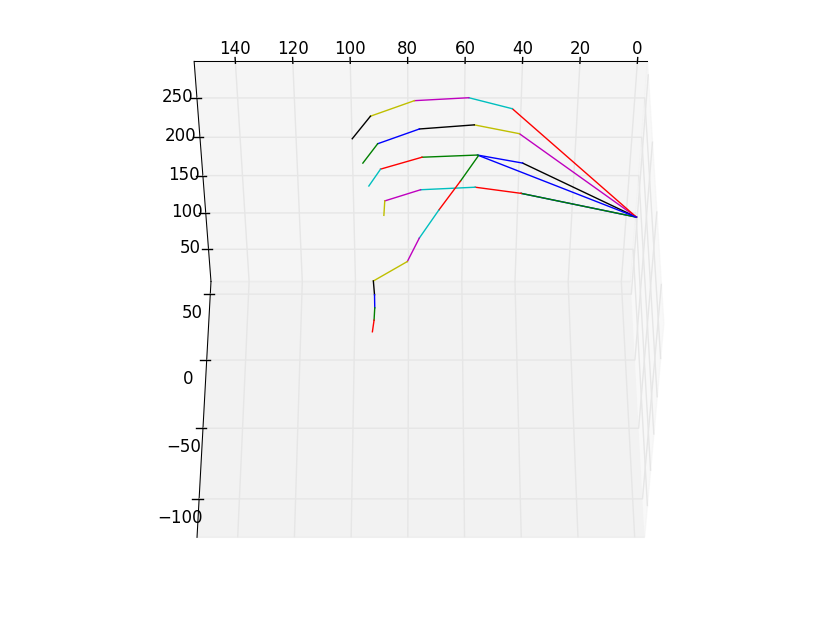

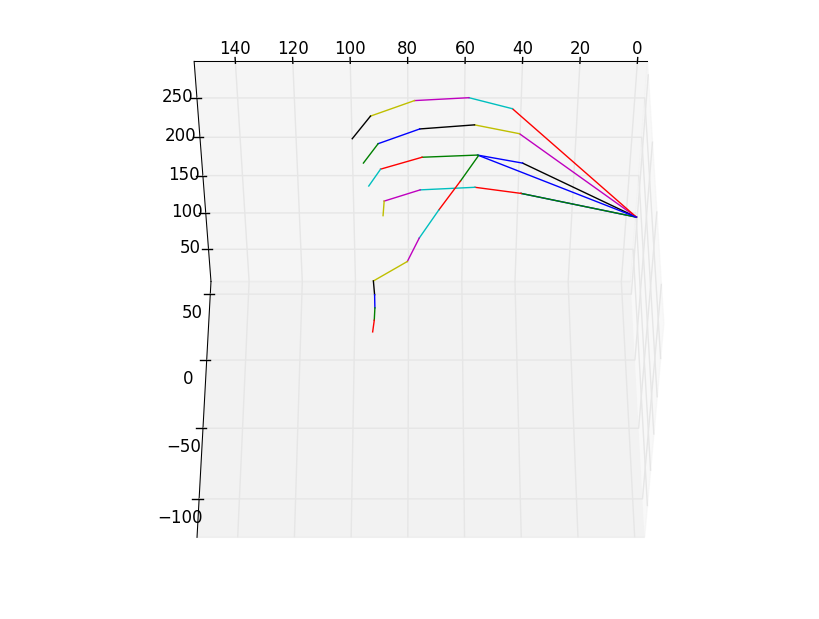

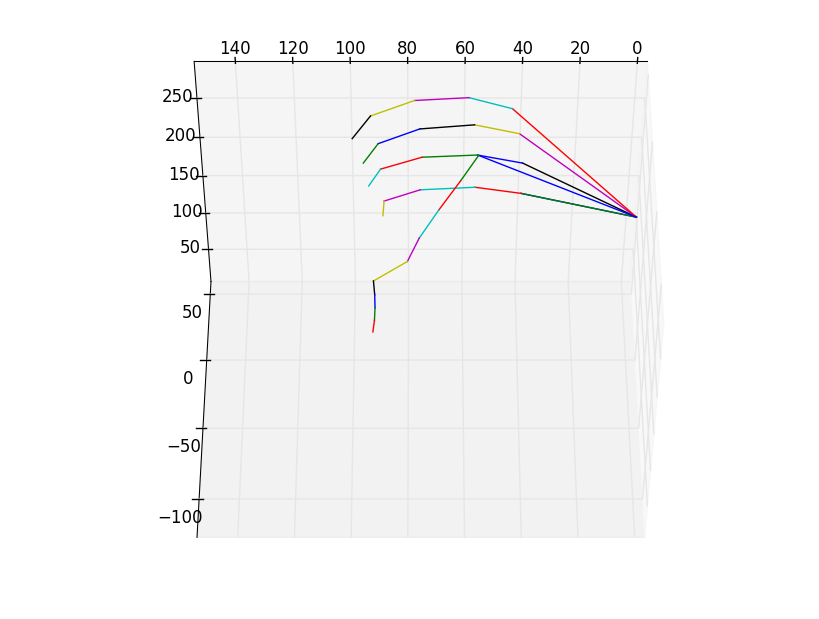

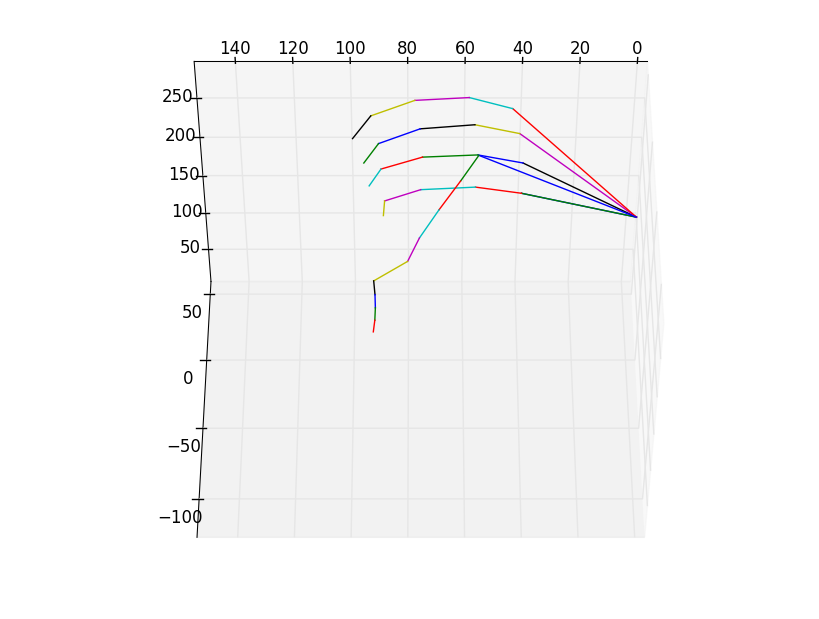

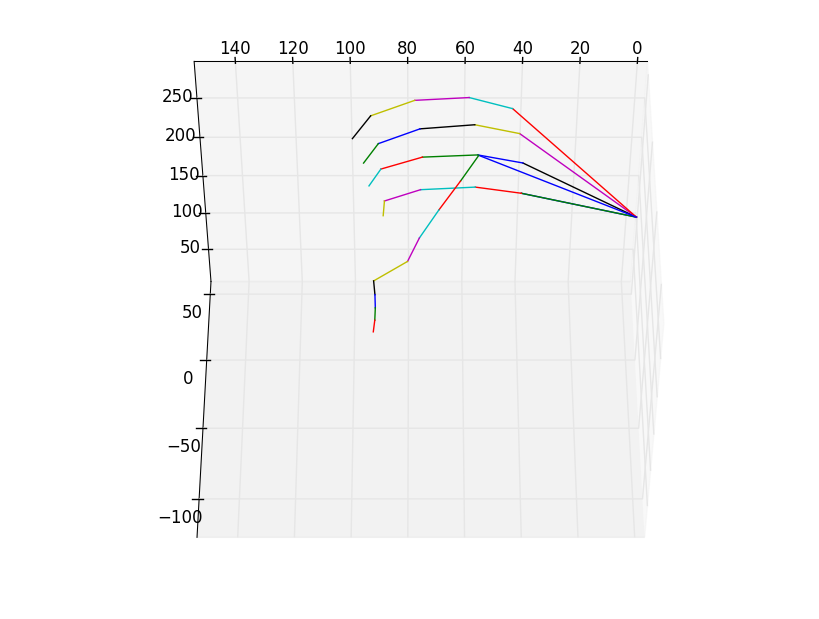

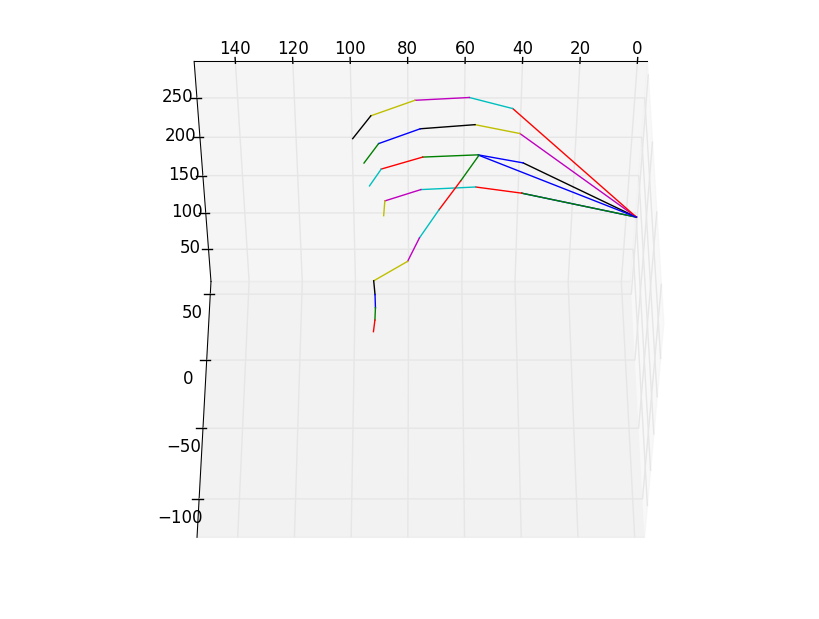

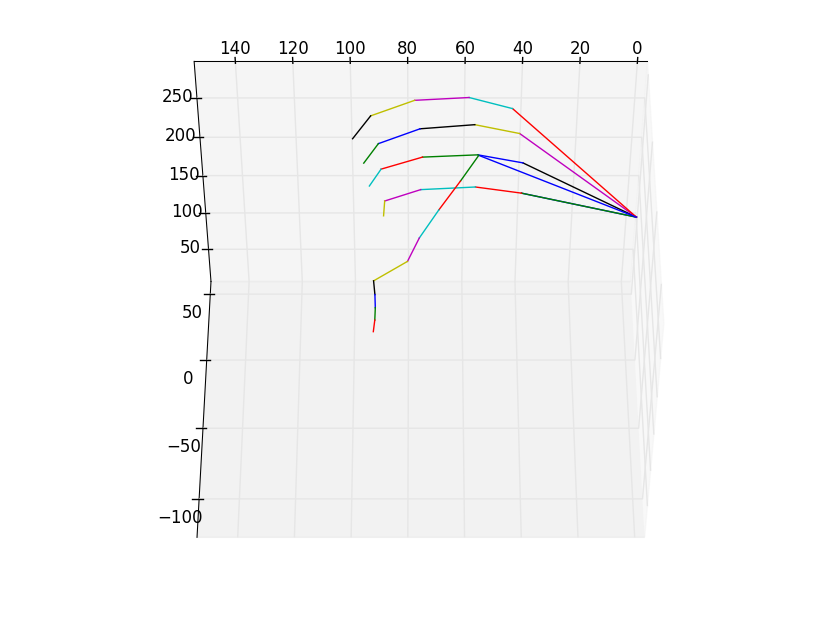

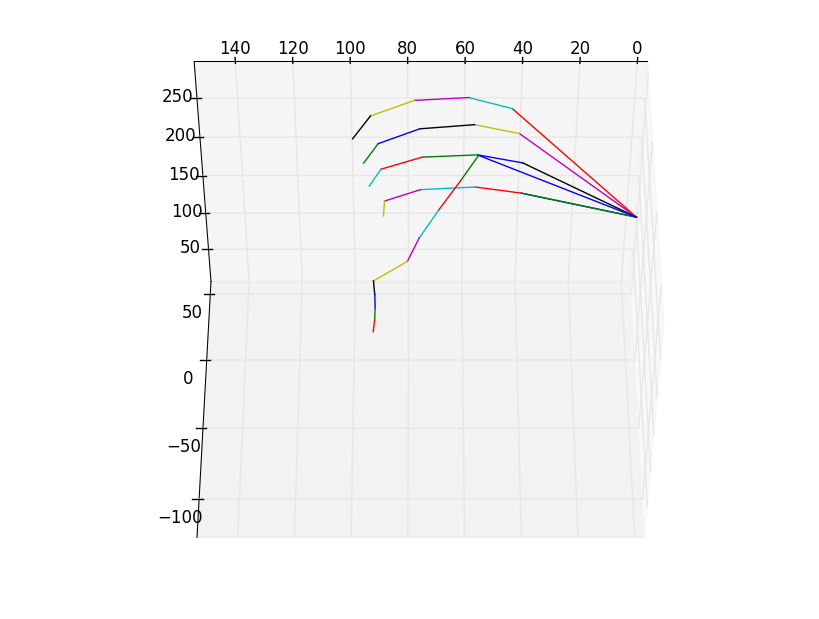

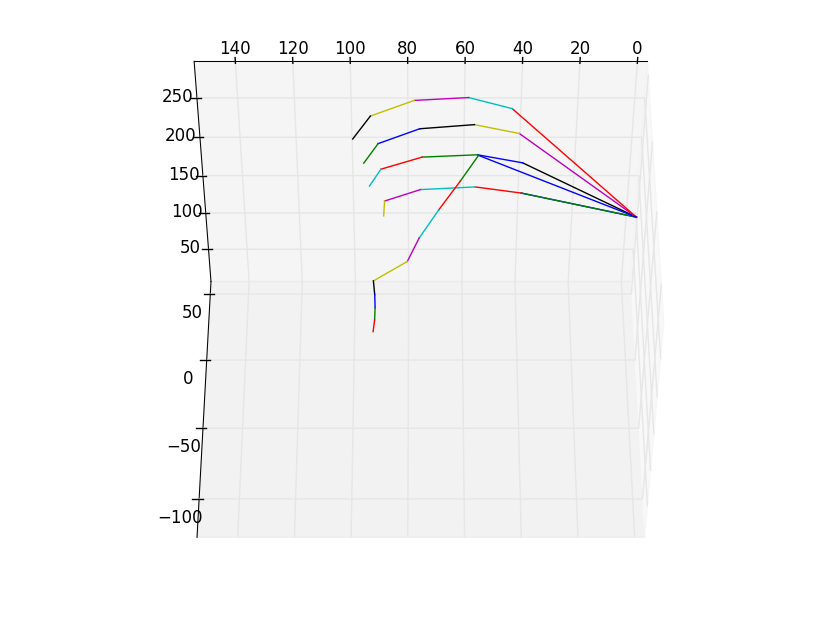

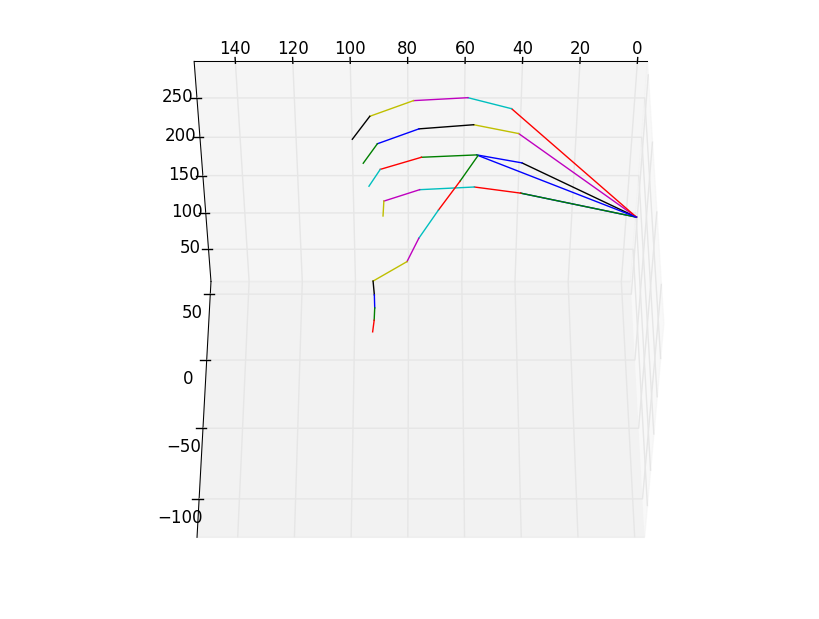

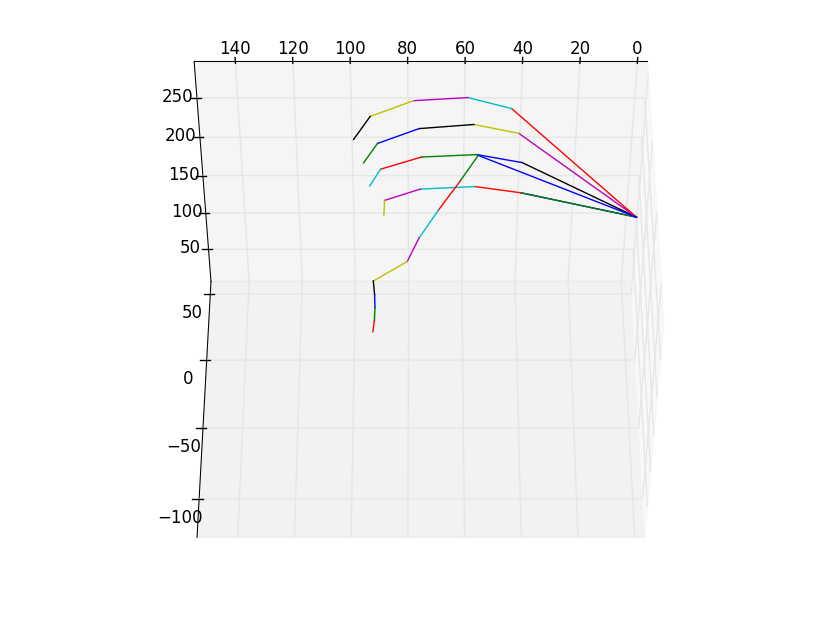

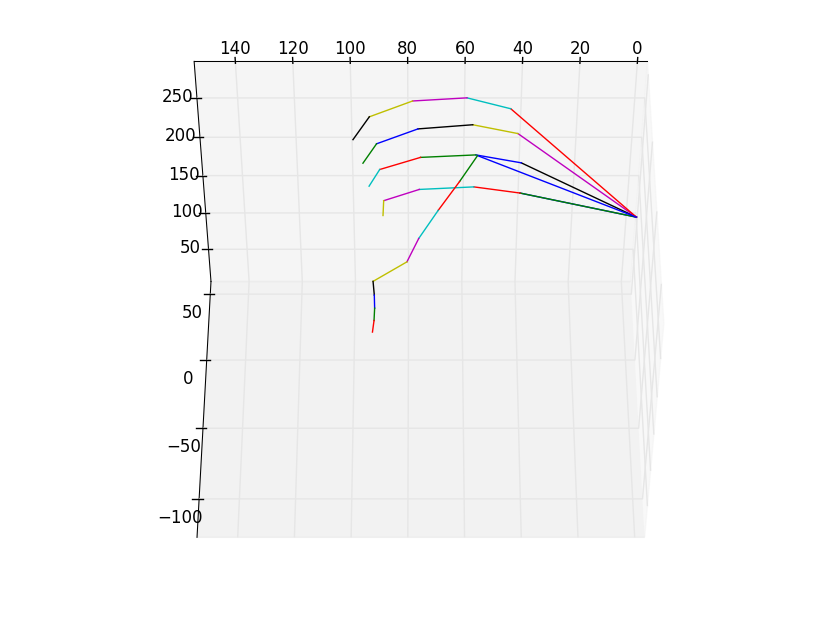

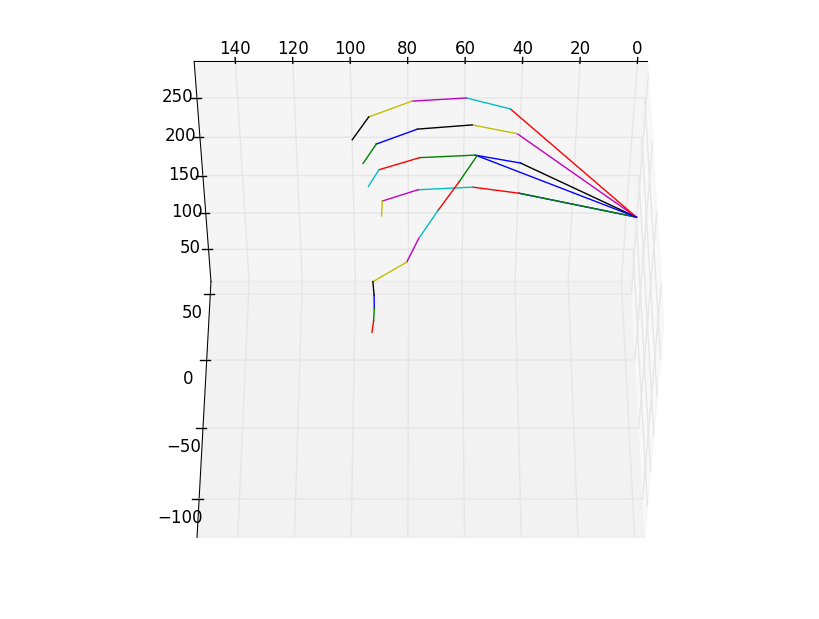

frame=  834 fps=440 q=-1.0 Lsize=     375kB time=00:00:27.70 bitrate= 110.8kbits/s dup=695 drop=0 speed=14.6x    
video:364kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.904091%
[libx264 @ 0x7fc3a9001800] frame I:4     Avg QP:15.00  size: 16192
[libx264 @ 0x7fc3a9001800] frame P:210   Avg QP:17.71  size:  1264
[libx264 @ 0x7fc3a9001800] frame B:620   Avg QP:13.97  size:    67
[libx264 @ 0x7fc3a9001800] consecutive B-frames:  0.8%  0.0%  0.4% 98.8%
[libx264 @ 0x7fc3a9001800] mb I  I16..4: 20.4% 57.8% 21.8%
[libx264 @ 0x7fc3a9001800] mb P  I16..4:  0.2%  0.1%  0.2%  P16..4:  2.3%  1.5%  1.1%  0.0%  0.0%    skip:94.5%
[libx264 @ 0x7fc3a9001800] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  2.4%  0.0%  0.0%  direct: 0.0%  skip:97.5%  L0:66.2% L1:33.4% BI: 0.4%
[libx264 @ 0x7fc3a9001800] 8x8 transform intra:50.2% inter:23.5%
[libx264 @ 0x7fc3a9001800] coded y,uvDC,uvAC intra: 18.3% 11.7% 10.1% inter: 0.3% 0.5% 0.4%
[libx264 @ 0x7fc3a9001800] i16 v,h,dc,p: 23% 

In [4]:
function create_video(hand,suffix,controller)
    data = get_xyz(hand,suffix,controller)

    xmin = minimum([minimum(data[:,i]) for i in collect(1:3:size(data)[2])])
    xmax = maximum([maximum(data[:,i]) for i in collect(1:3:size(data)[2])])

    ymin = minimum([minimum(data[:,i]) for i in collect(2:3:size(data)[2])])
    ymax = maximum([maximum(data[:,i]) for i in collect(2:3:size(data)[2])])

    zmin = minimum([minimum(data[:,i]) for i in collect(3:3:size(data)[2])])
    zmax = maximum([maximum(data[:,i]) for i in collect(3:3:size(data)[2])])

    for i in 1:size(data)[1]
        plotHand(data,i,xmin,xmax,ymin,ymax,zmin,zmax)
    end
    
    name = shortname(hand,suffix,controller)
    name = replace(name,"/","_")

    run(`ffmpeg -y -framerate 5 -i /tmp/plot_%d.png -c:v libx264 -r 30 -pix_fmt yuv420p /Users/zahedi/Desktop/$name.mp4`)

    for i in 1:size(data)[1]
        rm("/tmp/plot_$i.png")
    end
end

function create_video_rotated(hand,suffix,controller, e, a)
    data = get_xyz(hand,suffix,controller)

    xmin = minimum([minimum(data[:,i]) for i in collect(1:3:size(data)[2])])
    xmax = maximum([maximum(data[:,i]) for i in collect(1:3:size(data)[2])])

    ymin = minimum([minimum(data[:,i]) for i in collect(2:3:size(data)[2])])
    ymax = maximum([maximum(data[:,i]) for i in collect(2:3:size(data)[2])])

    zmin = minimum([minimum(data[:,i]) for i in collect(3:3:size(data)[2])])
    zmax = maximum([maximum(data[:,i]) for i in collect(3:3:size(data)[2])])

    for i in 1:size(data)[1]
        plotHandRotated(data,i,xmin,xmax,ymin,ymax,zmin,zmax, e, a)
    end
    
    name = shortname(hand,suffix,controller)
    name = replace(name,"/","_")

    run(`ffmpeg -y -framerate 5 -i /tmp/plot_%d.png -c:v libx264 -r 30 -pix_fmt yuv420p /Users/zahedi/Desktop/$name.mp4`)

    for i in 1:size(data)[1]
        rm("/tmp/plot_$i.png")
    end
end

create_video_rotated(2,"",0,-40, 90)

# 1. Analyse Control Data

## Reading all control data

In [5]:
rbohand2_controller_0_control_states = readtable("$(name(2,"",0))/raw/control.states.csv")
rbohand2_prescriptive_controller_0_control_states = readtable("$(name(2,"-prescriptive",0))/raw/control.states.csv")
rbohand3_controller_0_control_states = readtable("$(name(3,"",0))/raw/control.states.csv")
rbohand3_prescriptive_controller_0_control_states = readtable("$(name(3,"-prescriptive",0))/raw/control.states.csv")

rbohand2_controller_1_control_states = readtable("$(name(2,"",1))/raw/control.states.csv")
rbohand2_prescriptive_controller_1_control_states = readtable("$(name(2,"-prescriptive",1))/raw/control.states.csv")
rbohand3_controller_1_control_states = readtable("$(name(3,"",1))/raw/control.states.csv")
rbohand3_prescriptive_controller_1_control_states = readtable("$(name(3,"-prescriptive",1))/raw/control.states.csv")

rbohand2_controller_2_control_states = readtable("$(name(2,"",2))/raw/control.states.csv")
rbohand2_prescriptive_controller_2_control_states = readtable("$(name(2,"-prescriptive",2))/raw/control.states.csv")
rbohand3_controller_2_control_states = readtable("$(name(3,"",2))/raw/control.states.csv")
rbohand3_prescriptive_controller_2_control_states = readtable("$(name(3,"-prescriptive",2))/raw/control.states.csv")

140×14 DataFrames.DataFrame
│ Row │ time │ wrist_x │ wrist_y │ wrist_z │ wrist_rx    │ wrist_ry    │
├─────┼──────┼─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ 1   │ 0.01 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 2   │ 0.06 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 3   │ 0.11 │ 0.0     │ 197.5   │ 0.0     │ -0.00323524 │ 0.000425927 │
│ 4   │ 0.16 │ 0.0     │ 185.0   │ 0.0     │ -0.0194114  │ 0.00255556  │
│ 5   │ 0.2  │ 0.0     │ 175.0   │ 0.0     │ -0.0323524  │ 0.00425927  │
│ 6   │ 0.25 │ 0.0     │ 162.5   │ 0.0     │ -0.0485286  │ 0.00638891  │
│ 7   │ 0.3  │ 0.0     │ 150.0   │ 0.0     │ -0.0647048  │ 0.00851854  │
│ 8   │ 0.35 │ 0.0     │ 137.5   │ 0.0     │ -0.080881   │ 0.0106482   │
│ 9   │ 0.4  │ 0.0     │ 125.0   │ 0.0     │ -0.0970571  │ 0.0127778   │
│ 10  │ 0.45 │ 0.0     │ 112.5   │ 0.0     │ -0.113233   │ 0.0149075   │
│ 11  │ 0.5  │ 0.0     │ 100.0   │ 0.0     │ -0.12941    │ 0.0170371   │
⋮
│ 129 │ 6.41 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 130 │ 6.46 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 131 │ 6.51 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 132 │ 6.56 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 133 │ 6.61 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 134 │ 6.66 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 135 │ 6.71 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 136 │ 6.76 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 137 │ 6.81 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 138 │ 6.86 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 139 │ 6.91 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │
│ 140 │ 6.96 │ 0.0     │ 200.0   │ 0.0     │ 0.0         │ 0.0         │

│ Row │ wrist_rz    │ wrist_rw │ pressure_0 │ pressure_1 │ pressure_2 │
├─────┼─────────────┼──────────┼────────────┼────────────┼────────────┤
│ 1   │ 0.0         │ 1.0      │ 0.0        │ 0.0        │ 0.0        │
│ 2   │ 0.0         │ 1.0      │ 0.0        │ 0.0        │ 0.0        │
│ 3   │ -0.00323524 │ 0.999574 │ 250.0      │ 250.0      │ 250.0      │
│ 4   │ -0.0194114  │ 0.997444 │ 1500.0     │ 1500.0     │ 1500.0     │
│ 5   │ -0.0323524  │ 0.995741 │ 2500.0     │ 2500.0     │ 2500.0     │
│ 6   │ -0.0485286  │ 0.993611 │ 3750.0     │ 3750.0     │ 3750.0     │
│ 7   │ -0.0647048  │ 0.991481 │ 5000.0     │ 5000.0     │ 5000.0     │
│ 8   │ -0.080881   │ 0.989352 │ 6250.0     │ 6250.0     │ 6250.0     │
│ 9   │ -0.0970571  │ 0.987222 │ 7500.0     │ 7500.0     │ 7500.0     │
│ 10  │ -0.113233   │ 0.985093 │ 8750.0     │ 8750.0     │ 8750.0     │
│ 11  │ -0.12941    │ 0.982963 │ 10000.0    │ 10000.0    │ 10000.0    │
⋮
│ 129 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 130 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 131 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 132 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 133 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 134 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 135 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 136 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 137 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 138 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 139 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │
│ 140 │ 0.707107    │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │

│ Row │ pressure_3 │ pressure_4 │ pressure_5 │
├─────┼────────────┼────────────┼────────────┤
│ 1   │ 0.0        │ 0.0        │ 500.0      │
│ 2   │ 0.0        │ 0.0        │ 3000.0     │
│ 3   │ 250.0      │ 0.0        │ 5000.0     │
│ 4   │ 1500.0     │ 0.0        │ 5000.0     │
│ 5   │ 2500.0     │ 0.0        │ 5000.0     │
│ 6   │ 3750

In [6]:
names1  = []
names2  = []
columns = []
l2      = []

for controller in [0,1,2]
    for hand1 in [2,3]
        for hand2 in [2,3]
            for column in [:wrist_x, :wrist_y, :wrist_z, :wrist_rx, :wrist_ry, :wrist_rz, :wrist_rw, :pressure_0, :pressure_1, :pressure_2, :pressure_3, :pressure_4, :pressure_5]
                name1 = name(hand1, "", controller)
                name2 = name(hand2, "-prescriptive", controller)
                if name1 != name2
                    a = readtable("$(name(hand1,"",controller))/raw/control.states.csv")
                    b = readtable("$(name(hand2,"-prescriptive",controller))/raw/control.states.csv")
                    append!(names1,  [shortname(hand1, "", controller)])
                    append!(names2,  [shortname(hand2, "-prescriptive", controller)])
                    append!(columns, [column])
                    append!(l2,[check_differences(a,b,column)])
                end
            end
        end
    end
end

for controller1 in [0,1,2]
    for controller2 in [0,1,2]
        for hand in [2,3]
            for column in [:wrist_x, :wrist_y, :wrist_z, :wrist_rx, :wrist_ry, :wrist_rz, :wrist_rw, :pressure_0, :pressure_1, :pressure_2, :pressure_3, :pressure_4, :pressure_5]
                name1 = name(hand, "", controller1)
                name2 = name(hand, "", controller2)
                if name1 != name2
                    a = readtable("$(name(hand,"",controller1))/raw/control.states.csv")
                    b = readtable("$(name(hand,"",controller2))/raw/control.states.csv")
                    append!(names1,  [shortname(hand, "", controller1)])
                    append!(names2,  [shortname(hand, "", controller2)])
                    append!(columns, [column])
                    append!(l2,[check_differences(a,b,column)])
                end
            end
        end
    end
end

differences_table = DataFrame()
differences_table[:First]  = names1
differences_table[:Second] = names2
differences_table[:Column] = columns
differences_table[:L2Norm] = l2
writetable("/Users/zahedi/Desktop/comparison.csv", differences_table)
differences_table

312×4 DataFrames.DataFrame
│ Row │ First                                                     │
├─────┼───────────────────────────────────────────────────────────┤
│ 1   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 2   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 3   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 4   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 5   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 6   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 7   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 8   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 9   │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 10  │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 11  │ "rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
⋮
│ 301 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 302 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 303 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 304 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 305 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 306 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 307 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 308 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 309 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 310 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 311 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │
│ 312 │ "rbohand3/hand0_0-controller2-objectcylinder_0.0_0.0_0.0" │

│ Row │ Second                                                                 │
├─────┼────────────────────────────────────────────────────────────────────────┤
│ 1   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 2   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 3   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 4   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 5   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 6   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 7   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 8   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 9   │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 10  │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
│ 11  │ "rbohand2-prescriptive/hand0_0-controller0-objectcylinder_0.0_0.0_0.0" │
⋮
│ 301 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 302 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 303 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 304 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 305 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 306 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 307 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 308 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 309 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 310 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 311 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │
│ 312 │ "rbohand3/hand0_0-controller1-objectcylinder_0.0_0.0_0.0"              │

│ Row │ Column     │ L2Norm   │
├─────┼────────────┼──────────┤
│ 1   │ wrist_x    │ 0.0      │
│ 2   │ wrist_y    │ 0.0      │
│ 3   │ wrist_z    │ 0.0      │
│ 4   │ wrist_rx   │ 0.0      │
│ 5   │ wrist_ry   │ 0.0      │
│ 6   │ wrist_rz  

# 2. Analyse Behaviour Data

In [7]:
rbohand2_prescriptive_controller_0_control_states = readtable("$(name(2,"-prescriptive",0))/raw/control.states.csv")

140×14 DataFrames.DataFrame
│ Row │ time │ wrist_x │ wrist_y │ wrist_z │ wrist_rx │ wrist_ry │ wrist_rz    │
├─────┼──────┼─────────┼─────────┼─────────┼──────────┼──────────┼─────────────┤
│ 1   │ 0.01 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.0         │
│ 2   │ 0.06 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.0         │
│ 3   │ 0.11 │ 0.0     │ 197.5   │ 0.0     │ 0.0      │ 0.0      │ -0.00326315 │
│ 4   │ 0.16 │ 0.0     │ 185.0   │ 0.0     │ 0.0      │ 0.0      │ -0.0195789  │
│ 5   │ 0.2  │ 0.0     │ 175.0   │ 0.0     │ 0.0      │ 0.0      │ -0.0326315  │
│ 6   │ 0.25 │ 0.0     │ 162.5   │ 0.0     │ 0.0      │ 0.0      │ -0.0489473  │
│ 7   │ 0.3  │ 0.0     │ 150.0   │ 0.0     │ 0.0      │ 0.0      │ -0.0652631  │
│ 8   │ 0.35 │ 0.0     │ 137.5   │ 0.0     │ 0.0      │ 0.0      │ -0.0815789  │
│ 9   │ 0.4  │ 0.0     │ 125.0   │ 0.0     │ 0.0      │ 0.0      │ -0.0978946  │
│ 10  │ 0.45 │ 0.0     │ 112.5   │ 0.0     │ 0.0      │ 0.0      │ -0.11421    │
│ 11  │ 0.5  │ 0.0     │ 100.0   │ 0.0     │ 0.0      │ 0.0      │ -0.130526   │
⋮
│ 129 │ 6.41 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 130 │ 6.46 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 131 │ 6.51 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 132 │ 6.56 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 133 │ 6.61 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 134 │ 6.66 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 135 │ 6.71 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 136 │ 6.76 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 137 │ 6.81 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 138 │ 6.86 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 139 │ 6.91 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │
│ 140 │ 6.96 │ 0.0     │ 200.0   │ 0.0     │ 0.0      │ 0.0      │ 0.707107    │

│ Row │ wrist_rw │ pressure_0 │ pressure_1 │ pressure_2 │ pressure_3 │
├─────┼──────────┼────────────┼────────────┼────────────┼────────────┤
│ 1   │ 1.0      │ 0.0        │ 0.0        │ 0.0        │ 0.0        │
│ 2   │ 1.0      │ 0.0        │ 0.0        │ 0.0        │ 0.0        │
│ 3   │ 0.999786 │ 250.0      │ 250.0      │ 250.0      │ 250.0      │
│ 4   │ 0.998717 │ 1500.0     │ 1500.0     │ 1500.0     │ 1500.0     │
│ 5   │ 0.997861 │ 2500.0     │ 2500.0     │ 2500.0     │ 2500.0     │
│ 6   │ 0.996792 │ 3750.0     │ 3750.0     │ 3750.0     │ 3750.0     │
│ 7   │ 0.995722 │ 5000.0     │ 5000.0     │ 5000.0     │ 5000.0     │
│ 8   │ 0.994653 │ 6250.0     │ 6250.0     │ 6250.0     │ 6250.0     │
│ 9   │ 0.993584 │ 7500.0     │ 7500.0     │ 7500.0     │ 7500.0     │
│ 10  │ 0.992514 │ 8750.0     │ 8750.0     │ 8750.0     │ 8750.0     │
│ 11  │ 0.991445 │ 10000.0    │ 10000.0    │ 10000.0    │ 10000.0    │
⋮
│ 129 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 130 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 131 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 132 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 133 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 134 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 135 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 136 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 137 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 138 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 139 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │
│ 140 │ 0.707107 │ 70000.0    │ 70000.0    │ 70000.0    │ 70000.0    │

│ Row │ pressure_4 │ pressure_5 │
├─────┼────────────┼────────────┤
│ 1   │ 0.0        │ 500.0      │
│ 2   │ 0.0        │ 3000.0     │
│ 3   │ 0.0        │ 5000.0   

In [ ]:
for hand in [2,3]
    for suffix in ["", "-prescriptive"]
        for controller in [0,1,2]
            println("working on $(shortname(hand, suffix, controller))")
            create_video_rotated(hand, suffix, controller,-40,90)
        end
    end
end

working on rbohand2/hand0_0-controller0-objectcylinder_0.0_0.0_0.0


ffmpeg version 3.1.4 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 8.0.0 (clang-800.0.38)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.1.4 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libxvid --disable-lzma --enable-vda
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.101 / 57.  0.101
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /  2.  1.100
  libpostproc    54.  0.100 / 54.  0.100
Input #0, image2, from '/tmp/plot_%d.png':
  Duration: 00:00:27.80, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 800x600 [SAR 3937:3937 DAR 4:3], 5 fps, 5 tbr, 5 tbn, 5 tbc
[lib

working on rbohand2/hand0_0-controller1-objectcylinder_0.0_0.0_0.0


[libx264 @ 0x7f85c3000c00] frame I:4     Avg QP:15.00  size: 16192
[libx264 @ 0x7f85c3000c00] frame P:210   Avg QP:17.71  size:  1264
[libx264 @ 0x7f85c3000c00] frame B:620   Avg QP:13.97  size:    67
[libx264 @ 0x7f85c3000c00] consecutive B-frames:  0.8%  0.0%  0.4% 98.8%
[libx264 @ 0x7f85c3000c00] mb I  I16..4: 20.4% 57.8% 21.8%
[libx264 @ 0x7f85c3000c00] mb P  I16..4:  0.2%  0.1%  0.2%  P16..4:  2.3%  1.5%  1.1%  0.0%  0.0%    skip:94.5%
[libx264 @ 0x7f85c3000c00] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  2.4%  0.0%  0.0%  direct: 0.0%  skip:97.5%  L0:66.2% L1:33.4% BI: 0.4%
[libx264 @ 0x7f85c3000c00] 8x8 transform intra:50.2% inter:23.5%
[libx264 @ 0x7f85c3000c00] coded y,uvDC,uvAC intra: 18.3% 11.7% 10.1% inter: 0.3% 0.5% 0.4%
[libx264 @ 0x7f85c3000c00] i16 v,h,dc,p: 23% 66% 10%  0%
[libx264 @ 0x7f85c3000c00] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 44% 14% 41%  0%  0%  0%  0%  0%  0%
[libx264 @ 0x7f85c3000c00] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 44% 34% 13%  1%  1%  1%  2%  1%  2%
[libx264 @ 0x

# 3. Preprocess control and behaviour data

In [ ]:
parent = "/Users/zahedi/projects/TU.Berlin/experiments/poster";
subdir = readdir(parent)
subdir = filter(c->contains(c,"rbohand"),subdir)

dirs = []

for dir in subdir
    d = readdir("$parent/$dir")
    d = filter(c->contains(c,"hand"), d)
    d = ["$parent/$dir/$v" for v in d]
    append!(dirs, d)
end

dirs[1:10]

### 1) Preprocessing the files

In [ ]:
function copy_and_convert_hand(dirs)
    in_dirs  = map(x->"$x/raw", dirs)
    out_dirs = map(x->"$x/analysis", dirs)
    
    p = Progress(length(in_dirs)*1, 1, "hand.sofastates.csv ...")

    for index in 1:length(in_dirs)
        if isfile("$(in_dirs[index])/hand.sofastates.txt")
            m = get_xyz("$(in_dirs[index])/hand.sofastates.txt")
            for i = 5:3:size(m)[2]
                m[:,i] = m[:,i] - m[:,2]
            end
            m = m[:,4:end]
            if isdir(out_dirs[index]) == false
                mkdir(out_dirs[index])
            end
            writecsv("$(out_dirs[index])/hand.sofastates.csv",m)
        end
        next!(p)
    end
end

In [ ]:
function copy_and_convert_control(dirs)
    
    in_dirs  = map(x->"$x/raw", dirs)
    out_dirs = map(x->"$x/analysis", dirs)
    
    p = Progress(length(in_dirs), 1, "control.states.csv ...")

    for i in 1:length(in_dirs)
        if isfile("$(in_dirs[i])/control.states.csv")
            a = readcsv("$(in_dirs[i])/control.states.csv")[2:end-1,:]
            a = map(x->Float64(x),a)
            writecsv("$(out_dirs[i])/control.states.csv",a)
        end
        next!(p)
    end
end

function copy_and_convert_files(path)
    copy_and_convert_hand(path)
    copy_and_convert_control(path)
end

In [ ]:
copy_and_convert_files(dirs)

### 2)  Get Min/Max Values

In [ ]:
function write_domains(dirs)    
    in_dirs      = map(x->"$x/analysis", dirs)
    controlfiles = map(x->"$x/control.states.csv",in_dirs)
    a_domains    = map(x->"$x/A.domains.csv",in_dirs)
    handfiles    = map(x->"$x/hand.sofastates.csv",in_dirs)
    w_domains    = map(x->"$x/W.domains.csv",in_dirs)

    function minmax(in_,out_)
        a = readcsv(in_)
        b = minimum(a,1)
        c = maximum(a,1)
        d = vcat(b,c)
        writecsv(out_, d)
    end

    p = Progress(length(in_dirs), 1, "domain files ...")

    for i = 1:length(in_dirs)
        if isfile(controlfiles[i])
            minmax(controlfiles[i], a_domains[i])
        end
        if isfile(handfiles[i])
            minmax(handfiles[i],w_domains[i])
        end
        next!(p)
    end
end

write_domains(dirs)

In [ ]:
w_indices = join(["$(i*3+1),$(i*3+2),$(i*3+3)" for i in [5,10,15,20]],",")

### 3)  Hand, Controller, Objects, Positions

In [ ]:
wbins     = 100
abins     = 30

# index 1 was removed when copying (wrist position)
# -> 5 is fingertip 1
# -> 10 is fingertip 2
# -> 15 is fingertip 3
# -> 20 is fingertip 4

w_indices = join(["$(i*3+1),$(i*3+2),$(i*3+3)" for i in [5,10,15,20]],",")
a_indices = "8,9,10,11"

in_dirs = map(x->"$x/analysis", dirs)

fd = open("Makefile.1","w")
write(fd,"all:\n")
for d in in_dirs
    command = "/Users/zahedi/projects/builds/entropy-ninja/bin/rbo_mc -wi $(w_indices) -ai $(a_indices) -wbins $wbins -abins $abins -d \"$d\""   
    write(fd,"\t$command\n")
end
close(fd)
run(`make -j 4 -f Makefile.1`)

### Auswertung

In [ ]:
mc_files = map(x->"$x/analysis/mc_w-averaged_$(wbins)_$(abins).txt", dirs)
values   = map(x->readcsv(x)[1],mc_files)
names    = []
fd = open("$parent/results_mc_w-averaged_$(wbins)_$(abins).txt","w")
for i = 1:length(in_dirs)
    v = split(in_dirs[i],"/")
    n = "$(v[8])/$(v[9])"
    append!(names,[n])
    write(fd, "$n,$(values[i])\n")
end
close(fd)

results = DataFrame()
results[:Name] = names
results[:Values] = values
sort!(results, cols=[:Values])
writetable("$parent/results_mc_w-averaged_$(wbins)_$(abins).csv",results)
results

In [ ]:
maximum(values)

In [ ]:
minimum(values)

In [ ]:
mean(values)